### The first analysis we are to carry out is the Chicago Crimes 2001 to 2004

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
import pandas as pd

# List of your CSV files
csv_files = ['Chicago_Crimes_2001_to_2004.csv', 'Chicago_Crimes_2005_to_2007.csv', 'Chicago_Crimes_2008_to_2011.csv', 'Chicago_Crimes_2012_to_2017.csv']

# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Define the chunk size (number of rows to read at a time)
chunk_size = 100000  # You can adjust this based on your memory constraints

# Process each file in chunks
for file in csv_files:
    try:
        for chunk in pd.read_csv(file, chunksize=chunk_size, on_bad_lines='skip'):
            combined_df = pd.concat([combined_df, chunk], ignore_index=True)
    except pd.errors.ParserError as e:
        print(f"Error while processing {file}: {e}")

# Now combined_df contains all rows from the large CSV files
print(combined_df.head())  # Example: print the first few rows

C:\Users\User\AppData\Local\Temp\ipykernel_6096\2057042024.py:15: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunk_size, on_bad_lines='skip'):


   Unnamed: 0       ID Case Number                    Date  \
0         879  4786321    HM399414  01/01/2004 12:01:00 AM   
1        2544  4676906    HM278933  03/01/2003 12:00:00 AM   
2        2919  4789749    HM402220  06/20/2004 11:00:00 AM   
3        2927  4789765    HM402058  12/30/2004 08:00:00 PM   
4        3302  4677901    HM275615  05/01/2003 01:00:00 AM   

                 Block  IUCR                Primary Type  \
0    082XX S COLES AVE  0840                       THEFT   
1      004XX W 42ND PL  2825               OTHER OFFENSE   
2  025XX N KIMBALL AVE  1752  OFFENSE INVOLVING CHILDREN   
3   045XX W MONTANA ST  0840                       THEFT   
4   111XX S NORMAL AVE  0841                       THEFT   

                      Description Location Description  Arrest  ...  Ward  \
0   FINANCIAL ID THEFT: OVER $300            RESIDENCE   False  ...   7.0   
1         HARASSMENT BY TELEPHONE            RESIDENCE   False  ...  11.0   
2   AGG CRIM SEX ABUSE FAM MEMBER  

### Checking if some rows that have unique numbers are duplicated and removing them

In [3]:
df = combined_df

In [4]:
df = df.drop_duplicates(subset=['ID', 'Case Number'], keep="first")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6170812 entries, 0 to 7941281
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool(2), 

In [6]:
df.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1968
Arrest                       0
Domestic                     0
Beat                         0
District                    49
Ward                    614864
Community Area          616041
FBI Code                     0
X Coordinate             84223
Y Coordinate             84223
Year                         0
Updated On                   0
Latitude                 84223
Longitude                84223
Location                 84223
dtype: int64

In [7]:
df.Description.value_counts()

Description
SIMPLE                            732372
$500 AND UNDER                    496695
DOMESTIC BATTERY SIMPLE           466318
TO VEHICLE                        344205
TO PROPERTY                       325801
                                   ...  
DOMESTIC VIOLENCE                      1
KEEP PLACE OF JUV PROSTITUTION         1
SPORTS TAMPERING                       1
THEFT RETAIL                           1
VIOLATION OF SUMMARY CLOSURE           1
Name: count, Length: 376, dtype: int64

In [8]:
df.Beat.value_counts()

Beat
423     48447
421     47032
624     42602
1533    41831
823     41768
        ...  
1653     2054
1652      950
1655      741
430        19
310         5
Name: count, Length: 304, dtype: int64

Text(0.5, 0, 'Ward  %')

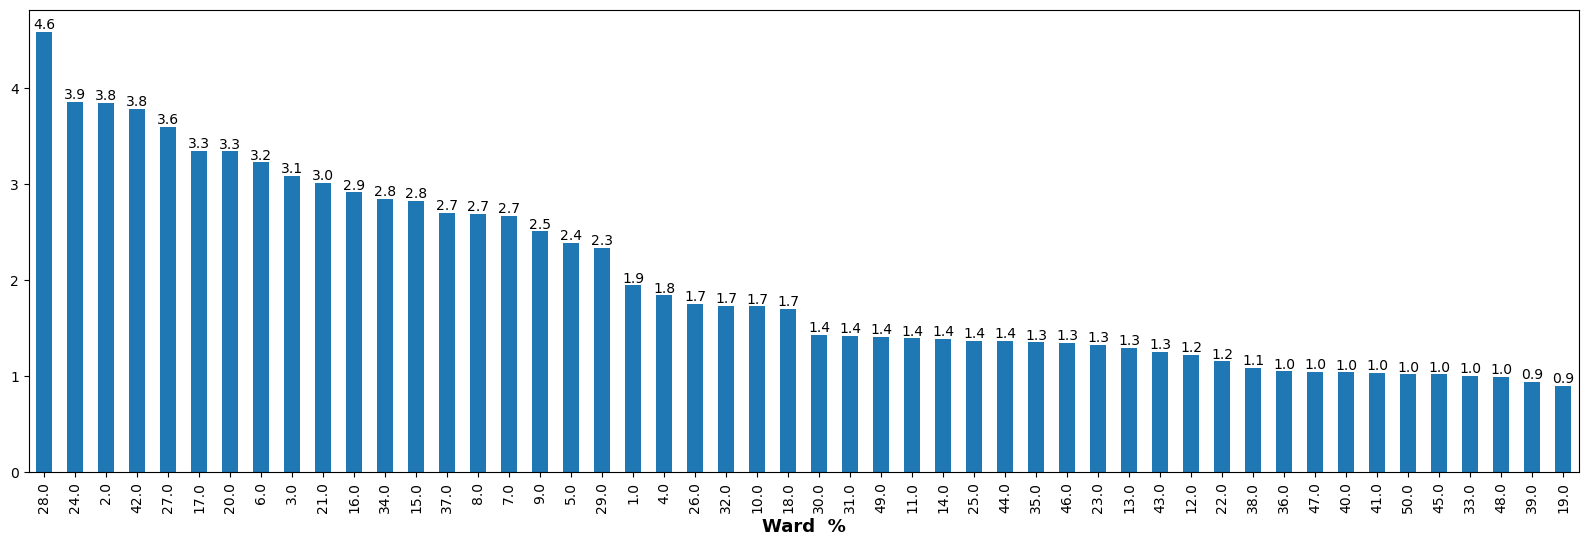

In [9]:
ward = df.Ward.value_counts(normalize = True)*100
bars = ward.plot(kind = "bar", figsize = (20, 6))
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f', label_type='edge')
plt.xlabel("Ward  %", fontsize = 13, fontweight = "bold")

### important notes for data cleaning 

1. remove the following columns [`longitude`, `latitude`, `location`, `x-cordinate`, `y-cordinate`, etc] because the ward shows the exact location of where they took place. the X and Y coordinate of a row can be converted to it relative longitude and latitude which in turn can changed to chicago ward location


In [10]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [11]:
print (df.Location[1]) 
print (df["X Coordinate"][1], df["Y Coordinate"][1])

(41.817229156, -87.637328162)
1173974.0 1876757.0


In [12]:
df.shape

(6170812, 23)

In [13]:
df.Ward.isnull().sum()

614864

In [14]:
df.Ward.head()

0     7.0
1    11.0
2    35.0
3    31.0
4    34.0
Name: Ward, dtype: float64

In [15]:
df.District.value_counts().sort_index()

District
1.0     227523
2.0     298800
3.0     315583
4.0     351146
5.0     273450
6.0     353664
7.0     367780
8.0     423374
9.0     309255
10.0    261669
11.0    392062
12.0    301905
13.0         1
14.0    245147
15.0    271869
16.0    204574
17.0    179194
18.0    264320
19.0    275014
20.0    107567
21.0         4
22.0    202976
23.0         1
24.0    184153
25.0    359612
31.0       120
Name: count, dtype: int64

In [16]:
df.Block.value_counts().sort_index()

Block
0000X  I94/EXIT 12         1
0000X E 100 PL            44
0000X E 100 ST            44
0000X E 100TH PL         468
0000X E 100TH ST         369
                        ... 
145XX S MINERVA            1
173XX  LORENZ              1
175XX S SANDALWOOD DR      1
175XX W WINSTON COURT      1
XX  UNKNOWN                2
Name: count, Length: 58776, dtype: int64

In [17]:
df_filtered = df[pd.isna(df['Ward'])]
df_filtered

Unnamed: 0        ID Case Number                    Date  \
1332         808956   1954658    HH143979  01/23/2002 05:30:00 PM   
1450         814436       636     G008548  01/04/2001 10:30:00 PM   
1457         814500       637     G005960  01/06/2001 10:35:00 AM   
1468         814582       638     G008793  01/05/2001 04:22:00 PM   
1507         815017       642     G013102  01/07/2001 12:48:00 AM   
...             ...       ...         ...                     ...   
7043608     2894025   9197341    HW333864  06/23/2013 08:15:00 PM   
7199570     3050270   9451711    HX105019  12/19/2013 01:35:00 PM   
7223777     3074531   9494842    HX149198  02/11/2014 10:30:00 PM   
7417972     3268787   9827727    HX464897  10/12/2014 02:30:00 PM   
7621606     3473478  10266945    HY454232  10/08/2015 10:00:00 AM   

                        Block  IUCR         Primary Type          Description  \
1332      071XX S EAST END AV  0281  CRIM SEXUAL ASSAULT       NON-AGGRAVATED   
1450            035XX W 12 PL  0110             HOMICIDE  FIRST DEGREE MURDER   
1457       014XX N HARDING ST  0110             HOMICIDE  FIRST DEGREE MURDER   
1468            016XX W 80 ST  0110             HOMICIDE  FIRST DEGREE MURDER   
1507            007XX E 79 ST  0110             HOMICIDE  FIRST DEGREE MURDER   
...                       ...   ...                  ...                  ...   
7043608      007XX W OHARE ST  0820                THEFT       $500 AND UNDER   
7199570   065XX N MANNHEIM RD  0910  MOTOR VEHICLE THEFT           AUTOMOBILE   
7223777  056XX N FAIRVIEW AVE  0810                THEFT            OVER $500   
7417972   065XX N MANNHEIM RD  1320      CRIMINAL DAMAGE           TO VEHICLE   
7621606  056XX N FAIRVIEW AVE  1305      CRIMINAL DAMAGE  CRIMINAL DEFACEMENT   

                   Location Description  Arrest  ...  Ward  Community Area  \
1332                          APARTMENT    True  ...   NaN             NaN   
1450                           BASEMENT    True  ...   NaN             NaN   
1457                             STREET    True  ...   NaN             NaN   
1468                             STREET   False  ...   NaN             NaN   
1507                             STREET   False  ...   NaN             NaN   
...                                 ...     ...  ...   ...             ...   
7043608  AIRPORT EXTERIOR - SECURE AREA   False  ...   NaN             0.0   
7199570                          STREET   False  ...   NaN             0.0   
7223777   RESIDENTIAL YARD (FRONT/BACK)   False  ...   NaN             0.0   
7417972                          STREET   False  ...   NaN             0.0   
7621606                RESIDENCE-GARAGE   False  ...   NaN             0.0   

         FBI Code  X Coordinate  Y Coordinate    Year              Updated On  \
1332           02     1188770.0     1857951.0  2002.0  08/06/2016 03:49:51 PM   
1450          01A     1153021.0     1894062.0  2001.0  08/17/2015 03:03:40 PM   
1457          01A     1149782.0     1909379.0  2001.0  08/17/2015 03:03:40 PM   
1468          01A     1166645.0     1851658.0  2001.0  08/17/2015 03:03:40 PM   
1507          01A     1182418.0     1852784.0  2001.0  08/17/2015 03:03:40 PM   
...           ...           ...           ...     ...                     ...   
7043608        06     1094587.0     1945065.0  2013.0  02/04/2016 06:33:39 AM   
7199570        07     1106264.0     1941887.0  2013.0  02/04/2016 06:33:39 AM   
7223777        06     1119952.0     1936788.0  2014.0  02/04/2016 06:33:39 AM   
7417972        14     1106263.0     1941939.0  2014.0  02/04/2016 06:33:39 AM   
7621606        14     1119961.0     1936801.0  2015.0  10/15/2015 03:57:16 PM   

          Latitude  Longitude                       Location  
1332     41.765282 -87.583655  (41.765282432, -87.583654702)  
1450     41.865156 -87.713732   (41.865156224, -87.71373199)  
1457     41.907251 -87.725224  (41.907251262, -87.725224066)  
1468     41.748514 -87.664929  (41.748514115,

In [18]:
wa = df.dropna(subset = ["Ward"])
wa.head()

Unnamed: 0       ID Case Number                    Date  \
0         879  4786321    HM399414  01/01/2004 12:01:00 AM   
1        2544  4676906    HM278933  03/01/2003 12:00:00 AM   
2        2919  4789749    HM402220  06/20/2004 11:00:00 AM   
3        2927  4789765    HM402058  12/30/2004 08:00:00 PM   
4        3302  4677901    HM275615  05/01/2003 01:00:00 AM   

                 Block  IUCR                Primary Type  \
0    082XX S COLES AVE  0840                       THEFT   
1      004XX W 42ND PL  2825               OTHER OFFENSE   
2  025XX N KIMBALL AVE  1752  OFFENSE INVOLVING CHILDREN   
3   045XX W MONTANA ST  0840                       THEFT   
4   111XX S NORMAL AVE  0841                       THEFT   

                      Description Location Description  Arrest  ...  Ward  \
0   FINANCIAL ID THEFT: OVER $300            RESIDENCE   False  ...   7.0   
1         HARASSMENT BY TELEPHONE            RESIDENCE   False  ...  11.0   
2   AGG CRIM SEX ABUSE FAM MEMBER            RESIDENCE   False  ...  35.0   
3   FINANCIAL ID THEFT: OVER $300                OTHER   False  ...  31.0   
4  FINANCIAL ID THEFT:$300 &UNDER            RESIDENCE   False  ...  34.0   

   Community Area  FBI Code  X Coordinate  Y Coordinate    Year  \
0            46.0        06           NaN           NaN  2004.0   
1            61.0        26     1173974.0     1876757.0  2003.0   
2            22.0        20           NaN           NaN  2004.0   
3            20.0        06           NaN           NaN  2004.0   
4            49.0        06     1174948.0     1831051.0  2003.0   

               Updated On   Latitude  Longitude                       Location  
0  08/17/2015 03:03:40 PM        NaN        NaN                            NaN  
1  04/15/2016 08:55:02 AM  41.817229 -87.637328  (41.817229156, -87.637328162)  
2  08/17/2015 03:03:40 PM        NaN        NaN                            NaN  
3  08/17/2015 03:03:40 PM        NaN        NaN                            NaN  
4  04/15/2016 08:55:02 AM  41.691785 -87.635116  (41.691784636, -87.635115968)  

[5 rows x 23 columns]

#### 1. We have over 1 million rows in the data set. and from random sampling, we can use a certain percentage of the total number of row
#### 2. there are columns that the ward number is missing and ward is one of the key column in the dataset.

### So the fist set of analysis, we will remove the rows that the wards are `nan`

In [19]:
# getting a copy of the dataset
df1 = df
df1.head()

Unnamed: 0       ID Case Number                    Date  \
0         879  4786321    HM399414  01/01/2004 12:01:00 AM   
1        2544  4676906    HM278933  03/01/2003 12:00:00 AM   
2        2919  4789749    HM402220  06/20/2004 11:00:00 AM   
3        2927  4789765    HM402058  12/30/2004 08:00:00 PM   
4        3302  4677901    HM275615  05/01/2003 01:00:00 AM   

                 Block  IUCR                Primary Type  \
0    082XX S COLES AVE  0840                       THEFT   
1      004XX W 42ND PL  2825               OTHER OFFENSE   
2  025XX N KIMBALL AVE  1752  OFFENSE INVOLVING CHILDREN   
3   045XX W MONTANA ST  0840                       THEFT   
4   111XX S NORMAL AVE  0841                       THEFT   

                      Description Location Description  Arrest  ...  Ward  \
0   FINANCIAL ID THEFT: OVER $300            RESIDENCE   False  ...   7.0   
1         HARASSMENT BY TELEPHONE            RESIDENCE   False  ...  11.0   
2   AGG CRIM SEX ABUSE FAM MEMBER            RESIDENCE   False  ...  35.0   
3   FINANCIAL ID THEFT: OVER $300                OTHER   False  ...  31.0   
4  FINANCIAL ID THEFT:$300 &UNDER            RESIDENCE   False  ...  34.0   

   Community Area  FBI Code  X Coordinate  Y Coordinate    Year  \
0            46.0        06           NaN           NaN  2004.0   
1            61.0        26     1173974.0     1876757.0  2003.0   
2            22.0        20           NaN           NaN  2004.0   
3            20.0        06           NaN           NaN  2004.0   
4            49.0        06     1174948.0     1831051.0  2003.0   

               Updated On   Latitude  Longitude                       Location  
0  08/17/2015 03:03:40 PM        NaN        NaN                            NaN  
1  04/15/2016 08:55:02 AM  41.817229 -87.637328  (41.817229156, -87.637328162)  
2  08/17/2015 03:03:40 PM        NaN        NaN                            NaN  
3  08/17/2015 03:03:40 PM        NaN        NaN                            NaN  
4  04/15/2016 08:55:02 AM  41.691785 -87.635116  (41.691784636, -87.635115968)  

[5 rows x 23 columns]

In [20]:
df1 = df1.dropna(subset = ["Ward"])
df1.head()

Unnamed: 0       ID Case Number                    Date  \
0         879  4786321    HM399414  01/01/2004 12:01:00 AM   
1        2544  4676906    HM278933  03/01/2003 12:00:00 AM   
2        2919  4789749    HM402220  06/20/2004 11:00:00 AM   
3        2927  4789765    HM402058  12/30/2004 08:00:00 PM   
4        3302  4677901    HM275615  05/01/2003 01:00:00 AM   

                 Block  IUCR                Primary Type  \
0    082XX S COLES AVE  0840                       THEFT   
1      004XX W 42ND PL  2825               OTHER OFFENSE   
2  025XX N KIMBALL AVE  1752  OFFENSE INVOLVING CHILDREN   
3   045XX W MONTANA ST  0840                       THEFT   
4   111XX S NORMAL AVE  0841                       THEFT   

                      Description Location Description  Arrest  ...  Ward  \
0   FINANCIAL ID THEFT: OVER $300            RESIDENCE   False  ...   7.0   
1         HARASSMENT BY TELEPHONE            RESIDENCE   False  ...  11.0   
2   AGG CRIM SEX ABUSE FAM MEMBER            RESIDENCE   False  ...  35.0   
3   FINANCIAL ID THEFT: OVER $300                OTHER   False  ...  31.0   
4  FINANCIAL ID THEFT:$300 &UNDER            RESIDENCE   False  ...  34.0   

   Community Area  FBI Code  X Coordinate  Y Coordinate    Year  \
0            46.0        06           NaN           NaN  2004.0   
1            61.0        26     1173974.0     1876757.0  2003.0   
2            22.0        20           NaN           NaN  2004.0   
3            20.0        06           NaN           NaN  2004.0   
4            49.0        06     1174948.0     1831051.0  2003.0   

               Updated On   Latitude  Longitude                       Location  
0  08/17/2015 03:03:40 PM        NaN        NaN                            NaN  
1  04/15/2016 08:55:02 AM  41.817229 -87.637328  (41.817229156, -87.637328162)  
2  08/17/2015 03:03:40 PM        NaN        NaN                            NaN  
3  08/17/2015 03:03:40 PM        NaN        NaN                            NaN  
4  04/15/2016 08:55:02 AM  41.691785 -87.635116  (41.691784636, -87.635115968)  

[5 rows x 23 columns]

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5555948 entries, 0 to 7941281
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool(2), 

In [22]:
# visualize the last updated time 
df1["Case Number"].value_counts()

Case Number
HJ590004    6
HZ140230    6
HS256531    5
HP296582    5
HZ554936    4
           ..
HN561903    1
HN562208    1
HN545265    1
HN557671    1
HZ250517    1
Name: count, Length: 5555622, dtype: int64

#### Removing columns that are not needed in the analysis. they include;
1. X coordinate
2. Y coordinate
3. updated on
4. latitude
5. longitude
6. location
7. Unnamed
8. ID
9. Case Number

##### Note: the columns are used to get the wards of the dataset

In [23]:
df1 = df1.drop(columns  = ["X Coordinate", "Y Coordinate", "Updated On", "Latitude", "Longitude", "Location", "ID", "Case Number", "Unnamed: 0"])
df1.head()

Date                Block  IUCR  \
0  01/01/2004 12:01:00 AM    082XX S COLES AVE  0840   
1  03/01/2003 12:00:00 AM      004XX W 42ND PL  2825   
2  06/20/2004 11:00:00 AM  025XX N KIMBALL AVE  1752   
3  12/30/2004 08:00:00 PM   045XX W MONTANA ST  0840   
4  05/01/2003 01:00:00 AM   111XX S NORMAL AVE  0841   

                 Primary Type                     Description  \
0                       THEFT   FINANCIAL ID THEFT: OVER $300   
1               OTHER OFFENSE         HARASSMENT BY TELEPHONE   
2  OFFENSE INVOLVING CHILDREN   AGG CRIM SEX ABUSE FAM MEMBER   
3                       THEFT   FINANCIAL ID THEFT: OVER $300   
4                       THEFT  FINANCIAL ID THEFT:$300 &UNDER   

  Location Description  Arrest  Domestic  Beat  District  Ward  \
0            RESIDENCE   False     False   424       4.0   7.0   
1            RESIDENCE   False      True   935       9.0  11.0   
2            RESIDENCE   False     False  1413      14.0  35.0   
3                OTHER   False     False  2521      25.0  31.0   
4            RESIDENCE   False     False  2233      22.0  34.0   

   Community Area FBI Code    Year  
0            46.0       06  2004.0  
1            61.0       26  2003.0  
2            22.0       20  2004.0  
3            20.0       06  2004.0  
4            49.0       06  2003.0

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5555948 entries, 0 to 7941281
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Block                 object 
 2   IUCR                  object 
 3   Primary Type          object 
 4   Description           object 
 5   Location Description  object 
 6   Arrest                bool   
 7   Domestic              bool   
 8   Beat                  int64  
 9   District              float64
 10  Ward                  float64
 11  Community Area        float64
 12  FBI Code              object 
 13  Year                  float64
dtypes: bool(2), float64(4), int64(1), object(7)
memory usage: 561.6+ MB


# EDA

##### year counts to know the crime rate in a space of 5 years (2001 - 2004)

In [25]:
cmap = plt.get_cmap('tab20c')
categories = df1.Year.unique()
colors = cmap(np.linspace(0, 1, len(categories)))


In [26]:
df1.Year.value_counts()

Year
2003.0    474915
2005.0    453665
2006.0    448034
2007.0    436919
2008.0    426960
2009.0    392553
2004.0    386976
2010.0    370122
2002.0    353504
2011.0    351541
2012.0    335663
2013.0    306700
2014.0    274525
2016.0    265462
2015.0    262993
2017.0     11357
2001.0      4059
Name: count, dtype: int64

From the graph distribution, the crime rate increases each year


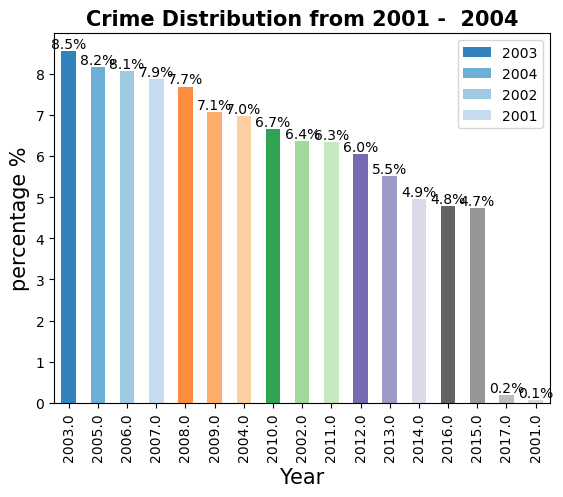

In [27]:
count = df1.Year.value_counts(normalize = True) * 100
bars = count.plot(kind = "bar", color = colors)
plt.legend(bars.containers[0],["2003", "2004", "2002", "2001"]) 
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')
plt.title("Crime Distribution from 2001 -  2004", fontweight = "bold", fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("percentage %", fontsize = 15);

print("From the graph distribution, the crime rate increases each year")

#### ward distribution where the crimes occurs

In [28]:
df1.Ward.value_counts()

Ward
28.0    254863
24.0    214237
2.0     213545
42.0    210377
27.0    199823
17.0    185901
20.0    185545
6.0     179264
3.0     171582
21.0    167422
16.0    161737
34.0    157856
15.0    156954
37.0    150140
8.0     149432
7.0     148169
9.0     139262
5.0     132692
29.0    129672
1.0     107949
4.0     102186
26.0     97082
32.0     95865
10.0     95849
18.0     94303
30.0     79230
31.0     78840
49.0     78154
11.0     77247
14.0     77000
25.0     75836
44.0     75679
35.0     74878
46.0     74713
23.0     73455
13.0     71838
43.0     69612
12.0     67827
22.0     63922
38.0     60009
36.0     58135
47.0     57875
40.0     57503
41.0     57325
50.0     56447
45.0     56341
33.0     55577
48.0     55039
39.0     51999
19.0     49760
Name: count, dtype: int64

In [29]:
count = df1.Ward.value_counts(normalize = True) * 100
count = count[count > 1.5]

# Show the filtered value counts
print(count)

Ward
28.0    4.587210
24.0    3.855994
2.0     3.843538
42.0    3.786519
27.0    3.596560
17.0    3.345982
20.0    3.339574
6.0     3.226524
3.0     3.088258
21.0    3.013383
16.0    2.911060
34.0    2.841207
15.0    2.824972
37.0    2.702329
8.0     2.689586
7.0     2.666854
9.0     2.506539
5.0     2.388287
29.0    2.333931
1.0     1.942945
4.0     1.839218
26.0    1.747353
32.0    1.725448
10.0    1.725160
18.0    1.697334
Name: proportion, dtype: float64


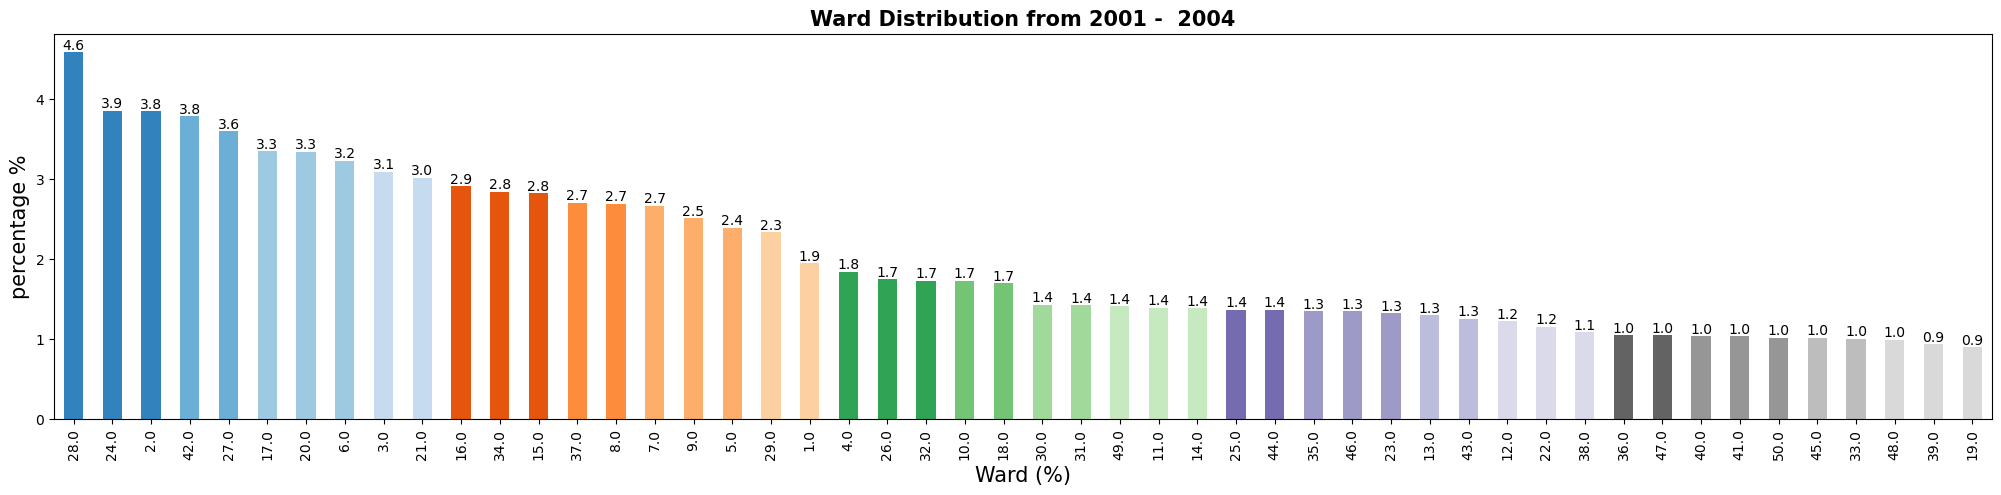

In [30]:
# selecting colors for the graph respectively
cmap = plt.get_cmap('tab20c')
categories = df1.Ward.unique()
colors = cmap(np.linspace(0, 1, len(categories)))


count = df1.Ward.value_counts(normalize = True) * 100
# count = count[count > 1.5]
bars = count.plot(kind = "bar", color = colors, figsize = (25, 5))
# plt.legend(bars.containers[0],["2003", "2004", "2002", "2001"]) 
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f', label_type='edge')
plt.title("Ward Distribution from 2001 -  2004", fontweight = "bold", fontsize = 15)
plt.xlabel("Ward (%)", fontsize = 15)
plt.ylabel("percentage %", fontsize = 15);



Ward
2.0     3.843538
3.0     3.088258
6.0     3.226524
17.0    3.345982
19.0    0.895617
20.0    3.339574
21.0    3.013383
24.0    3.855994
27.0    3.596560
28.0    4.587210
39.0    0.935916
42.0    3.786519
48.0    0.990632
Name: proportion, dtype: float64


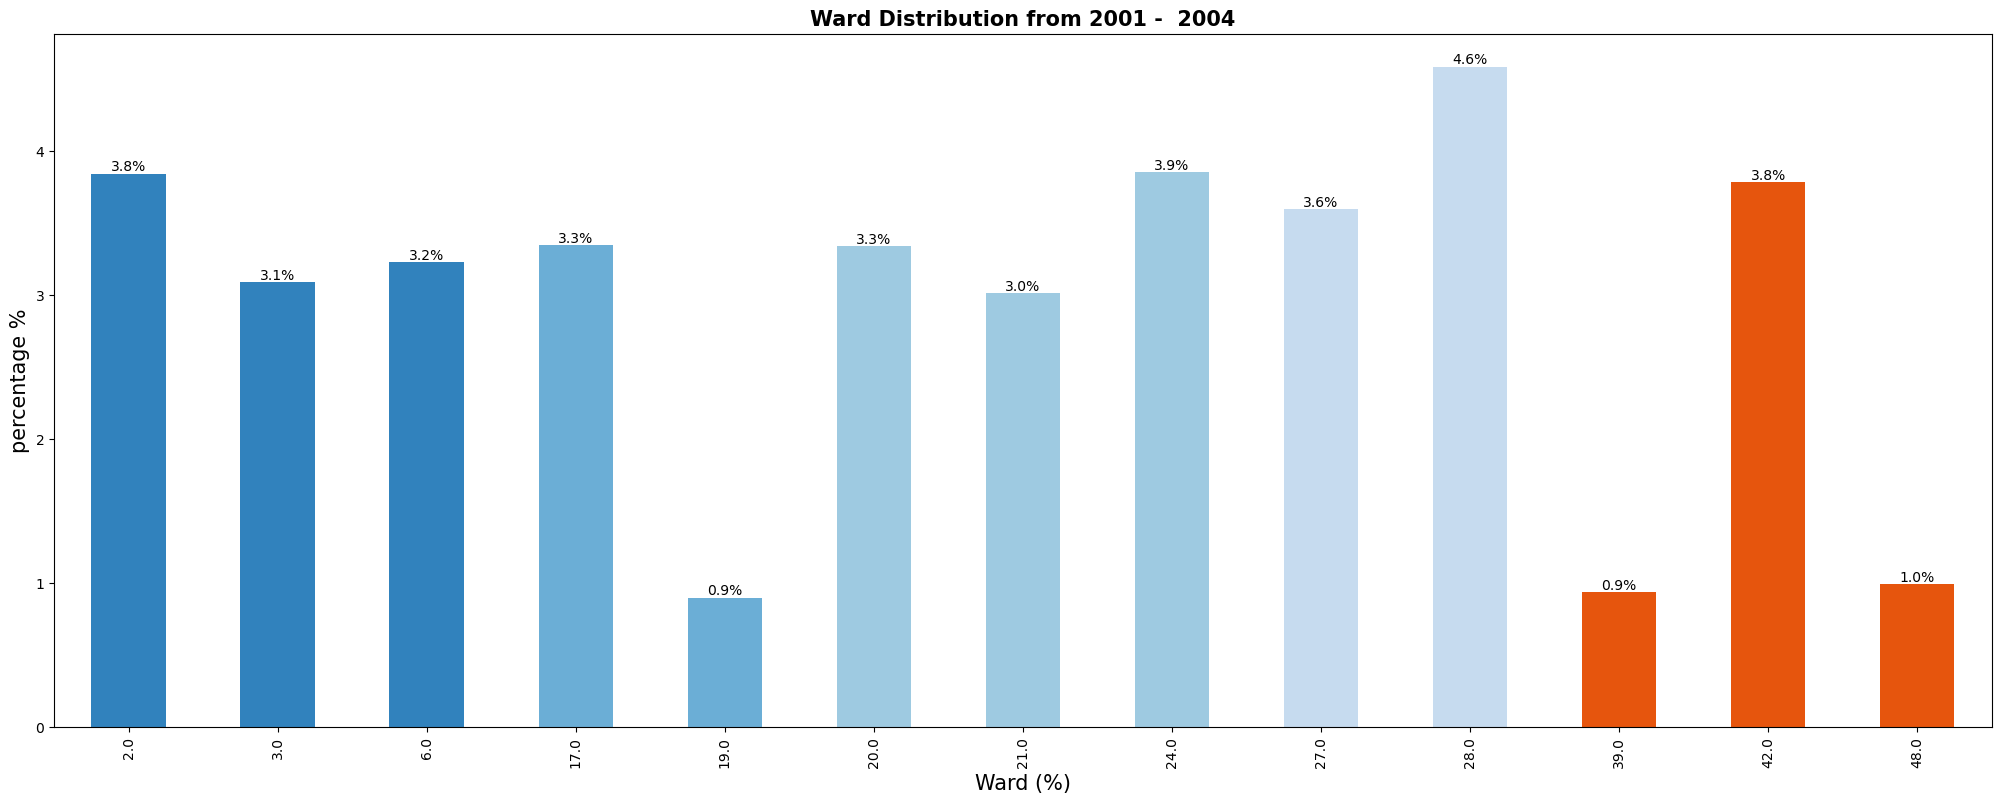

In [31]:
# from the ward distribution, we see that some wards have higher percentage of crime scenes while some have little percentage of crime scene
# Analysing wards that have frequencies from 3% upwards and 1% downwards

count = df1.Ward.value_counts(normalize=True) * 100
# Filter values greater than 1.5 and less than 1.0 using bitwise operators
count = count[(count > 3) | (count < 1)]  # Or another upper limit if you meant something else
count = count.sort_index()

# selecting colors for the graph respectively
cmap = plt.get_cmap('tab20c')
categories = df1.Ward.unique()
colors = cmap(np.linspace(0, 1, len(categories)))



bars = count.plot(kind = "bar", color = colors, figsize = (25, 9))
# plt.legend(bars.containers[0],["2003", "2004", "2002", "2001"]) 
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')
plt.title("Ward Distribution from 2001 -  2004", fontweight = "bold", fontsize = 15)
plt.xlabel("Ward (%)", fontsize = 15)
plt.ylabel("percentage %", fontsize = 15);



# Show the filtered value counts
print(count)


#### The graph above Analyses the  wards that have crime frequencies from 3% upwards and 1% downwards

In [32]:
count = df1.Ward.value_counts(normalize=True) * 100
# Filter values greater than 1.5 and less than 1.0 using bitwise operators
count = count[(count > 3) | (count < 1)]  # Or another upper limit if you meant something else
count = count.sort_index()
print(count)

# putting the wards into a list so that the analysis will be filtered using the listed wards

filt_wards = count.index
filt_wards

Ward
2.0     3.843538
3.0     3.088258
6.0     3.226524
17.0    3.345982
19.0    0.895617
20.0    3.339574
21.0    3.013383
24.0    3.855994
27.0    3.596560
28.0    4.587210
39.0    0.935916
42.0    3.786519
48.0    0.990632
Name: proportion, dtype: float64


Index([2.0, 3.0, 6.0, 17.0, 19.0, 20.0, 21.0, 24.0, 27.0, 28.0, 39.0, 42.0,
       48.0],
      dtype='float64', name='Ward')

In [33]:
# selected_col = df1[[ 'Ward', 'Location Description', 'District', 'Arrest', 'Year', 'Primary Type']]

# # filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
# filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]
# filtered_df = selected_col[selected_col['Ward'].isin(filt_wards)]

# # filtered_df = selected_col[selected_col['is_recid'] == 1]


# # s = filtered_df[filtered_df["decile_score"] == 1
# filtered_df

In [34]:
# # crosstabing the filtered wards with the districts 
# pd.crosstab(filtered_df.Ward, filtered_df.District).iloc[:5]

In [35]:
# cross = pd.crosstab(filtered_df.Ward, filtered_df.District, normalize = "index") * 100
# bars = cross.plot(kind = "bar", color = colors, figsize = (25, 9) , stacked = True)

# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f%%', label_type='center')
# plt.title("Wards where most crimes occurs and the  District that visited the crime incident scene  from 2001 -  2004", fontweight = "bold", fontsize = 15)
# plt.xlabel("Filtered Wards", fontsize = 12, fontweight = "bold")
# plt.ylabel("Percentage %", fontsize = 12, fontweight = "bold")

#### Analysing those filtered wards with the Arrest made in those wards

In [36]:
# cross = pd.crosstab(filtered_df.Ward, filtered_df.Arrest, normalize = "index")* 100
# print(cross.iloc[:5])
# bars = cross.plot(kind = "bar",  figsize = (25, 9), width = 0.8)

# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f%%', label_type='edge')
# plt.title("Filtered Wards and Arrest Distribution  from 2001 -  2004", fontweight = "bold", fontsize = 15)
# plt.xlabel("Filtered Wards", fontsize = 12, fontweight = "bold")
# plt.ylabel("Percentage %", fontsize = 12, fontweight = "bold")

#### Note: District: Indicates the police district where the incident occurred.

#### Analysing the distribution of the police districts where the incident occur

In [37]:
df1.District.value_counts()

District
8.0     384009
11.0    356596
7.0     334081
25.0    324475
6.0     321639
4.0     319245
3.0     284940
9.0     278518
12.0    270331
2.0     254534
5.0     247687
19.0    246026
15.0    245892
10.0    236846
18.0    235694
14.0    216924
1.0     209007
16.0    184302
22.0    183961
24.0    165030
17.0    160924
20.0     95113
31.0       119
21.0         4
23.0         1
13.0         1
Name: count, dtype: int64

From the distribution, most of the incident occurs in district 8 and there seems to be no incident that occur at district 31 and 21


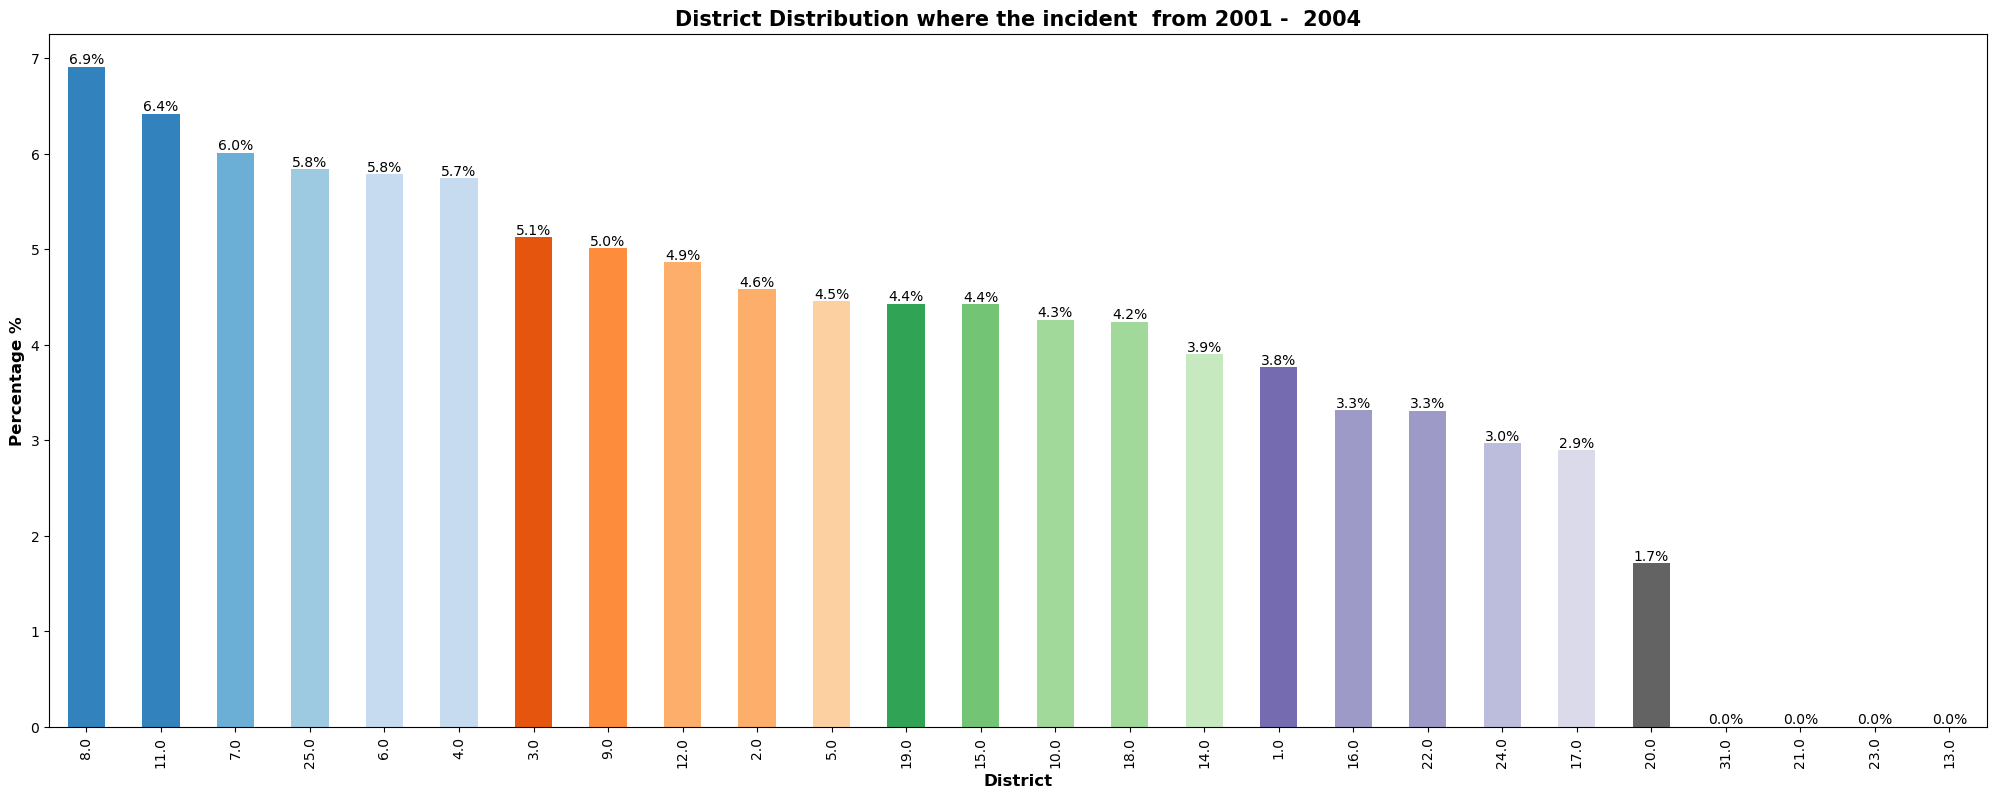

In [38]:
# selecting colors for the graph respectively
cmap = plt.get_cmap('tab20c')
categories = df1.District.unique()
colors = cmap(np.linspace(0, 1, len(categories)))


count = df1.District.value_counts(normalize = True) * 100
bars = count.plot(kind = "bar", color = colors, figsize = (25, 9))

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')
plt.title("District Distribution where the incident  from 2001 -  2004", fontweight = "bold", fontsize = 15)
plt.xlabel("District", fontsize = 12, fontweight = "bold")
plt.ylabel("Percentage %", fontsize = 12, fontweight = "bold")
print ("From the distribution, most of the incident occurs in district 8 and there seems to be no incident that occur at district 31 and 21")

## Analysising which ward is visited the most by a particular district

 The plot shows the district police that intervane in diffrent incident in the ward


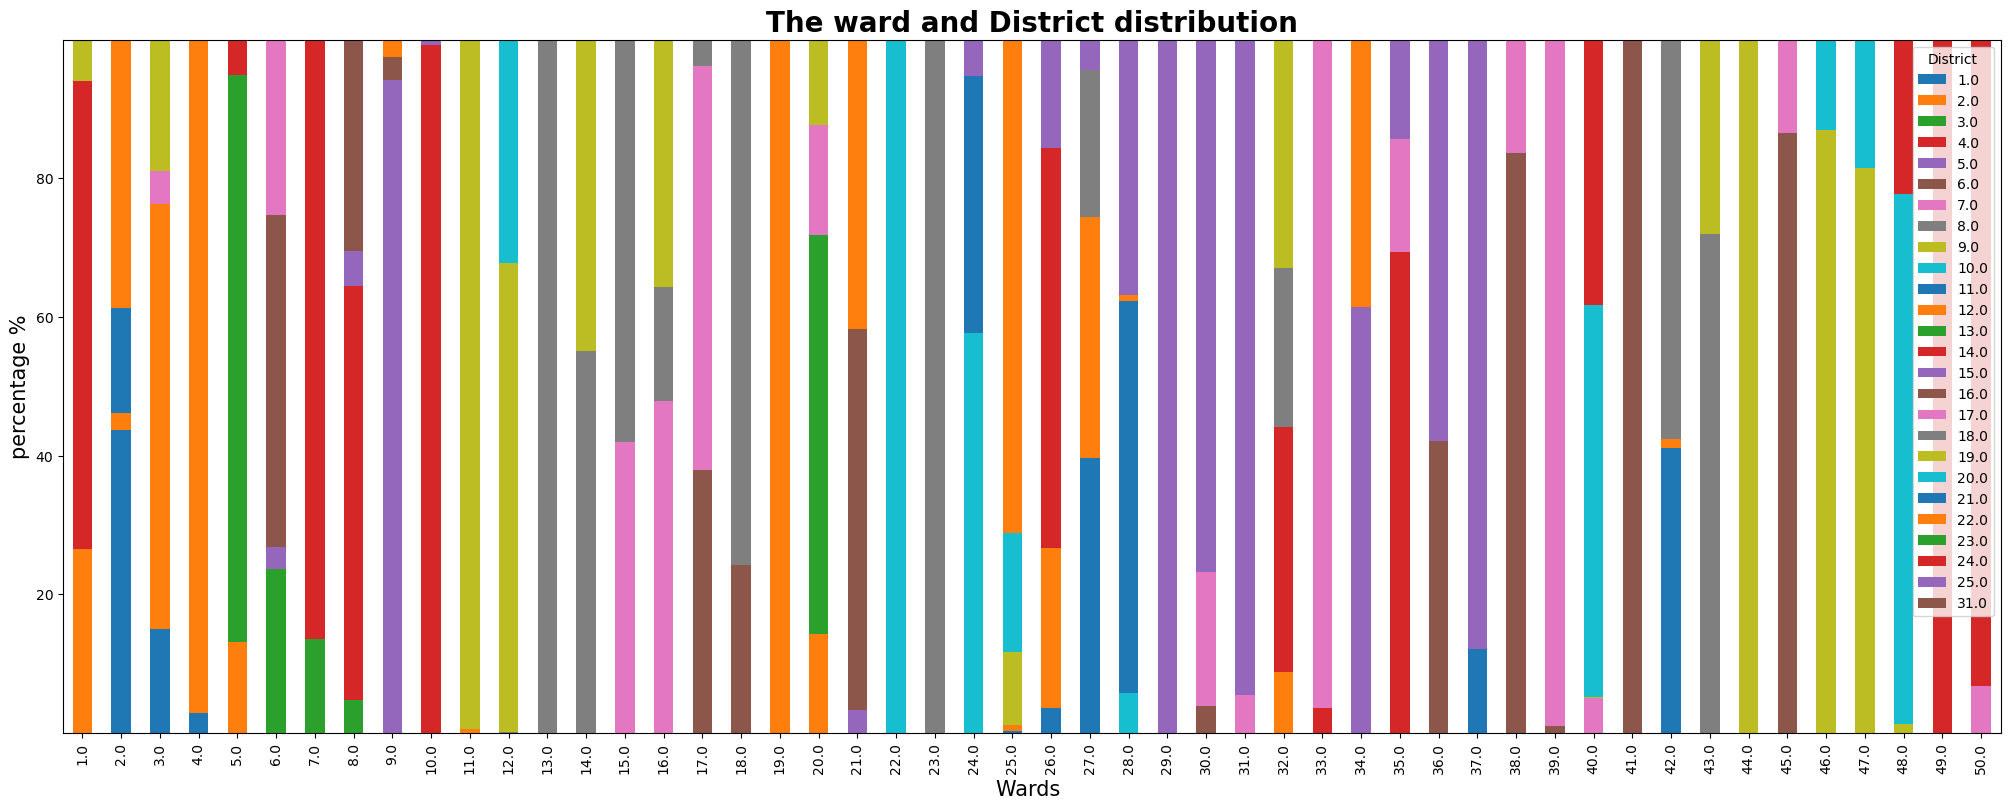

In [39]:
crosstab = pd.crosstab(df["Ward"], df["District"], normalize = "index") * 100 
bars = crosstab.plot(kind = "bar", stacked = True, figsize = (25, 9), )
plt.xlabel("Wards ", fontsize = 15)
plt.ylabel("percentage %", fontsize = 15)
plt.title("The ward and District distribution", fontsize = 20, fontweight = "bold")
print(" The plot shows the district police that intervane in diffrent incident in the ward")
# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f', label_type='center')

##### From the graph above we can observe that there are some wards where only a particular district police intervenes in their situation but there are different police district intervene

In [40]:
df1.columns

Index(['Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'Year'],
      dtype='object')

### analyzing the unique offense type  distribution `primary type`

In [41]:
df1["Primary Type"].unique()

array(['THEFT', 'OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE',
       'DECEPTIVE PRACTICE', 'BATTERY', 'BURGLARY', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'NARCOTICS', 'GAMBLING', 'PROSTITUTION',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL DAMAGE', 'ASSAULT', 'STALKING', 'ARSON',
       'CRIMINAL TRESPASS', 'HOMICIDE', 'ROBBERY', 'OBSCENITY',
       'INTIMIDATION', 'KIDNAPPING', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'RITUALISM', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [42]:
print ("The Value Counts of the primary description of the  Crime")
df1["Primary Type"].value_counts()

The Value Counts of the primary description of the  Crime


Primary Type
THEFT                                1161813
BATTERY                              1007358
CRIMINAL DAMAGE                       638516
NARCOTICS                             607235
OTHER OFFENSE                         342133
ASSAULT                               337086
BURGLARY                              329131
MOTOR VEHICLE THEFT                   258165
ROBBERY                               210254
DECEPTIVE PRACTICE                    205389
CRIMINAL TRESPASS                     160501
PROSTITUTION                           57517
WEAPONS VIOLATION                      55066
PUBLIC PEACE VIOLATION                 41313
OFFENSE INVOLVING CHILDREN             37661
CRIM SEXUAL ASSAULT                    21524
SEX OFFENSE                            20067
GAMBLING                               12760
INTERFERENCE WITH PUBLIC OFFICER       12361
LIQUOR LAW VIOLATION                   11401
ARSON                                   8964
HOMICIDE                                78

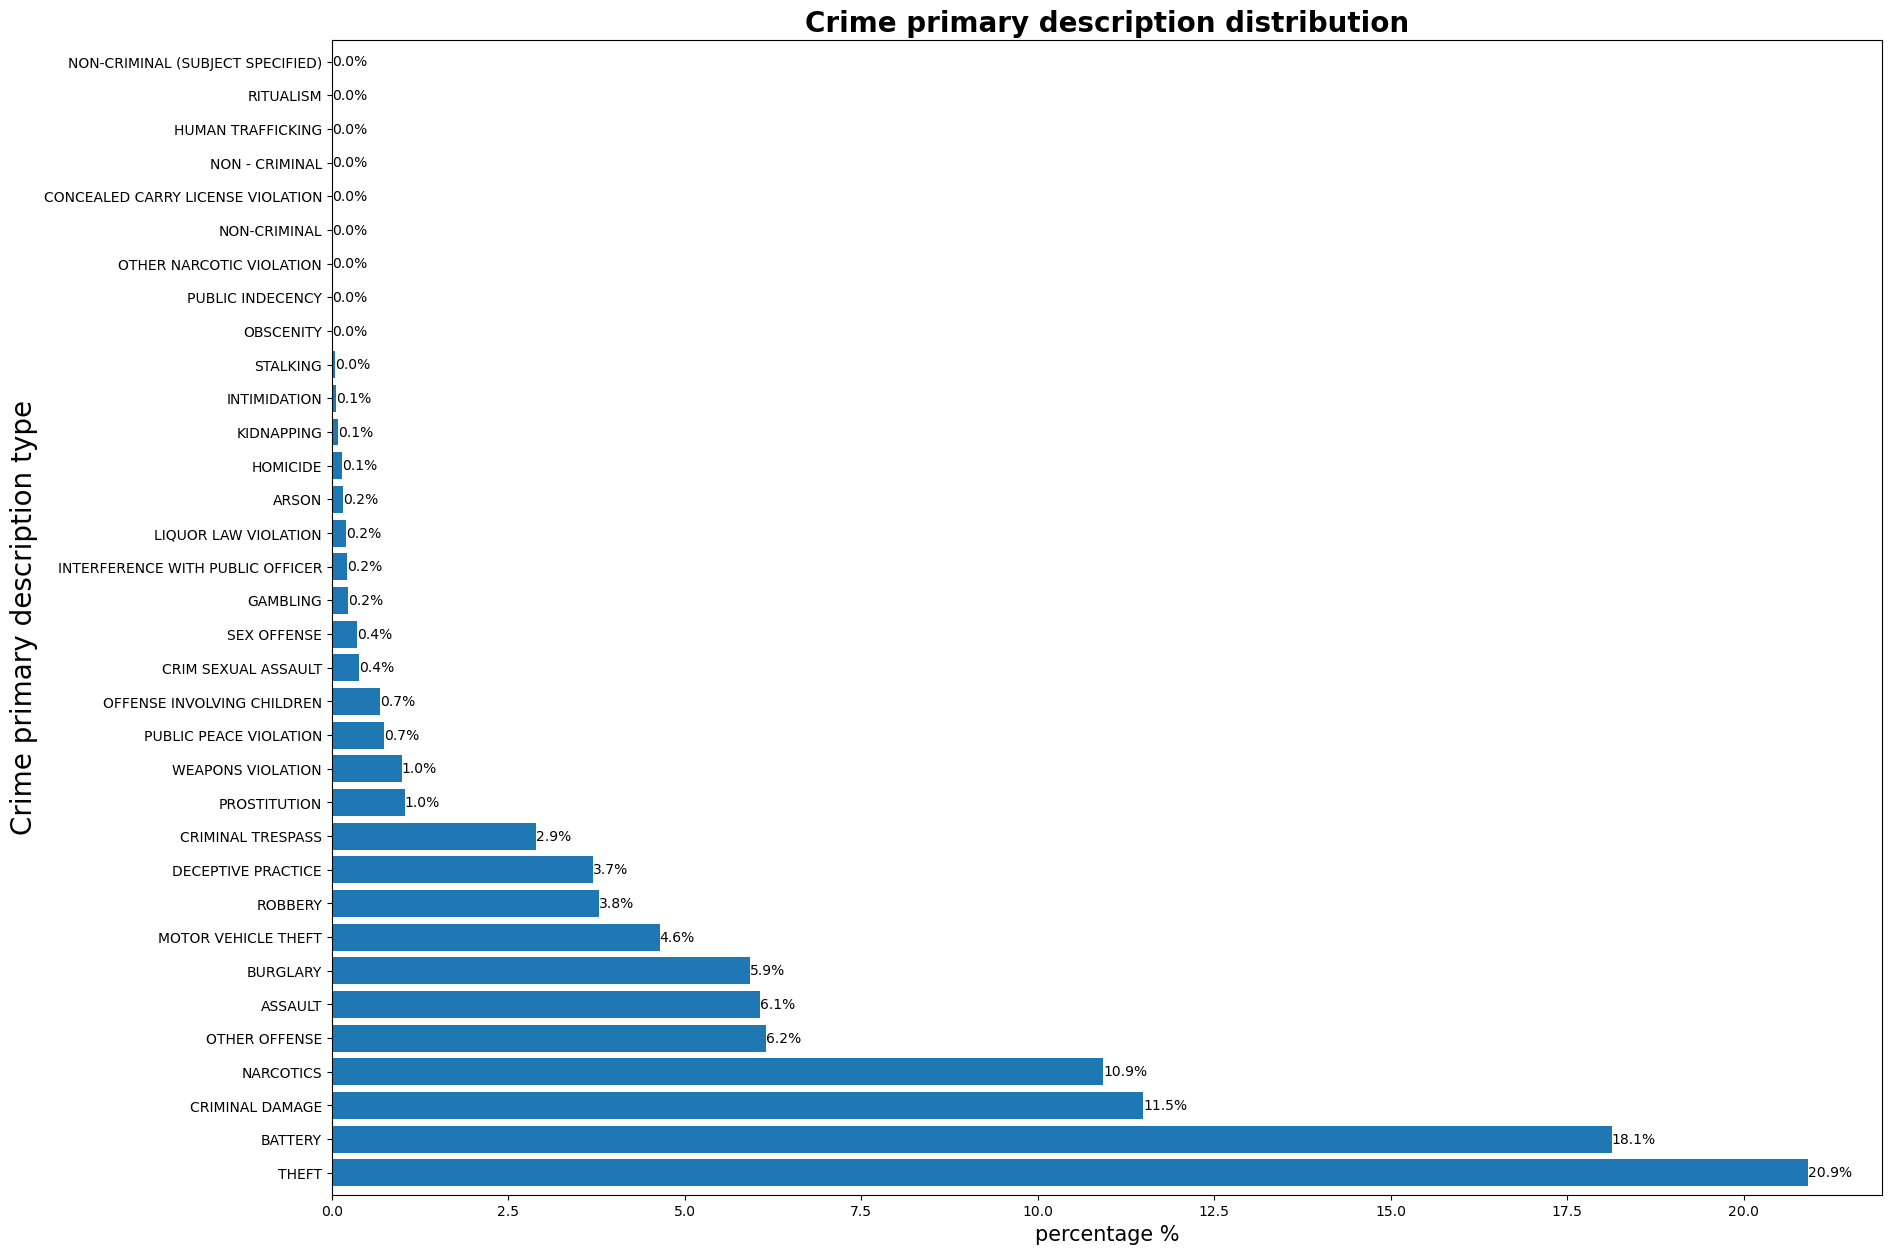

In [43]:
# plotting the primary description of the crime type
count = df1["Primary Type"].value_counts(normalize = True) * 100
bars = count.plot(kind = "barh", figsize = (20, 15), width = 0.8)
plt.xlabel("percentage %", fontsize= 15)
plt.ylabel("Crime primary description type", fontsize= 20)
plt.title("Crime primary description distribution", fontsize= 20, fontweight = "bold")
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')

##### From the graph above, theft is the most.
* next: Analyzing the ward distribution and the type of  crime commited

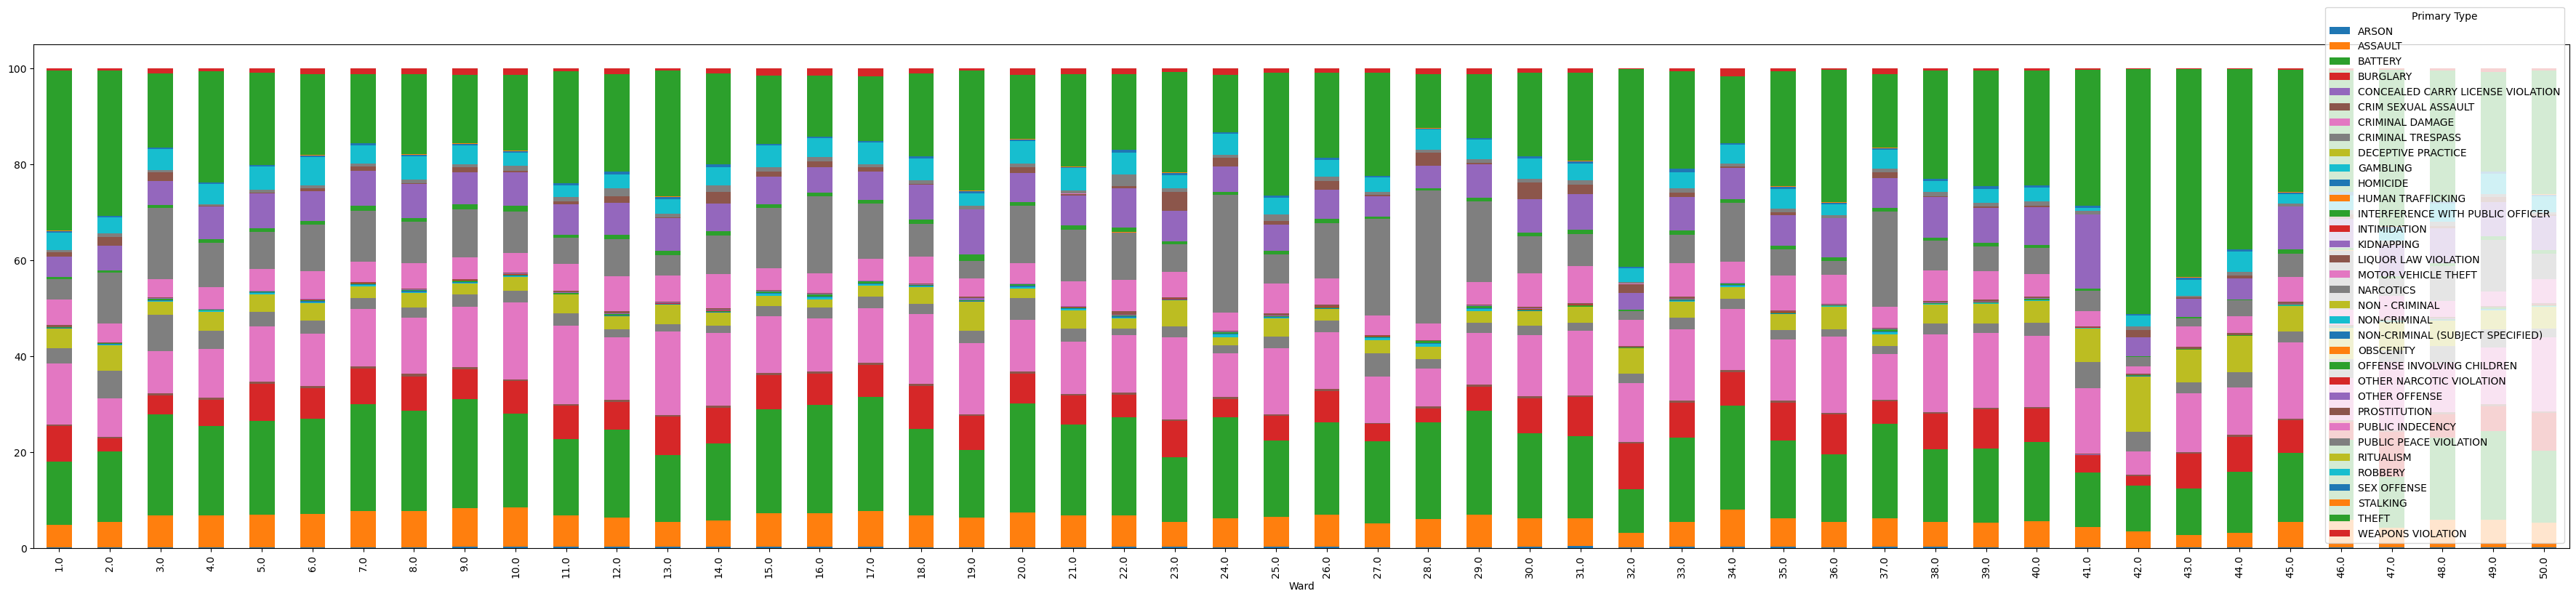

In [44]:
cross = pd.crosstab(df1["Ward"], df1["Primary Type"], normalize = "index") * 100
bars = cross.plot(kind = "bar", figsize = (45,9), stacked = True)
# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f', label_type='center')

##### From the graph above, Ward 42 is rated highest in Theft

### Analyzing the location description where the incident occur

In [45]:
des_count = df1["Location Description"].value_counts()
des_count 

Location Description
STREET                   1447714
RESIDENCE                 925066
APARTMENT                 590855
SIDEWALK                  581369
OTHER                     206150
                          ...   
FUNERAL PARLOR                 1
PUBLIC GRAMMAR SCHOOL          1
COUNTY JAIL                    1
LOADING DOCK                   1
LAGOON                         1
Name: count, Length: 172, dtype: int64

In [46]:
# Normalizing the Location Description 
des_count1 = df1["Location Description"].value_counts(normalize = True) * 100
des_count1.head(50)

Location Description
STREET                               26.066230
RESIDENCE                            16.655903
APARTMENT                            10.638401
SIDEWALK                             10.467605
OTHER                                 3.711751
PARKING LOT/GARAGE(NON.RESID.)        2.826350
ALLEY                                 2.271865
SCHOOL, PUBLIC, BUILDING              2.142985
RESIDENCE-GARAGE                      1.971000
RESIDENCE PORCH/HALLWAY               1.744874
SMALL RETAIL STORE                    1.716642
VEHICLE NON-COMMERCIAL                1.671395
RESTAURANT                            1.488931
GROCERY FOOD STORE                    1.238192
DEPARTMENT STORE                      1.194170
RESIDENTIAL YARD (FRONT/BACK)         1.071627
GAS STATION                           1.050687
PARK PROPERTY                         0.786679
CHA PARKING LOT/GROUNDS               0.754648
COMMERCIAL / BUSINESS OFFICE          0.694493
CTA PLATFORM                          0

##### From the value count above, removing the outliers (the location description percentage that is greater than 1)
##### Note: the filtration can be adjusted

In [47]:
des_count_filtered = des_count1[des_count1 > 1]

# Show the filtered value counts
print(des_count_filtered)

Location Description
STREET                            26.066230
RESIDENCE                         16.655903
APARTMENT                         10.638401
SIDEWALK                          10.467605
OTHER                              3.711751
PARKING LOT/GARAGE(NON.RESID.)     2.826350
ALLEY                              2.271865
SCHOOL, PUBLIC, BUILDING           2.142985
RESIDENCE-GARAGE                   1.971000
RESIDENCE PORCH/HALLWAY            1.744874
SMALL RETAIL STORE                 1.716642
VEHICLE NON-COMMERCIAL             1.671395
RESTAURANT                         1.488931
GROCERY FOOD STORE                 1.238192
DEPARTMENT STORE                   1.194170
RESIDENTIAL YARD (FRONT/BACK)      1.071627
GAS STATION                        1.050687
Name: proportion, dtype: float64


In [48]:
des_count_filtered.index

Index(['STREET', 'RESIDENCE', 'APARTMENT', 'SIDEWALK', 'OTHER',
       'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY', 'SCHOOL, PUBLIC, BUILDING',
       'RESIDENCE-GARAGE', 'RESIDENCE PORCH/HALLWAY', 'SMALL RETAIL STORE',
       'VEHICLE NON-COMMERCIAL', 'RESTAURANT', 'GROCERY FOOD STORE',
       'DEPARTMENT STORE', 'RESIDENTIAL YARD (FRONT/BACK)', 'GAS STATION'],
      dtype='object', name='Location Description')

Text(0.5, 1.0, 'Crime Location Description')

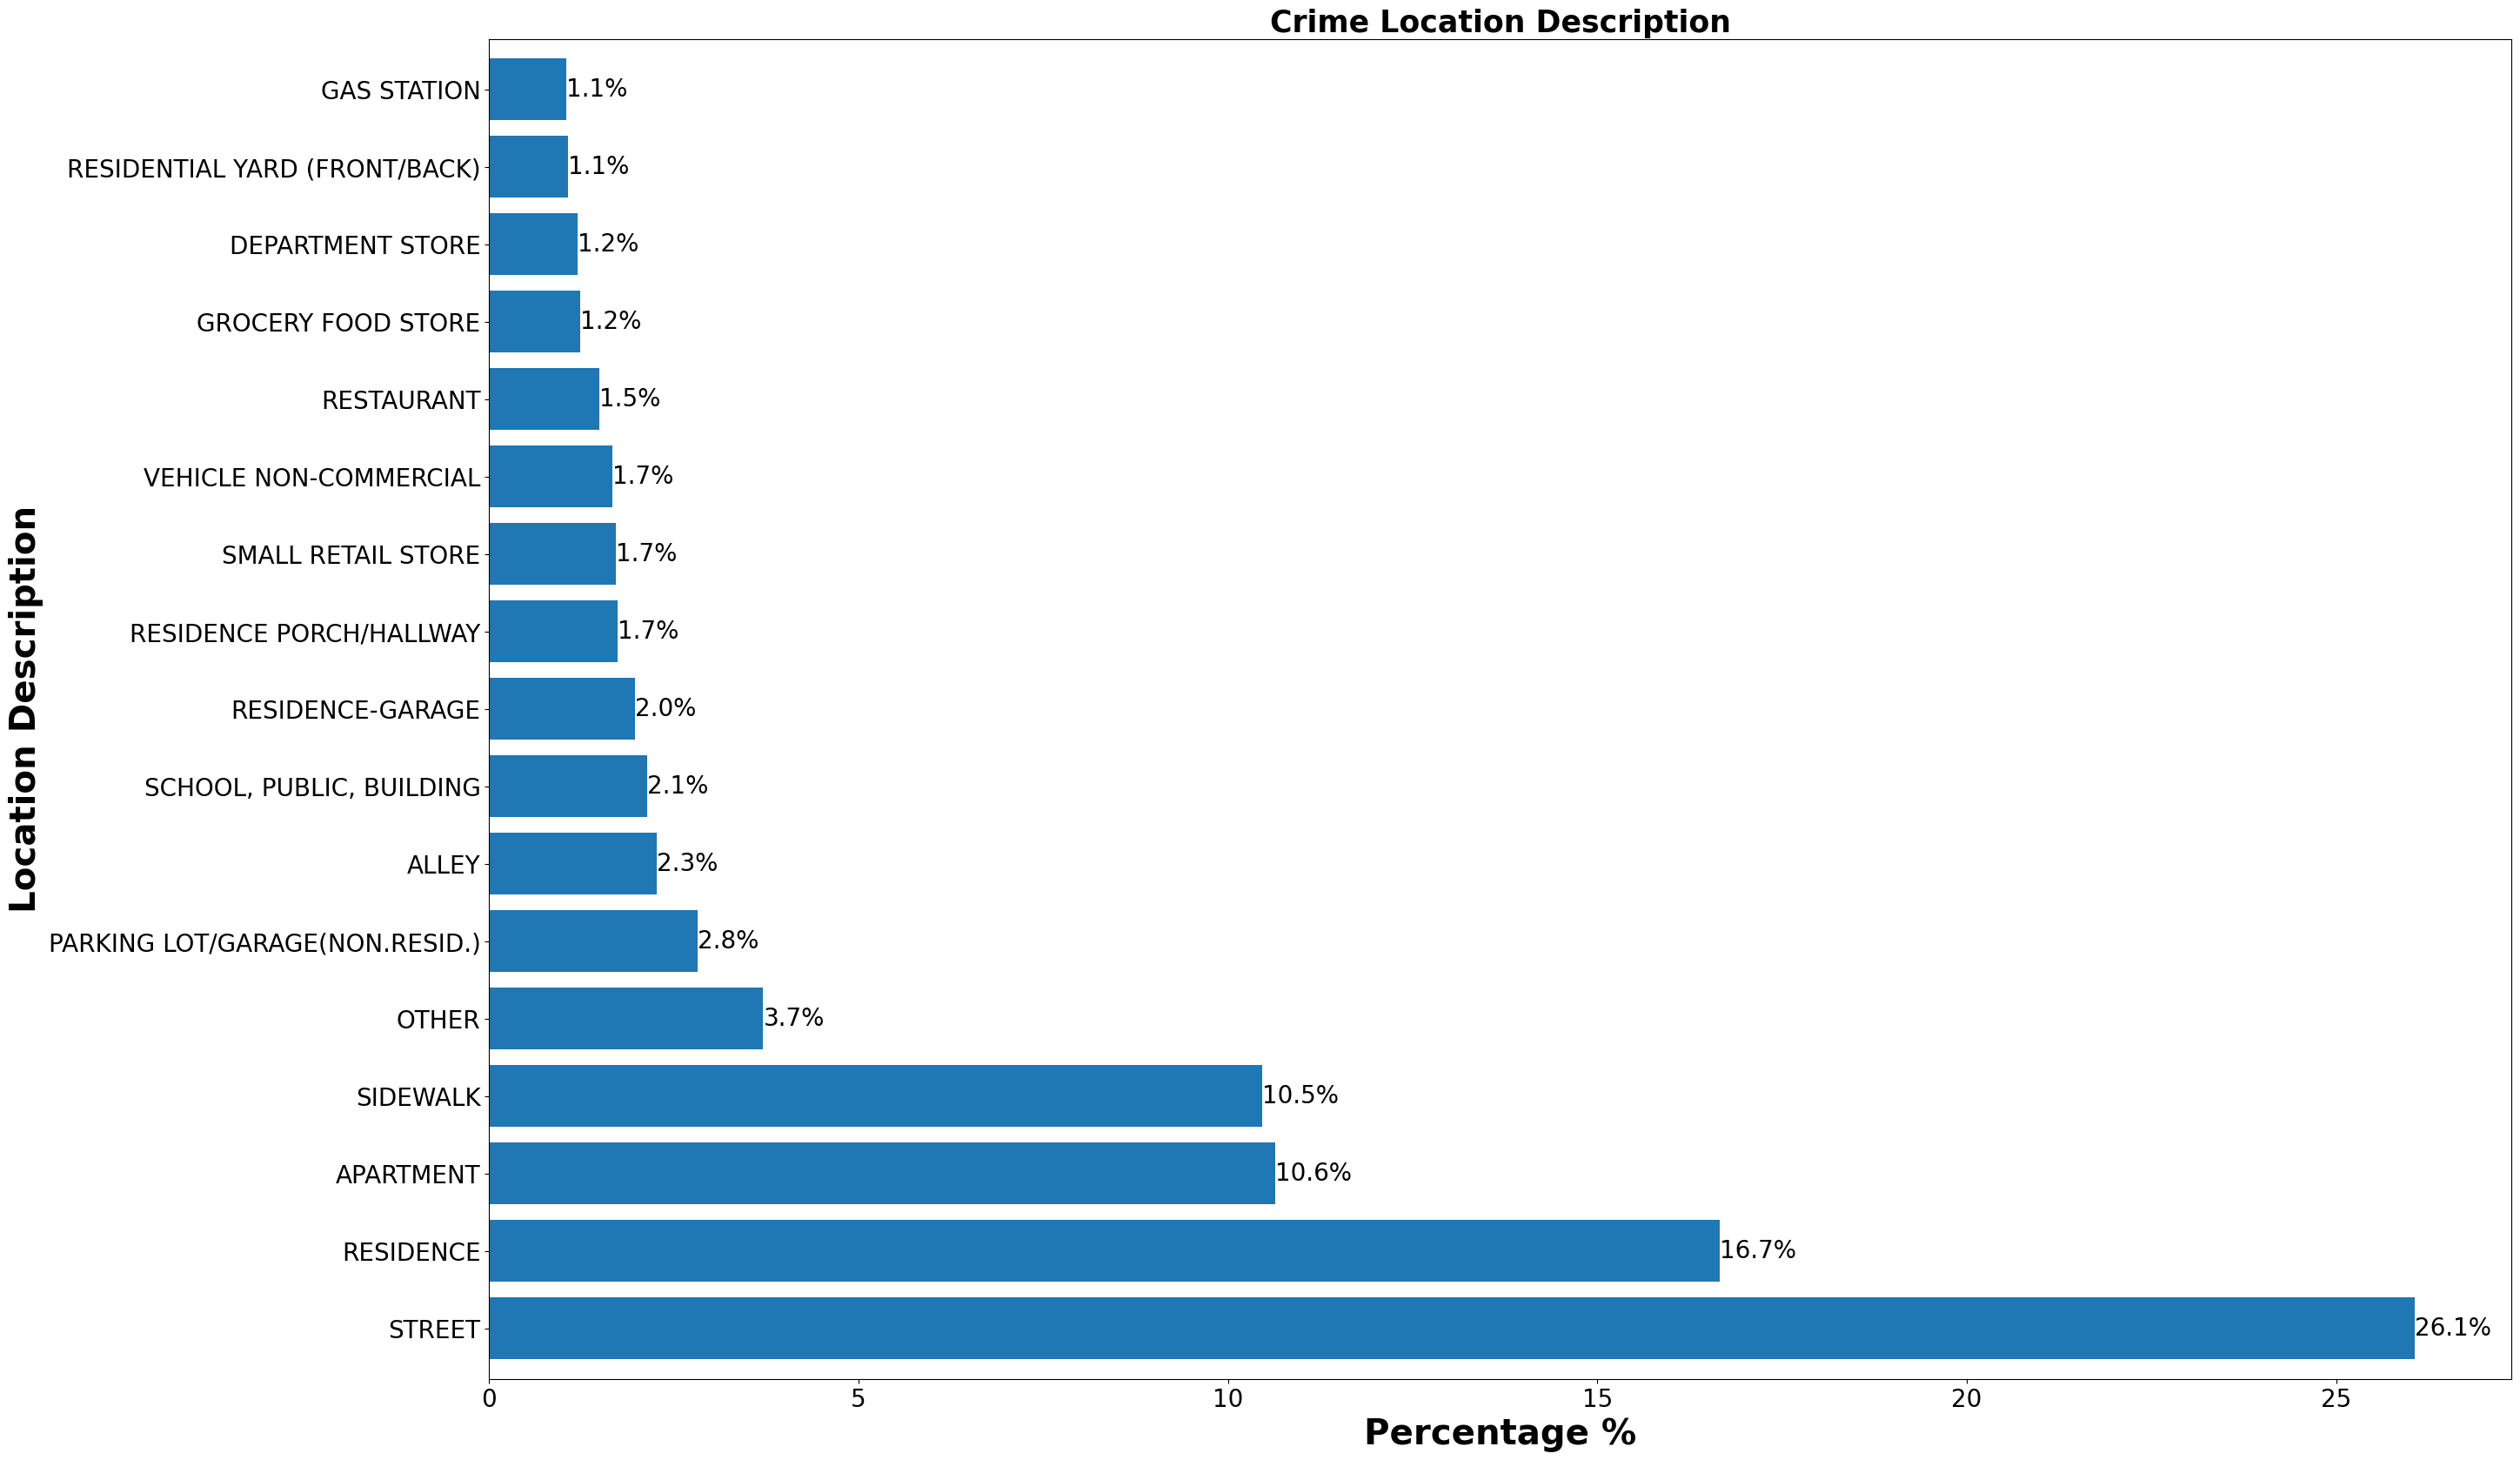

In [49]:
bars = des_count_filtered.plot(kind = "barh", figsize = (30, 20), width = 0.8)
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20)  # Increase y-axis tick label size
plt.xlabel("Percentage %",fontsize=29, fontweight = "bold")  
plt.ylabel("Location Description",fontsize=29, fontweight = "bold")  
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=20)

plt.title("Crime Location Description", fontsize= 25, fontweight = "bold")

#### using the filtered location description to compare with:
1. the crime type `Primary Type` column
2. the ward where crime occurs most `Ward`
3. analyze to know at what rate the crime increases or decreases annually
4. what crime causes Arrest

In [50]:
des_index = des_count_filtered.index
des_index

Index(['STREET', 'RESIDENCE', 'APARTMENT', 'SIDEWALK', 'OTHER',
       'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY', 'SCHOOL, PUBLIC, BUILDING',
       'RESIDENCE-GARAGE', 'RESIDENCE PORCH/HALLWAY', 'SMALL RETAIL STORE',
       'VEHICLE NON-COMMERCIAL', 'RESTAURANT', 'GROCERY FOOD STORE',
       'DEPARTMENT STORE', 'RESIDENTIAL YARD (FRONT/BACK)', 'GAS STATION'],
      dtype='object', name='Location Description')

In [51]:
selected_col = df1[[ 'Ward', 'Location Description']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

# filtered_df = selected_col[selected_col['is_recid'] == 1]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

Ward            Location Description
0         7.0                       RESIDENCE
1        11.0                       RESIDENCE
2        35.0                       RESIDENCE
3        31.0                           OTHER
4        34.0                       RESIDENCE
...       ...                             ...
7941277  28.0                       APARTMENT
7941278  17.0                       APARTMENT
7941279  15.0                        SIDEWALK
7941280   7.0                        SIDEWALK
7941281   6.0  PARKING LOT/GARAGE(NON.RESID.)

[4883540 rows x 2 columns]

In [52]:
cross = pd.crosstab(filtered_df["Ward"], filtered_df["Location Description"], normalize = "index") * 100
cross

Location Description     ALLEY  APARTMENT  DEPARTMENT STORE  GAS STATION  \
Ward                                                                       
1.0                   2.473758   9.301929          2.584699     0.544035   
2.0                   1.854844   6.773640          1.235515     1.597681   
3.0                   2.202550  12.507897          0.432087     2.543384   
4.0                   1.537955  17.383125          0.284545     0.402126   
5.0                   1.864156  25.048927          0.269715     1.679961   
6.0                   2.213641  15.215707          1.428413     3.265735   
7.0                   1.761192  20.128730          0.251392     0.648708   
8.0                   2.358377  15.625885          0.514397     0.914725   
9.0                   2.351974   7.967928          0.320724     1.497533   
10.0                  2.785859  10.574259          0.432945     0.749284   
11.0                  2.344016  10.766205          0.973099     1.260001   
12.0                  2.958415  11.024885          2.274067     1.026523   
13.0                  2.102093   4.548792          8.083245     0.696702   
14.0                  2.839268   8.574166          1.971283     0.708760   
15.0                  3.075223  11.928098          0.841840     1.673513   
16.0                  2.904677  14.028987          0.123434     1.455989   
17.0                  2.431052  14.348222          0.200042     1.044597   
18.0                  2.180224   5.831666          0.239420     1.770782   
19.0                  1.727212   3.597972          0.182908     0.717742   
20.0                  2.589757  22.813483          0.217791     1.198742   
21.0                  2.188402   8.163737          2.092622     1.926824   
22.0                  3.239810  11.489340          0.258112     0.759252   
23.0                  2.414546   3.922406          0.244740     1.013452   
24.0                  3.757466  14.163742          0.064651     1.923629   
25.0                  2.902043   9.572701          0.350221     0.821672   
26.0                  2.936258  14.784551          0.060611     0.756513   
27.0                  2.761307   8.829781          0.244550     1.103194   
28.0                  4.000852  12.358681          0.153929     1.179688   
29.0                  3.494576  15.140931          0.145747     0.548645   
30.0                  3.119118  14.068083          0.360056     0.846949   
31.0                  2.808083  13.666364          1.917682     0.871427   
32.0                  1.716923   7.178555          2.940051     1.052153   
33.0                  3.131165  15.802324          1.152456     0.421916   
34.0                  2.226733   3.178051          0.424913     1.975710   
35.0                  2.813072  15.334516          1.200826     0.614951   
36.0                  2.036778   5.466256          4.723233     0.524596   
37.0                  3.245356  12.009084          2.599238     1.567839   
38.0                  2.334067   7.761276          0.528053     0.606894   
39.0                  2.547948  13.886634          0.617231     0.973901   
40.0                  2.720981  16.288424          0.662500     1.015439   
41.0                  1.331269   5.910217          0.256966     0.616099   
42.0                  0.984457   3.428438         15.224764     0.472320   
43.0                  1.945620   7.914860          0.808207     0.438940   
44.0                  2.999918   9.972877          1.780225     0.407660   
45.0                  2.360981   8.310255          2.956705     0.840788   
46.0                  2.844517  13.065952          0.960403     0.500941   
47.0                  2.125380   9.329047          1.000179     0.603282   
48.0                  2.565226  18.870049          0.348287     0.396254   
49.0                  3.726957  21.366360          0.421893     0.477668   
50.0                  3.160297  15.824896          0.780320     0.616453   

Location Description  GROCERY FOOD STORE      O

From the graph it observed that in most wards, the crime locations are;
Grocery food stores and Residnce


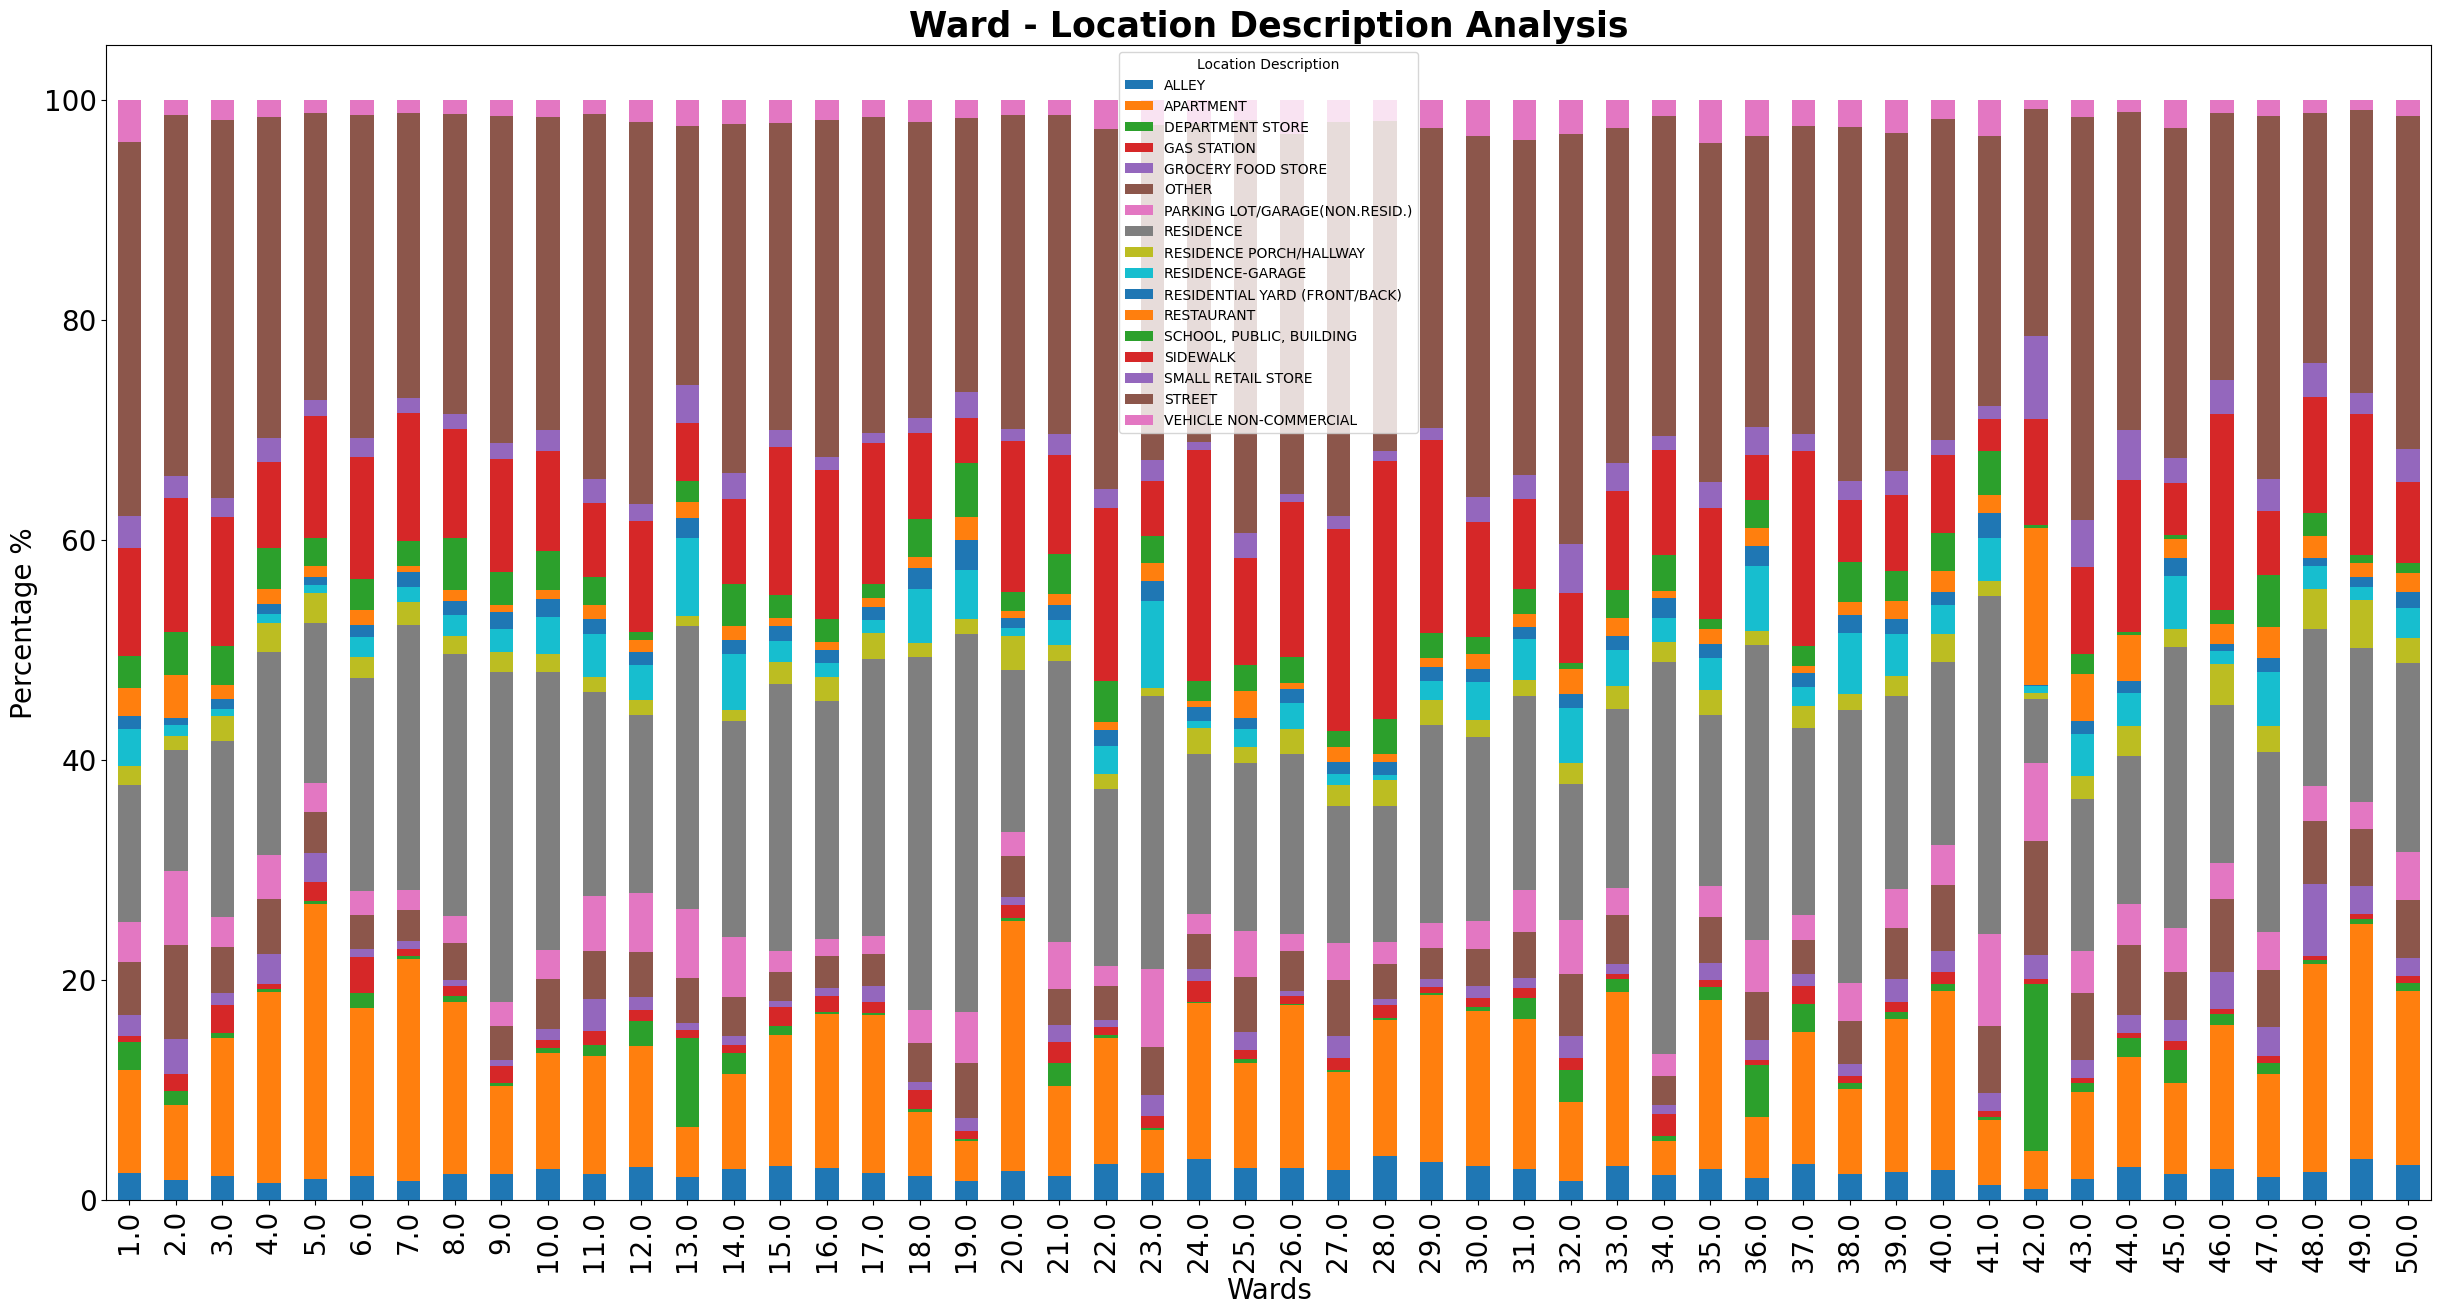

In [53]:
cross.plot(kind = "bar", figsize = (30, 15), stacked = True)
plt.ylabel("Percentage %", fontsize = 20)
plt.xlabel("Wards", fontsize = 20)
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20)  # Increase y-axis tick label size

plt.title("Ward - Location Description Analysis", fontsize = 25, fontweight = "bold")
print ("From the graph it observed that in most wards, the crime locations are;")
print("Grocery food stores and Residnce" )

##### Analysing the location description and the primary crime type. ie the location where a particular type of crime occur

In [54]:
selected_col = df1[[ 'Primary Type', 'Location Description']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

# filtered_df = selected_col[selected_col['is_recid'] == 1]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

Primary Type            Location Description
0                             THEFT                       RESIDENCE
1                     OTHER OFFENSE                       RESIDENCE
2        OFFENSE INVOLVING CHILDREN                       RESIDENCE
3                             THEFT                           OTHER
4                             THEFT                       RESIDENCE
...                             ...                             ...
7941277                     BATTERY                       APARTMENT
7941278             CRIMINAL DAMAGE                       APARTMENT
7941279                     BATTERY                        SIDEWALK
7941280                     BATTERY                        SIDEWALK
7941281               OTHER OFFENSE  PARKING LOT/GARAGE(NON.RESID.)

[4883540 rows x 2 columns]

In [55]:
cross = pd.crosstab(filtered_df["Primary Type"], filtered_df["Location Description"], normalize = "index") * 100
cross

Location Description                   ALLEY  APARTMENT  DEPARTMENT STORE  \
Primary Type                                                                
ARSON                               3.740865   9.092035          0.074322   
ASSAULT                             2.585885  14.098771          0.362131   
BATTERY                             2.463862  22.637630          0.140459   
BURGLARY                            0.121034  32.652251          0.191054   
CONCEALED CARRY LICENSE VIOLATION   3.921569   3.921569          0.000000   
CRIM SEXUAL ASSAULT                 7.969741  29.641468          0.031964   
CRIMINAL DAMAGE                     1.916617  11.596243          0.140577   
CRIMINAL TRESPASS                   0.618740  11.529606          0.972171   
DECEPTIVE PRACTICE                  0.653268   9.873011          3.226170   
GAMBLING                            6.482465   0.407368          0.000000   
HOMICIDE                           10.089731  13.240279          0.000000   
HUMAN TRAFFICKING                   0.000000  36.000000          0.000000   
INTERFERENCE WITH PUBLIC OFFICER    5.397599   2.391913          0.045130   
INTIMIDATION                        1.389410  11.528351          0.300413   
KIDNAPPING                          3.896947   9.309374          0.043299   
LIQUOR LAW VIOLATION                6.155254   1.110821          0.039205   
MOTOR VEHICLE THEFT                 1.680891   0.173733          0.011209   
NARCOTICS                           7.173596   1.966306          0.020337   
NON - CRIMINAL                      0.000000  12.500000          0.000000   
NON-CRIMINAL                        3.225806  12.903226          0.000000   
NON-CRIMINAL (SUBJECT SPECIFIED)    0.000000  66.666667          0.000000   
OBSCENITY                           2.958580  12.426036          0.295858   
OFFENSE INVOLVING CHILDREN          0.389830  25.946628          0.042996   
OTHER NARCOTIC VIOLATION           10.000000   2.500000          0.000000   
OTHER OFFENSE                       0.690673  16.979892          0.145689   
PROSTITUTION                        1.267400   0.182347          0.001805   
PUBLIC INDECENCY                    9.375000   1.562500          4.687500   
PUBLIC PEACE VIOLATION              3.437248   4.549626          0.297561   
RITUALISM                           0.000000  27.272727          0.000000   
ROBBERY                             7.836516   1.921286          0.345090   
SEX OFFENSE                         6.196594  16.929981          0.381140   
STALKING                            1.240182  12.195122          0.454733   
THEFT                               1.141154   5.868268          5.668775   
WEAPONS VIOLATION                   7.242181   7.513984          0.041361   

Location Description               GAS STATION  GROCERY FOOD STORE      OTHER  \
Primary Type                                                                    
ARSON                                 0.222965            0.656509   2.997646   
ASSAULT                               1.329922            1.050079   3.895152   
BATTERY                               0.698221            0.417523   2.387578   
BURGLARY                              0.102696            0.788557   3.861427   
CONCEALED CARRY LICENSE VIOLATION     1.960784            0.000000   0.000000   
CRIM SEXUAL ASSAULT                   0.223749            0.047946   4.847904   
CRIMINAL DAMAGE                       0.674736            0.390128   4.064479   
CRIMINAL TRESPASS                     9.427026            4.385192   9.731184   
DECEPTIVE PRACTICE                    3.154290            2.632098  13.362743   
GAMBLING                              0.301098            0.185972   3.188098   
HOMICIDE                              0.578265            0.000000   0.000000   
HUMAN TRAFFICKING                     0.000000            0.000000   4.000000   
INTERFERENCE WITH PUBLIC OFFICER      0.893582            0.162470   1.435148   
INTIMIDATION

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120')])

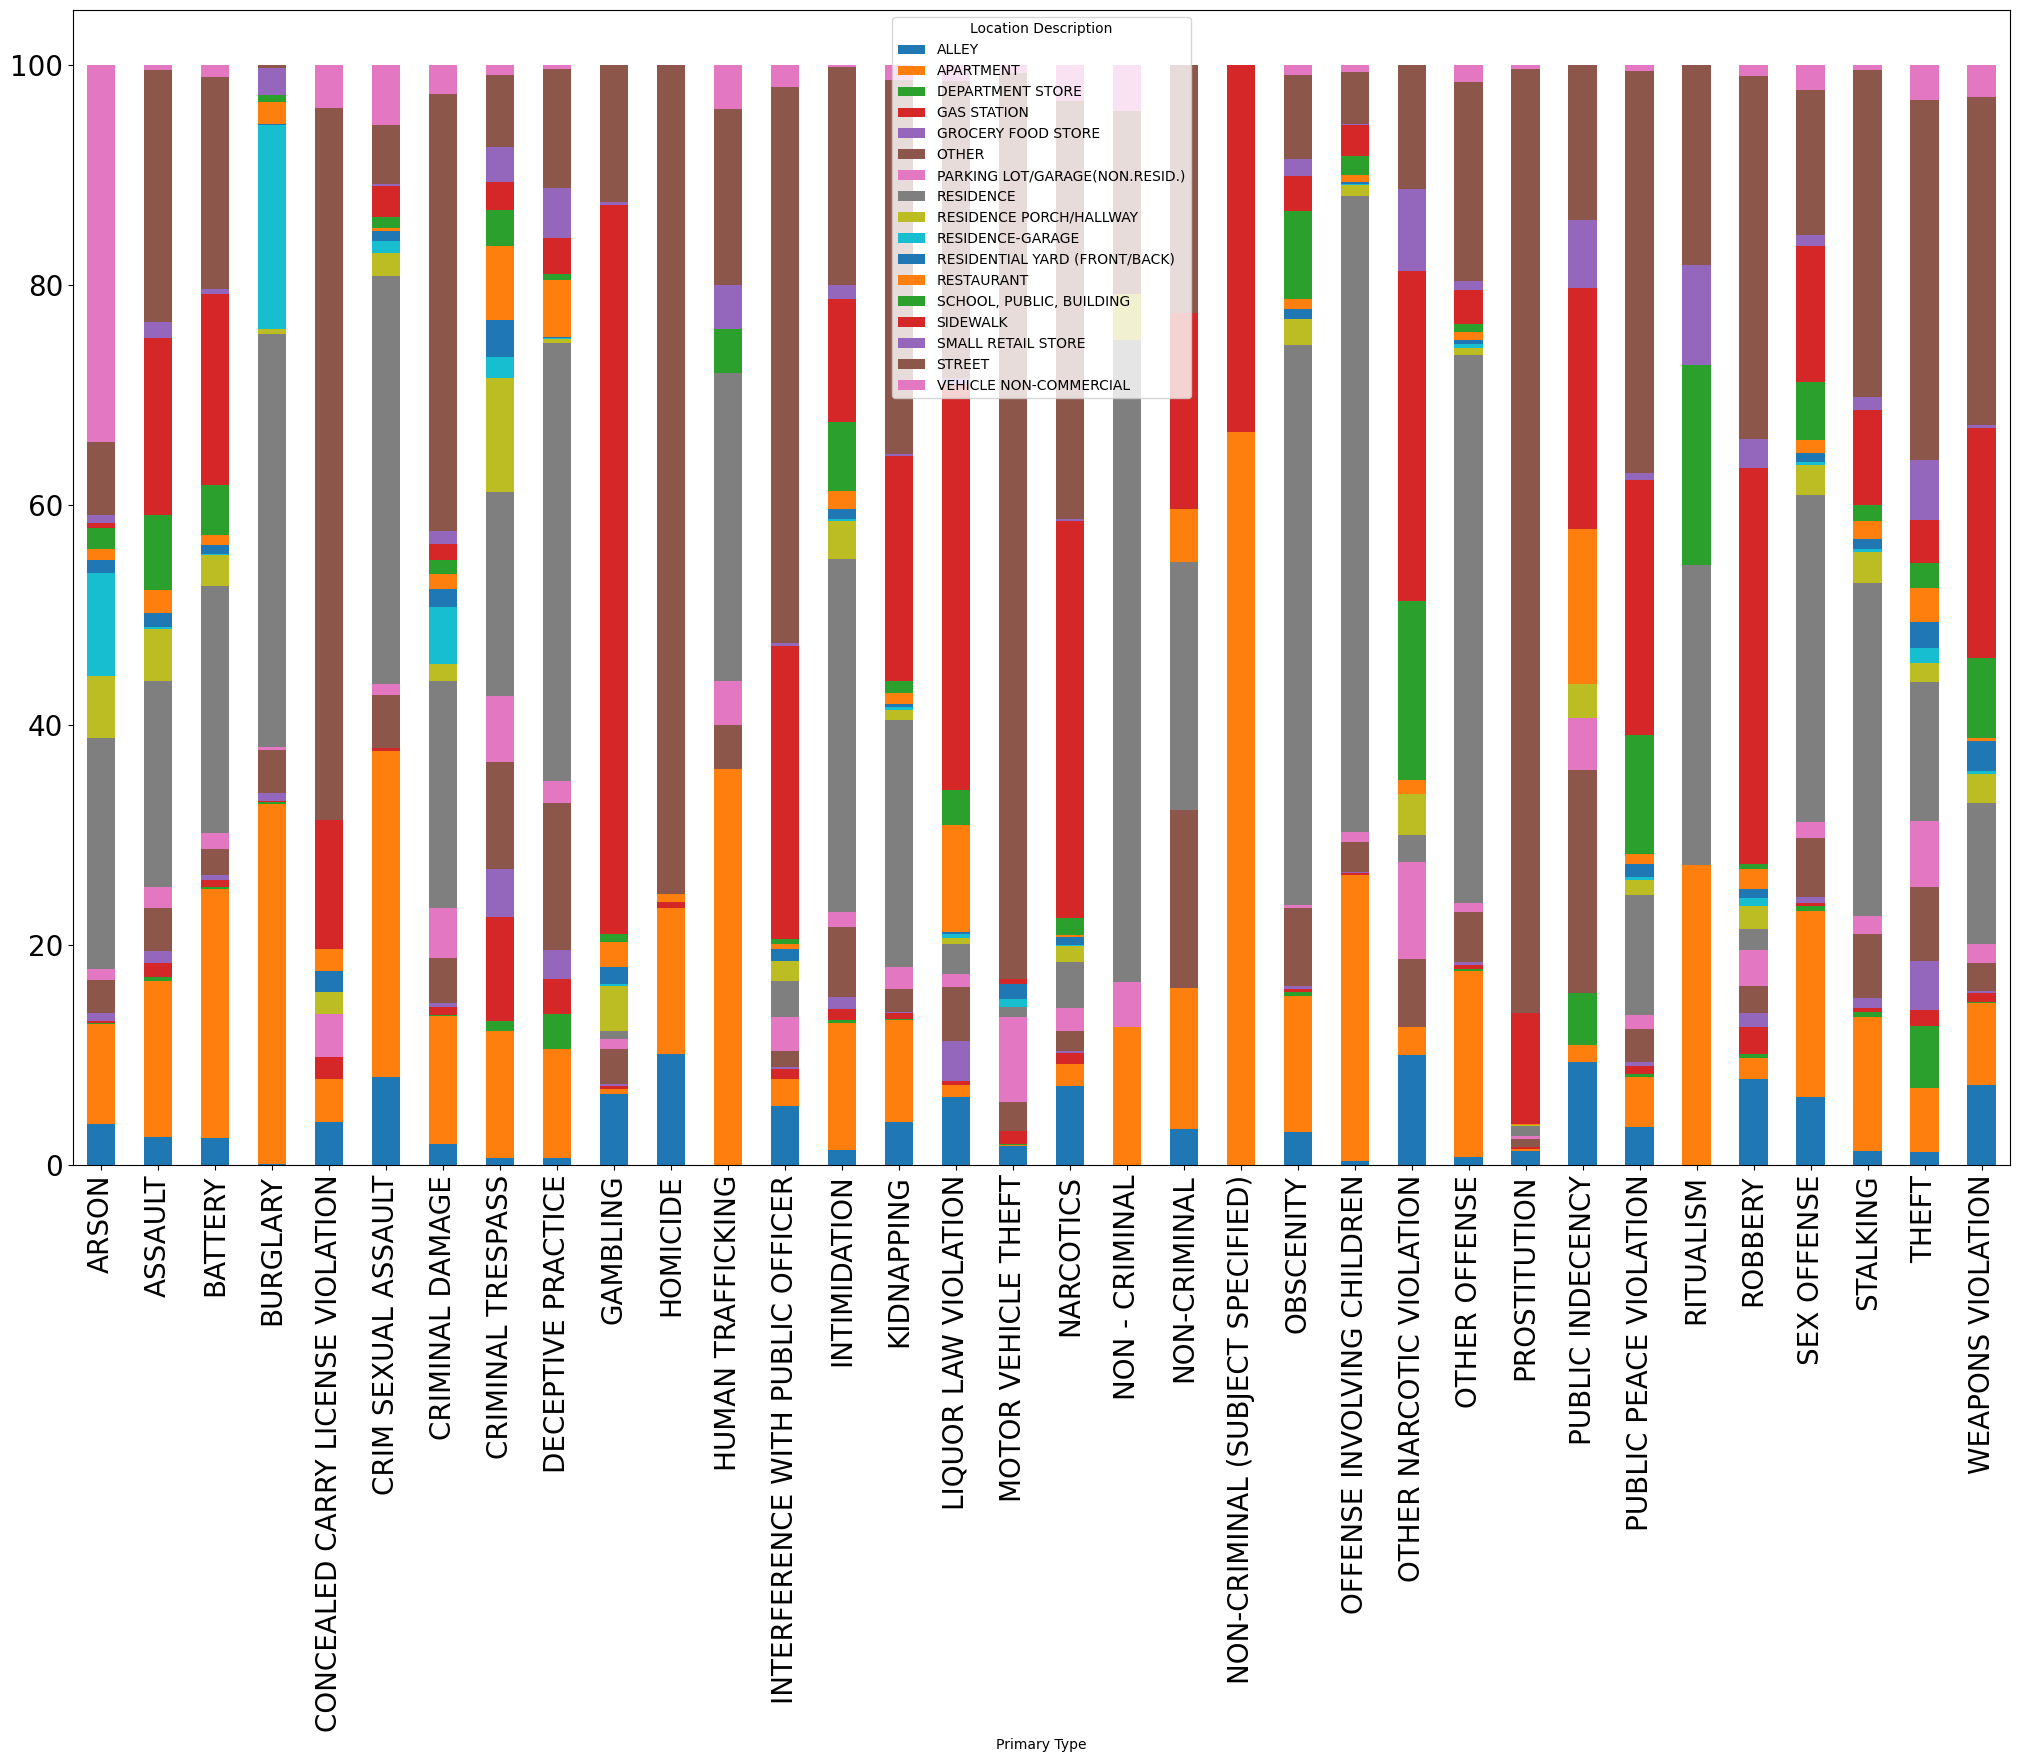

In [56]:
cross.plot(kind = "bar", figsize= (25, 15), stacked = True)
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20)  # Increase y-axis tick label size


##### Analysing the police district that intervenes in the crime types 

In [57]:
selected_col = df1[[ 'Primary Type', 'Location Description', 'District']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

# filtered_df = selected_col[selected_col['is_recid'] == 1]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

Primary Type            Location Description  District
0                             THEFT                       RESIDENCE       4.0
1                     OTHER OFFENSE                       RESIDENCE       9.0
2        OFFENSE INVOLVING CHILDREN                       RESIDENCE      14.0
3                             THEFT                           OTHER      25.0
4                             THEFT                       RESIDENCE      22.0
...                             ...                             ...       ...
7941277                     BATTERY                       APARTMENT      10.0
7941278             CRIMINAL DAMAGE                       APARTMENT       7.0
7941279                     BATTERY                        SIDEWALK       8.0
7941280                     BATTERY                        SIDEWALK       4.0
7941281               OTHER OFFENSE  PARKING LOT/GARAGE(NON.RESID.)       3.0

[4883540 rows x 3 columns]

In [58]:
cross = pd.crosstab(filtered_df["District"], filtered_df["Primary Type"], normalize = "index") * 100
cross

Primary Type     ARSON   ASSAULT    BATTERY  BURGLARY  \
District                                                
1.0           0.017194  4.204388   9.710313  1.701491   
2.0           0.086425  6.867028  20.234014  5.936767   
3.0           0.133207  7.082732  22.082353  7.084630   
4.0           0.174263  7.736116  20.696029  7.145805   
5.0           0.203631  8.124521  22.791819  6.370681   
6.0           0.133069  6.912430  20.854703  6.542832   
7.0           0.190627  7.616994  25.067514  6.223922   
8.0           0.234318  5.935968  16.684496  8.202001   
9.0           0.253564  6.359838  19.213871  6.583102   
10.0          0.229478  6.539664  22.136749  4.399571   
11.0          0.142184  5.893315  20.611359  3.042173   
12.0          0.149476  5.470739  14.970681  5.220134   
13.0          0.000000  0.000000   0.000000  0.000000   
14.0          0.212801  5.137836  14.831239  7.985895   
15.0          0.157517  6.103250  21.362893  3.350387   
16.0          0.170729  5.285783  15.048600  7.505254   
17.0          0.198341  4.916799  15.978743  7.963724   
18.0          0.028118  3.432156  11.258926  3.910749   
19.0          0.076454  3.829076  12.074357  8.137461   
20.0          0.091696  5.445025  16.008108  6.112230   
21.0          0.000000  0.000000  50.000000  0.000000   
22.0          0.137063  6.733371  18.076231  6.892483   
23.0          0.000000  0.000000   0.000000  0.000000   
24.0          0.119583  5.536409  17.189001  6.648259   
25.0          0.272751  5.973737  17.829962  6.930844   
31.0          0.000000  0.943396   2.830189  0.943396   

Primary Type  CONCEALED CARRY LICENSE VIOLATION  CRIM SEXUAL ASSAULT  \
District                                                               
1.0                                    0.001495             0.186147   
2.0                                    0.000000             0.406960   
3.0                                    0.001139             0.450474   
4.0                                    0.000682             0.427984   
5.0                                    0.001802             0.488805   
6.0                                    0.000681             0.446852   
7.0                                    0.002918             0.469436   
8.0                                    0.000000             0.367395   
9.0                                    0.000797             0.381542   
10.0                                   0.000929             0.409716   
11.0                                   0.002489             0.354371   
12.0                                   0.000887             0.292299   
13.0                                   0.000000             0.000000   
14.0                                   0.000000             0.352627   
15.0                                   0.002170             0.392274   
16.0                                   0.000000             0.260514   
17.0                                   0.000000             0.381635   
18.0                                   0.002343             0.275322   
19.0                                   0.000490             0.383741   
20.0                                   0.001207             0.331793   
21.0                                   0.000000             0.000000   
22.0                                   0.000596             0.368282   
23.0                                   0.000000             0.000000   
24.0                                   0.000672             0.388980   
25.0                                   0.000661             0.395736   
31.0                                   0.000000             0.000000   

Primary Type  CRIMINAL DAMAGE  CRIMINAL TRESPASS  DECEPTIVE PRACTICE  \
District                                                               
1.0                  6.601129           4.931036            7.264980   
2.0                 10.819808           2.897629            2.877209   
3.0                 11.595066           3.580266            2.247818   
4.0                 13.236

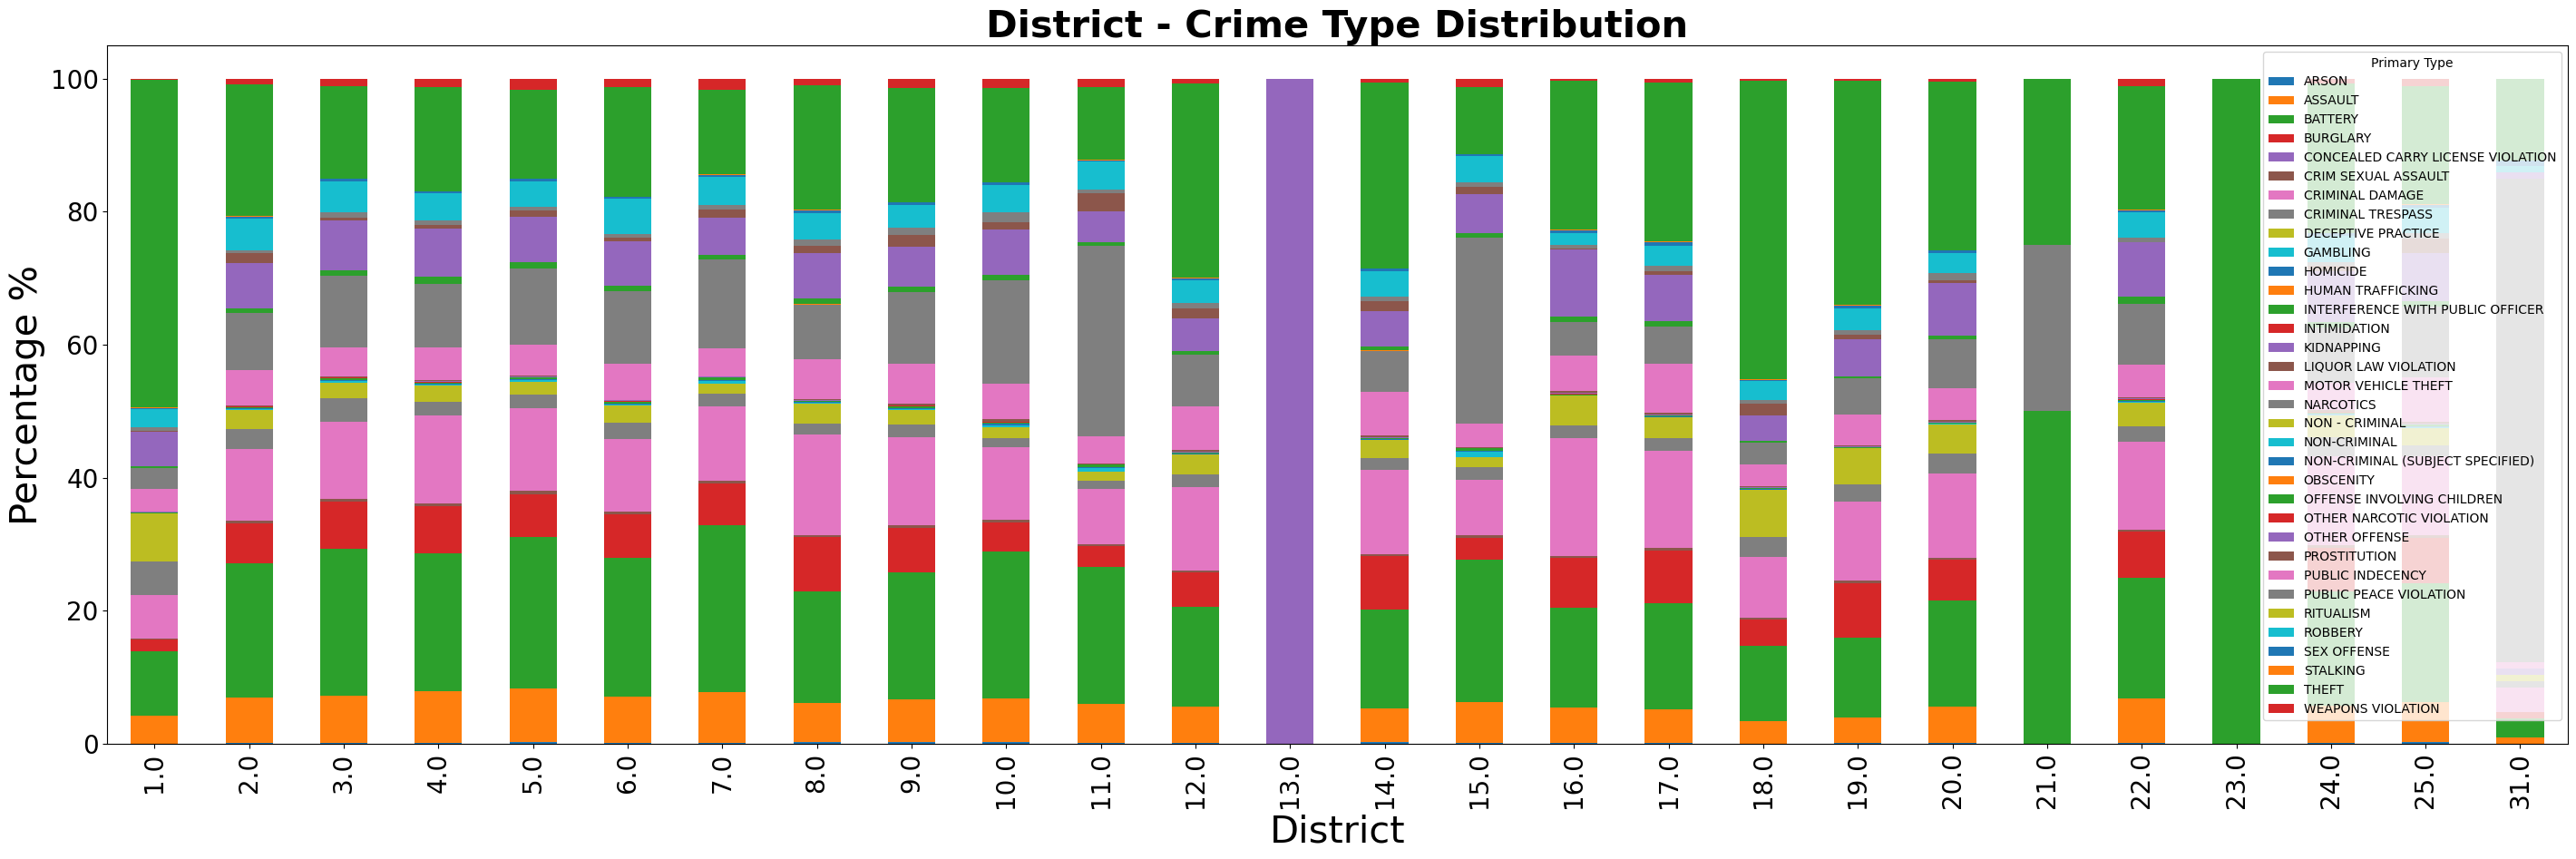

In [59]:
cross.plot(kind = "bar", figsize = (35, 10), stacked = True)
plt.title("District - Crime Type Distribution", fontsize = 30, fontweight = "bold")
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("District", fontsize = 30)
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20)  ;# Increase y-axis tick label size


#### From the graph above, ward 21 intervene only on 3 crime type

#### Analysing what kind of crime do causes arrest

In [60]:
selected_col = df1[[ 'Primary Type', 'Location Description', 'District', 'Year', 'Arrest']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

# filtered_df = selected_col[selected_col['is_recid'] == 1]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

Primary Type            Location Description  District  \
0                             THEFT                       RESIDENCE       4.0   
1                     OTHER OFFENSE                       RESIDENCE       9.0   
2        OFFENSE INVOLVING CHILDREN                       RESIDENCE      14.0   
3                             THEFT                           OTHER      25.0   
4                             THEFT                       RESIDENCE      22.0   
...                             ...                             ...       ...   
7941277                     BATTERY                       APARTMENT      10.0   
7941278             CRIMINAL DAMAGE                       APARTMENT       7.0   
7941279                     BATTERY                        SIDEWALK       8.0   
7941280                     BATTERY                        SIDEWALK       4.0   
7941281               OTHER OFFENSE  PARKING LOT/GARAGE(NON.RESID.)       3.0   

           Year  Arrest  
0        2004.0   False  
1        2003.0   False  
2        2004.0   False  
3        2004.0   False  
4        2003.0   False  
...         ...     ...  
7941277  2016.0    True  
7941278  2016.0    True  
7941279  2016.0   False  
7941280  2016.0   False  
7941281  2016.0    True  

[4883540 rows x 5 columns]

In [61]:
cross = pd.crosstab(filtered_df["Primary Type"], filtered_df["Arrest"]) 
cross

Arrest                              False   True 
Primary Type                                     
ARSON                                7078     995
ASSAULT                            230356   69812
BATTERY                            701898  206554
BURGLARY                           284109   15806
CONCEALED CARRY LICENSE VIOLATION       6      45
CRIM SEXUAL ASSAULT                 15714    3057
CRIMINAL DAMAGE                    541630   37411
CRIMINAL TRESPASS                   34215   71322
DECEPTIVE PRACTICE                 124937   16965
GAMBLING                               85   11207
HOMICIDE                             2690    2325
HUMAN TRAFFICKING                      22       3
INTERFERENCE WITH PUBLIC OFFICER      860   10219
INTIMIDATION                         2230     433
KIDNAPPING                           4127     492
LIQUOR LAW VIOLATION                   77    7575
MOTOR VEHICLE THEFT                228444   21364
NARCOTICS                            3885  546843
NON - CRIMINAL                         21       3
NON-CRIMINAL                           58       4
NON-CRIMINAL (SUBJECT SPECIFIED)        2       1
OBSCENITY                              57     281
OFFENSE INVOLVING CHILDREN          27514    7373
OTHER NARCOTIC VIOLATION               29      51
OTHER OFFENSE                      259134   55921
PROSTITUTION                          238   55151
PUBLIC INDECENCY                        1      63
PUBLIC PEACE VIOLATION              11039   24920
RITUALISM                               9       2
ROBBERY                            172007   16929
SEX OFFENSE                         11630    4637
STALKING                             2055     364
THEFT                              865385  113098
WEAPONS VIOLATION                    9979   40793

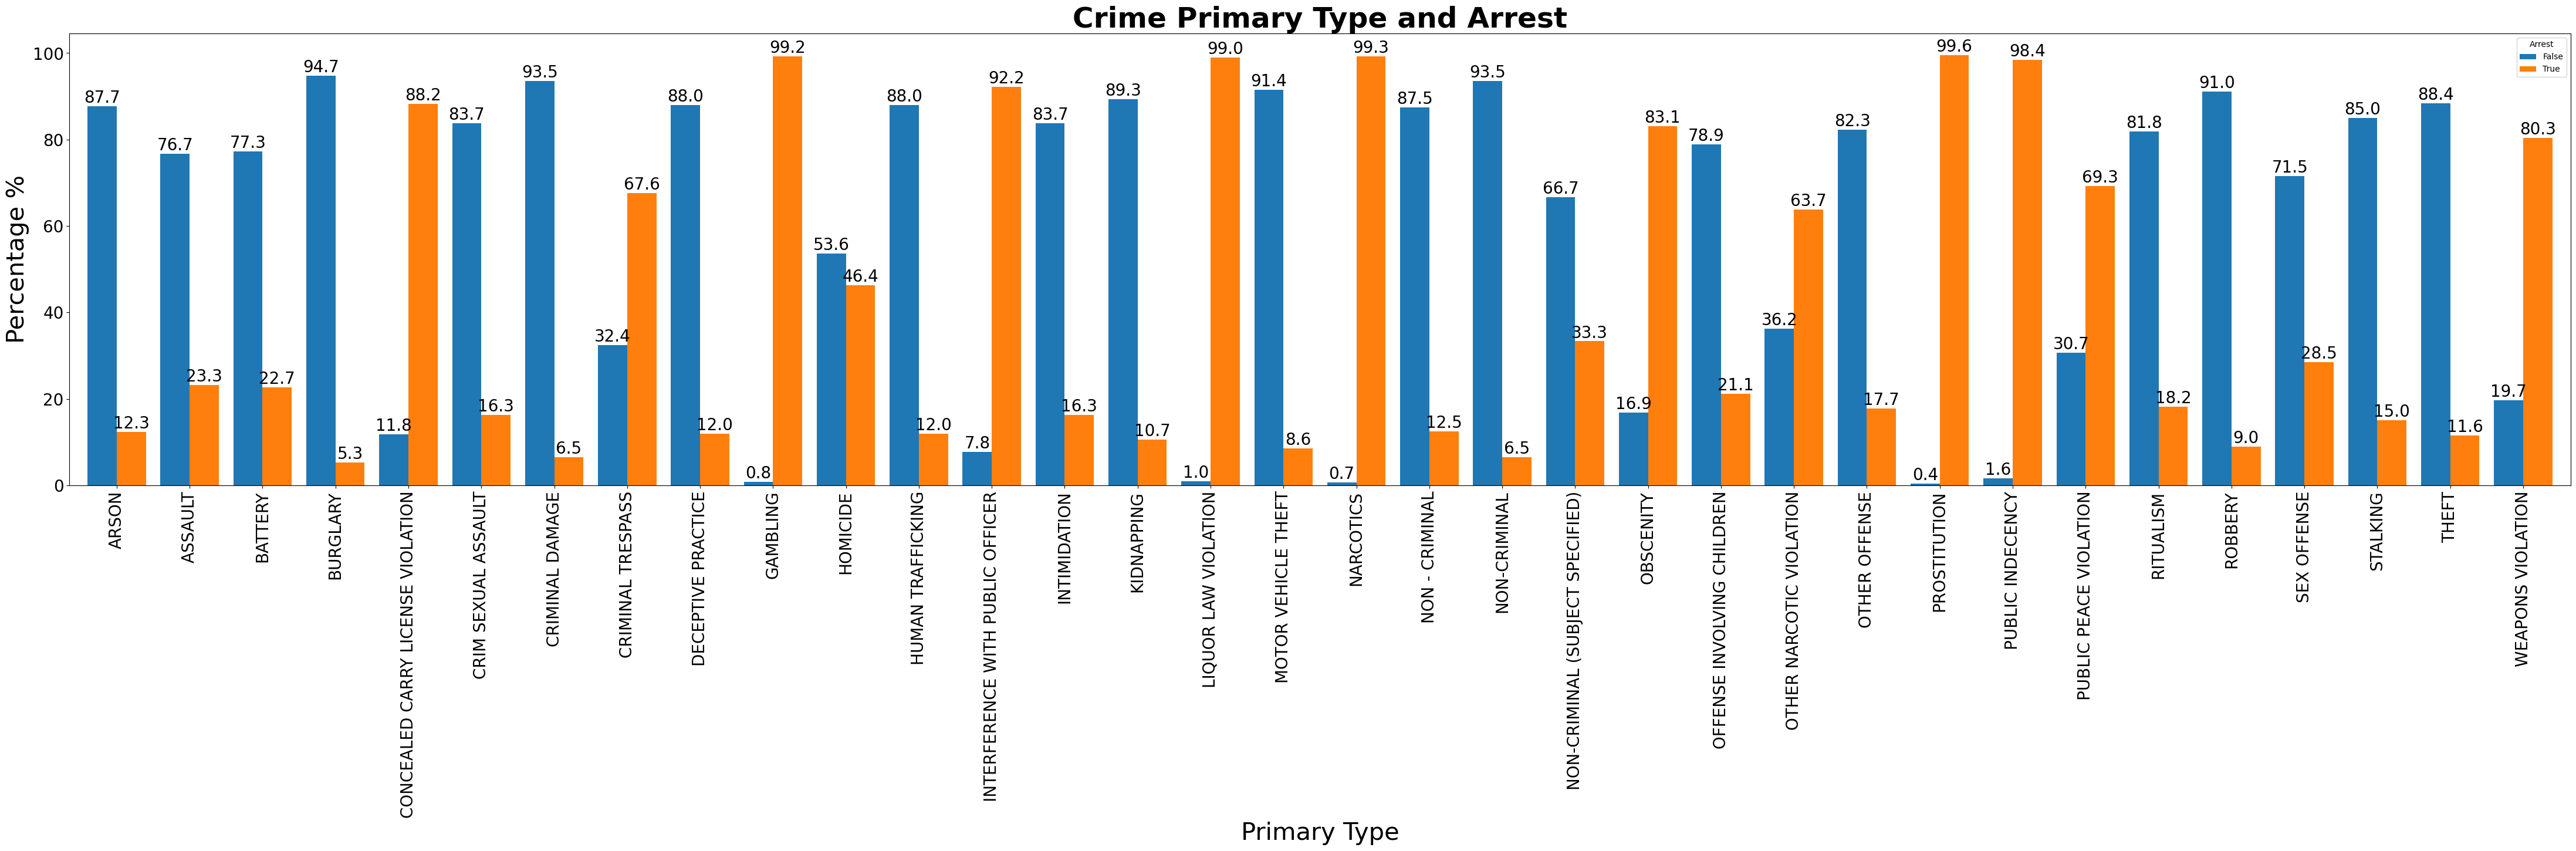

In [62]:
cross = pd.crosstab(filtered_df["Primary Type"], filtered_df["Arrest"], normalize = "index") * 100
bars = cross.plot(kind = "bar", figsize = (55, 10), width = 0.8)

plt.title("Crime Primary Type and Arrest", fontsize = 35, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Primary Type", fontsize = 30)
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20)  ;# Increase y-axis tick label size

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f', label_type='edge', fontsize=20)

####  Analysing the crime type and how it increases over the years

In [63]:
selected_col = df1[[ 'Primary Type', 'Location Description', 'District', 'Year', 'Arrest']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

# filtered_df = selected_col[selected_col['is_recid'] == 1]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

Primary Type            Location Description  District  \
0                             THEFT                       RESIDENCE       4.0   
1                     OTHER OFFENSE                       RESIDENCE       9.0   
2        OFFENSE INVOLVING CHILDREN                       RESIDENCE      14.0   
3                             THEFT                           OTHER      25.0   
4                             THEFT                       RESIDENCE      22.0   
...                             ...                             ...       ...   
7941277                     BATTERY                       APARTMENT      10.0   
7941278             CRIMINAL DAMAGE                       APARTMENT       7.0   
7941279                     BATTERY                        SIDEWALK       8.0   
7941280                     BATTERY                        SIDEWALK       4.0   
7941281               OTHER OFFENSE  PARKING LOT/GARAGE(NON.RESID.)       3.0   

           Year  Arrest  
0        2004.0   False  
1        2003.0   False  
2        2004.0   False  
3        2004.0   False  
4        2003.0   False  
...         ...     ...  
7941277  2016.0    True  
7941278  2016.0    True  
7941279  2016.0   False  
7941280  2016.0   False  
7941281  2016.0    True  

[4883540 rows x 5 columns]

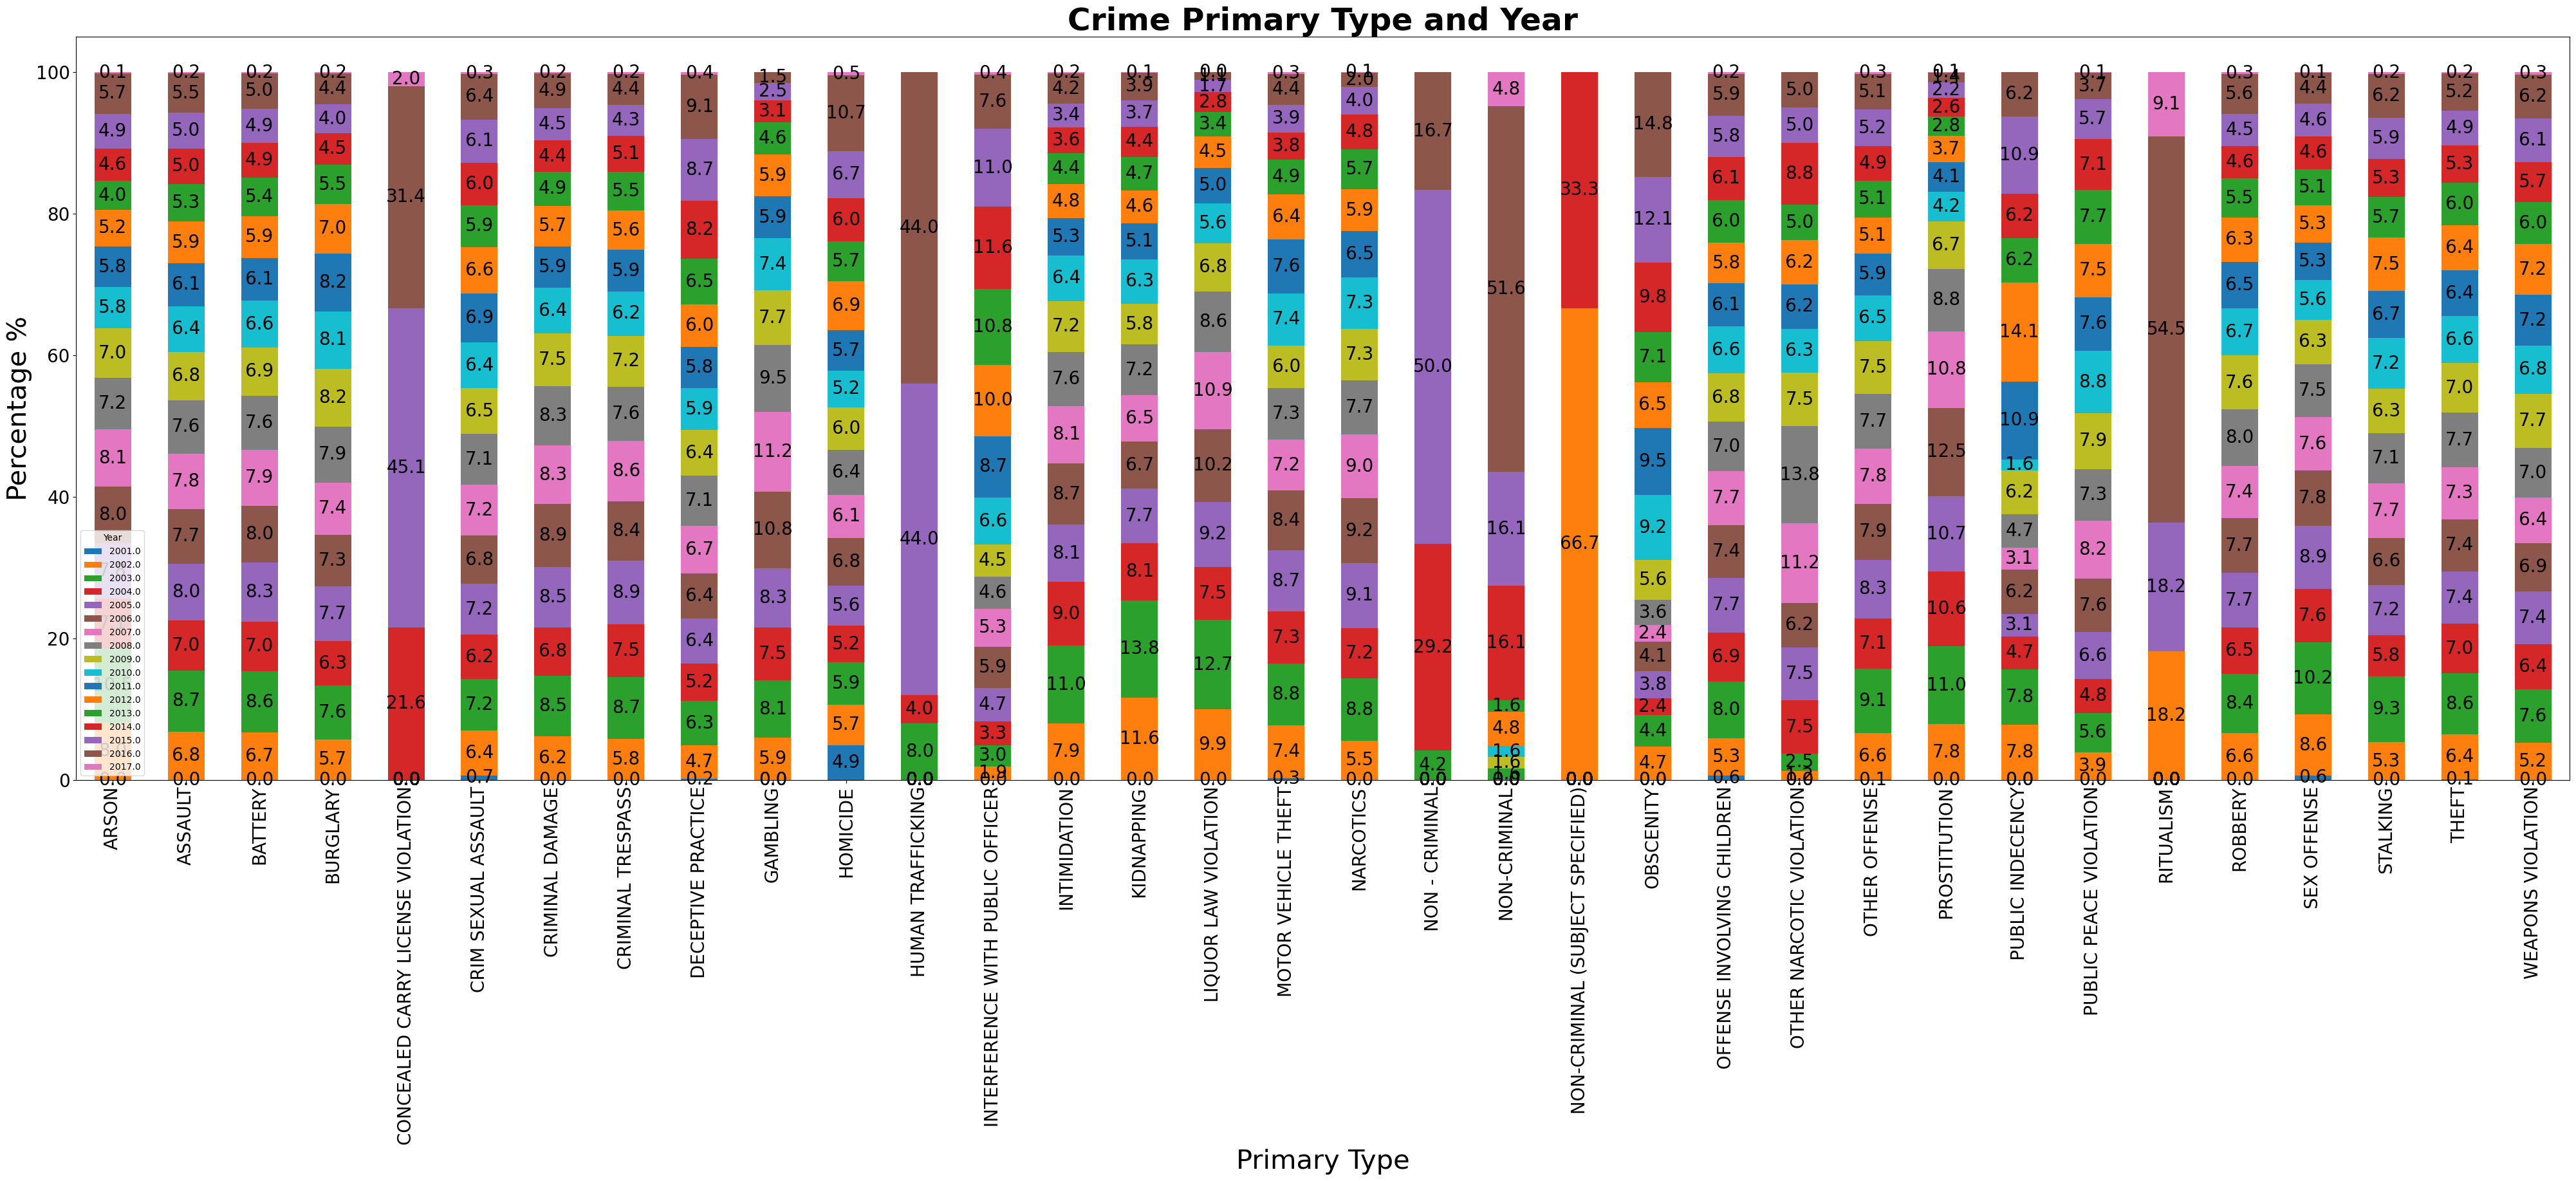

In [64]:
cross = pd.crosstab(filtered_df["Primary Type"], filtered_df["Year"], normalize = "index") * 100
bars = cross.plot(kind = "bar", figsize = (50, 15), stacked = True)

plt.title("Crime Primary Type and Year", fontsize = 35, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Primary Type", fontsize = 30)
plt.xticks(fontsize=20)  # Increase x-axis tick label size
plt.yticks(fontsize=20)  ;# Increase y-axis tick label size

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f', label_type='center', fontsize=20)

#### The graph above shows the crime type rate commited over the years.
#### we can note that Ritualism was recorded only. Also, non-criminal cases were only recorded on 2003

### The Arrest Distribution

In [65]:
df1.Arrest.value_counts()

Arrest
False    3995925
True     1560023
Name: count, dtype: int64

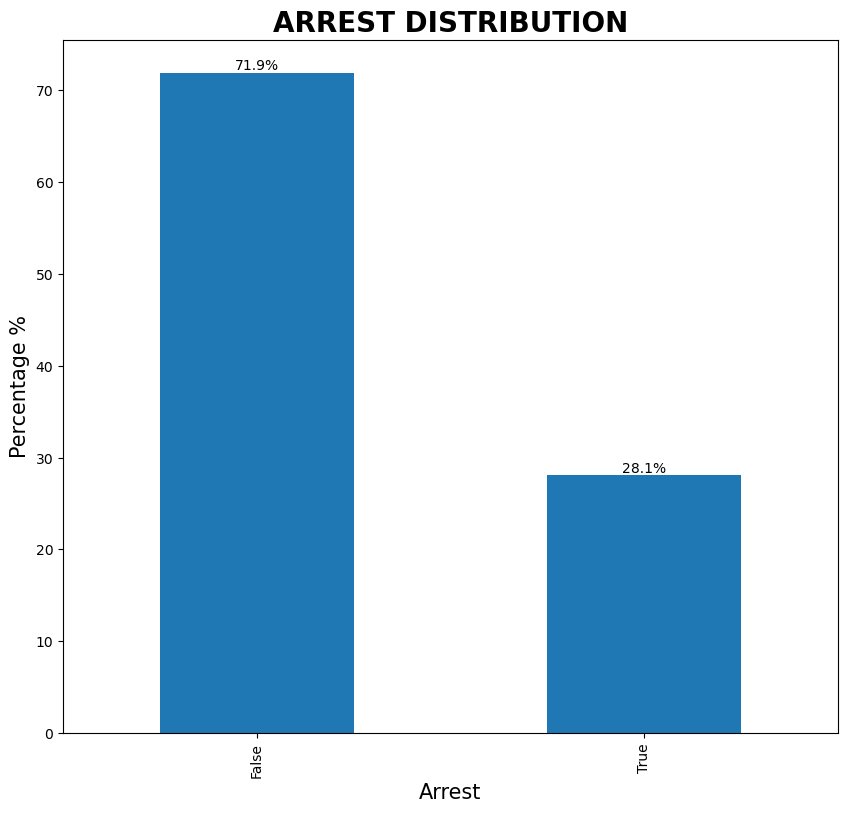

In [66]:
count = df1.Arrest.value_counts(normalize = True) * 100
bars = count.plot(kind = "bar", figsize = (10, 9))
plt.ylabel("Percentage %", fontsize = 15)
plt.xlabel("Arrest", fontsize = 15)
plt.title("ARREST DISTRIBUTION", fontsize = 20, fontweight = "bold")
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')

### Analyzing the rate of Arrest during the years 

In [67]:
cross = pd.crosstab(df1.Year, df1.Arrest)
cross

Arrest   False   True 
Year                  
2001.0    3331     728
2002.0  254906   98598
2003.0  333517  141398
2004.0  270464  116512
2005.0  312779  140886
2006.0  312663  135371
2007.0  305098  131821
2008.0  317025  109935
2009.0  281819  110734
2010.0  269709  100413
2011.0  255381   96160
2012.0  245156   90507
2013.0  220481   86219
2014.0  195468   79057
2015.0  193597   69396
2016.0  215076   50386
2017.0    9455    1902

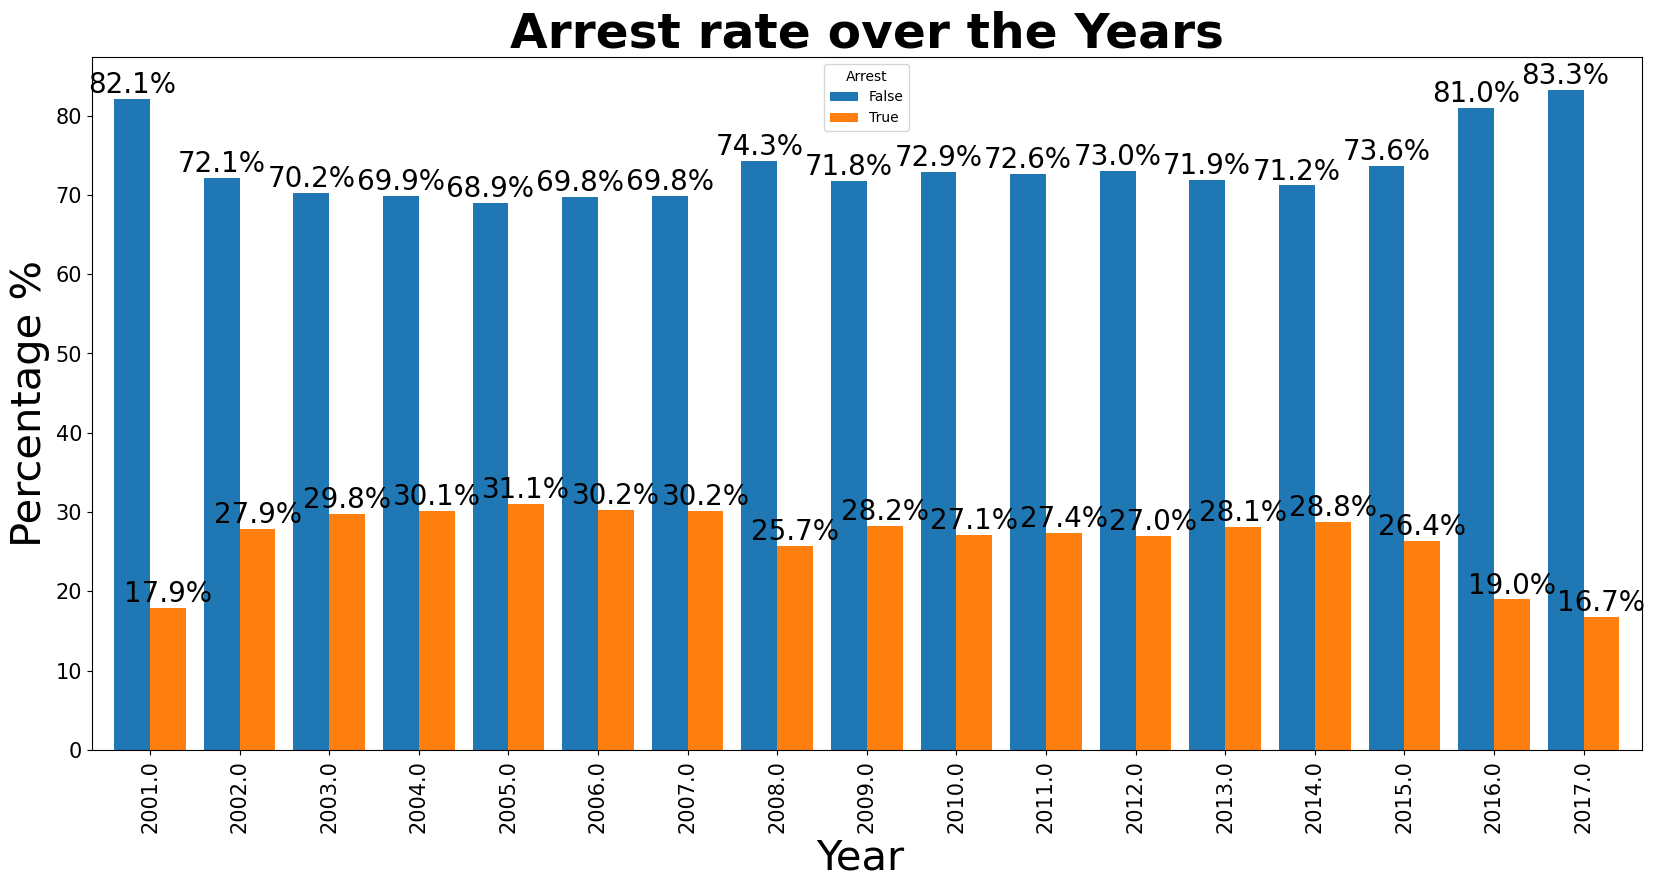

In [68]:
cross = pd.crosstab(df1.Year, df1.Arrest, normalize = "index") * 100
bars = cross.plot(kind = "bar", figsize = (20, 9), width = 0.8)

plt.title("Arrest rate over the Years", fontsize = 35, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Year ", fontsize = 30)
plt.xticks(fontsize=15)  # Increase x-axis tick label size
plt.yticks(fontsize=15)  ;# Increase y-axis tick label size

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=20)

#### Analyzing the Distrinct police that made most of the Arrest

In [69]:
pd.crosstab(df1.District, df1.Arrest)

Arrest     False   True 
District                
1.0       144888   64119
2.0       183913   70621
3.0       205197   79743
4.0       243737   75508
5.0       182324   65363
6.0       233212   88427
7.0       235591   98490
8.0       289759   94250
9.0       195773   82745
10.0      159023   77823
11.0      200254  156342
12.0      203093   67238
13.0           1       0
14.0      169782   47142
15.0      140605  105287
16.0      148558   35744
17.0      124418   36506
18.0      176090   59604
19.0      190501   55525
20.0       71563   23550
21.0           2       2
22.0      143403   40558
23.0           1       0
24.0      124789   40241
25.0      229386   95089
31.0          27      92

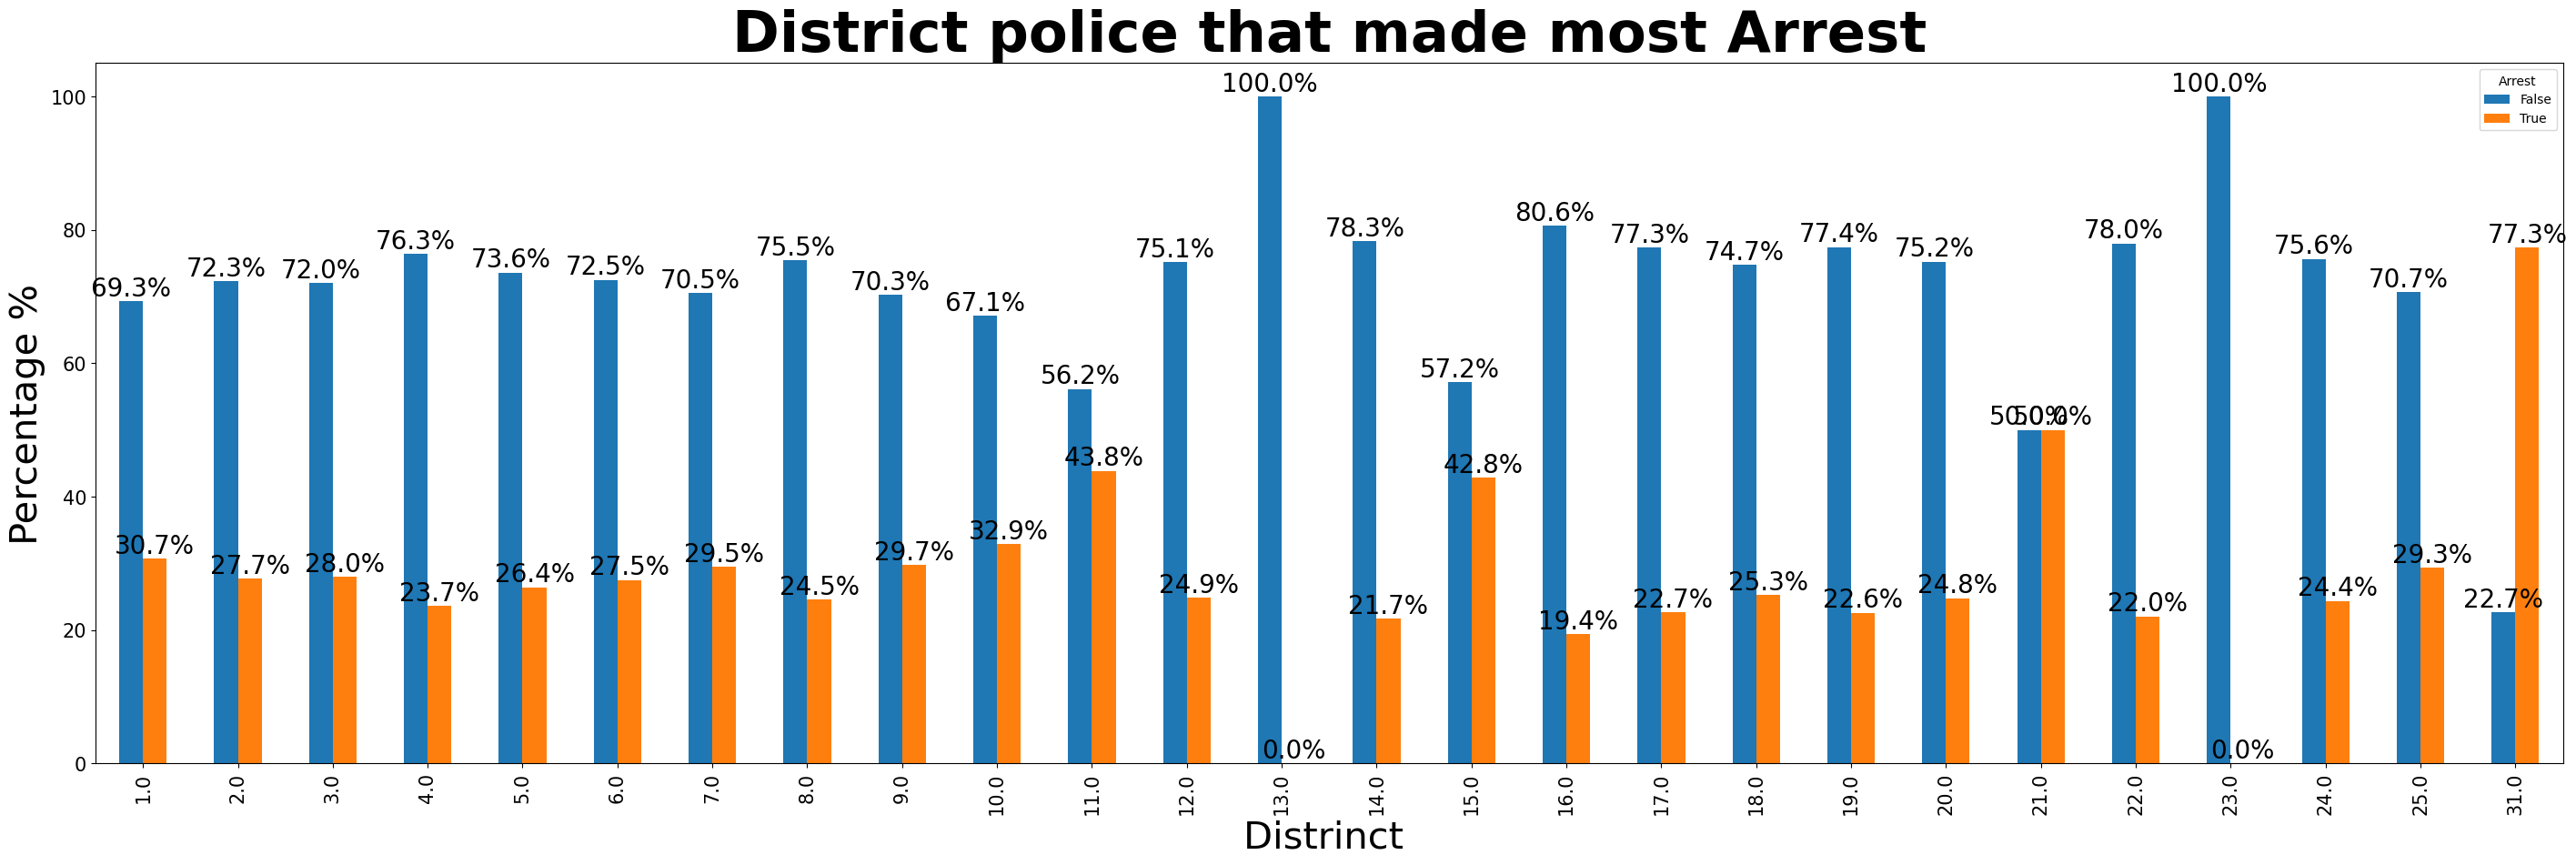

In [70]:
# cross = pd.crosstab(df1.District, df1.Arrest, normalize = "index").iloc[:, [1]]*100
cross = pd.crosstab(df1.District, df1.Arrest, normalize = "index")*100

bars = cross.plot(kind = "bar", figsize = (35, 10))

plt.title("District police that made most Arrest", fontsize = 45, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Distrinct ", fontsize = 30)
plt.xticks(fontsize=15)  # Increase x-axis tick label size
plt.yticks(fontsize=15)  ;# Increase y-axis tick label size

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=20)

### analyzing the ward where most arrest was made

In [71]:
cross = pd.crosstab(df1.Ward, df1.Arrest)
cross

Arrest   False   True 
Ward                  
1.0      84895   23054
2.0     144915   68630
3.0     108594   62988
4.0      76987   25199
5.0     100864   31828
6.0     131930   47334
7.0     110698   37471
8.0     116207   33225
9.0     102619   36643
10.0     72616   23233
11.0     59143   18104
12.0     48952   18875
13.0     56478   15360
14.0     56859   20141
15.0    110365   46589
16.0    107412   54325
17.0    133753   52148
18.0     75190   19113
19.0     41913    7847
20.0    127509   58036
21.0    121892   45530
22.0     45198   18724
23.0     56350   17105
24.0    128392   85845
25.0     56660   19176
26.0     69372   27710
27.0    126990   72833
28.0    139362  115501
29.0     87819   41853
30.0     57500   21730
31.0     58935   19905
32.0     80624   15241
33.0     42005   13572
34.0    115930   41926
35.0     58969   15909
36.0     47545   10590
37.0     93306   56834
38.0     47222   12787
39.0     41299   10700
40.0     45449   12054
41.0     46578   10747
42.0    156152   54225
43.0     60352    9260
44.0     59655   16024
45.0     44953   11388
46.0     49778   24935
47.0     47855   10020
48.0     40145   14894
49.0     55252   22902
50.0     46487    9960

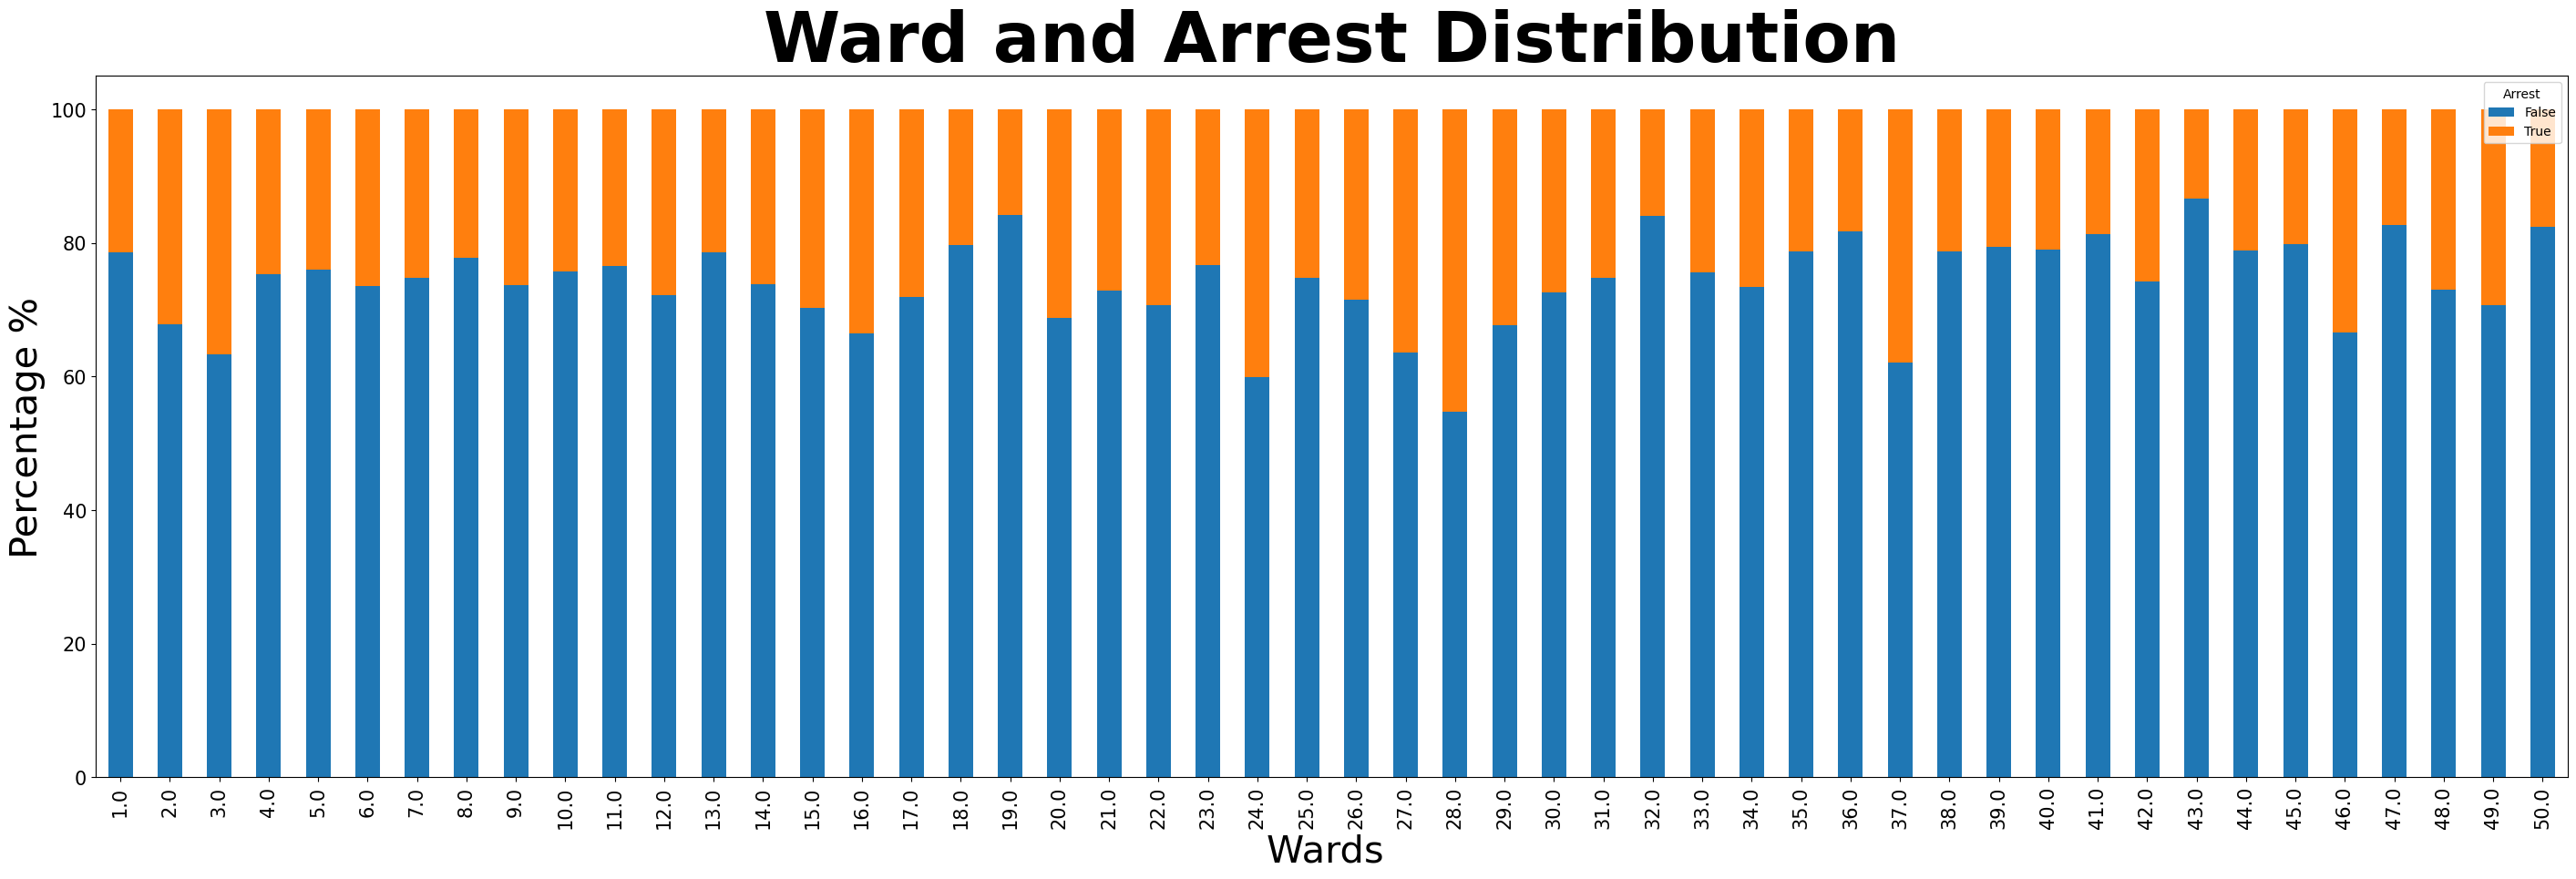

In [72]:
cross = pd.crosstab(df1.Ward, df1.Arrest, normalize = "index") * 100

bars = cross.plot(kind = "bar", figsize = (35, 10), stacked = True)

plt.title("Ward and Arrest Distribution", fontsize = 55, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Wards ", fontsize = 30)
plt.xticks(fontsize=15)  # Increase x-axis tick label size
plt.yticks(fontsize=15)  ;# Increase y-axis tick label size

# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f', label_type='center', fontsize=20)

#### Analyzing the police district that makes most arrests(ie Arrest == True) in different wards

In [73]:
selected_col = df1[[ 'Ward', 'District', 'Arrest']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
# filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

filtered_df = selected_col[selected_col['Arrest'] == True]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

Ward  District  Arrest
6         9.0       5.0    True
17       13.0       8.0    True
20       15.0       7.0    True
24       41.0      16.0    True
41       20.0       3.0    True
...       ...       ...     ...
7941273  10.0       4.0    True
7941274  18.0       8.0    True
7941277  28.0      10.0    True
7941278  17.0       7.0    True
7941281   6.0       3.0    True

[1560023 rows x 3 columns]

In [74]:
cross = pd.crosstab(filtered_df.Ward, filtered_df.District)
cross.iloc[:5]

District   1.0    2.0    3.0   4.0   5.0   6.0   7.0   8.0    9.0   10.0  ...  \
Ward                                                                      ...   
1.0           0      0      0     0     0     0     0     0      0     0  ...   
2.0       25624   1490      0     0     0     0     0     0      0     1  ...   
3.0       13950  34398      0     0     0     0  2766     0  11872     0  ...   
4.0         423  24774      0     0     0     0     0     0      1     0  ...   
5.0           0   2448  27600  1770     0     8     0     0      0     0  ...   

District  16.0  17.0  18.0  19.0  20.0  21.0  22.0  24.0  25.0  31.0  
Ward                                                                  
1.0          0     0     0  3011     0     0     0     0     0     1  
2.0          0     0     9     1     0     0     0     0     0     0  
3.0          0     0     0     0     0     2     0     0     0     0  
4.0          0     0     0     1     0     0     0     0     0     0  
5.0          0     0     0     0     0     0     0     0     0     2  

[5 rows x 24 columns]

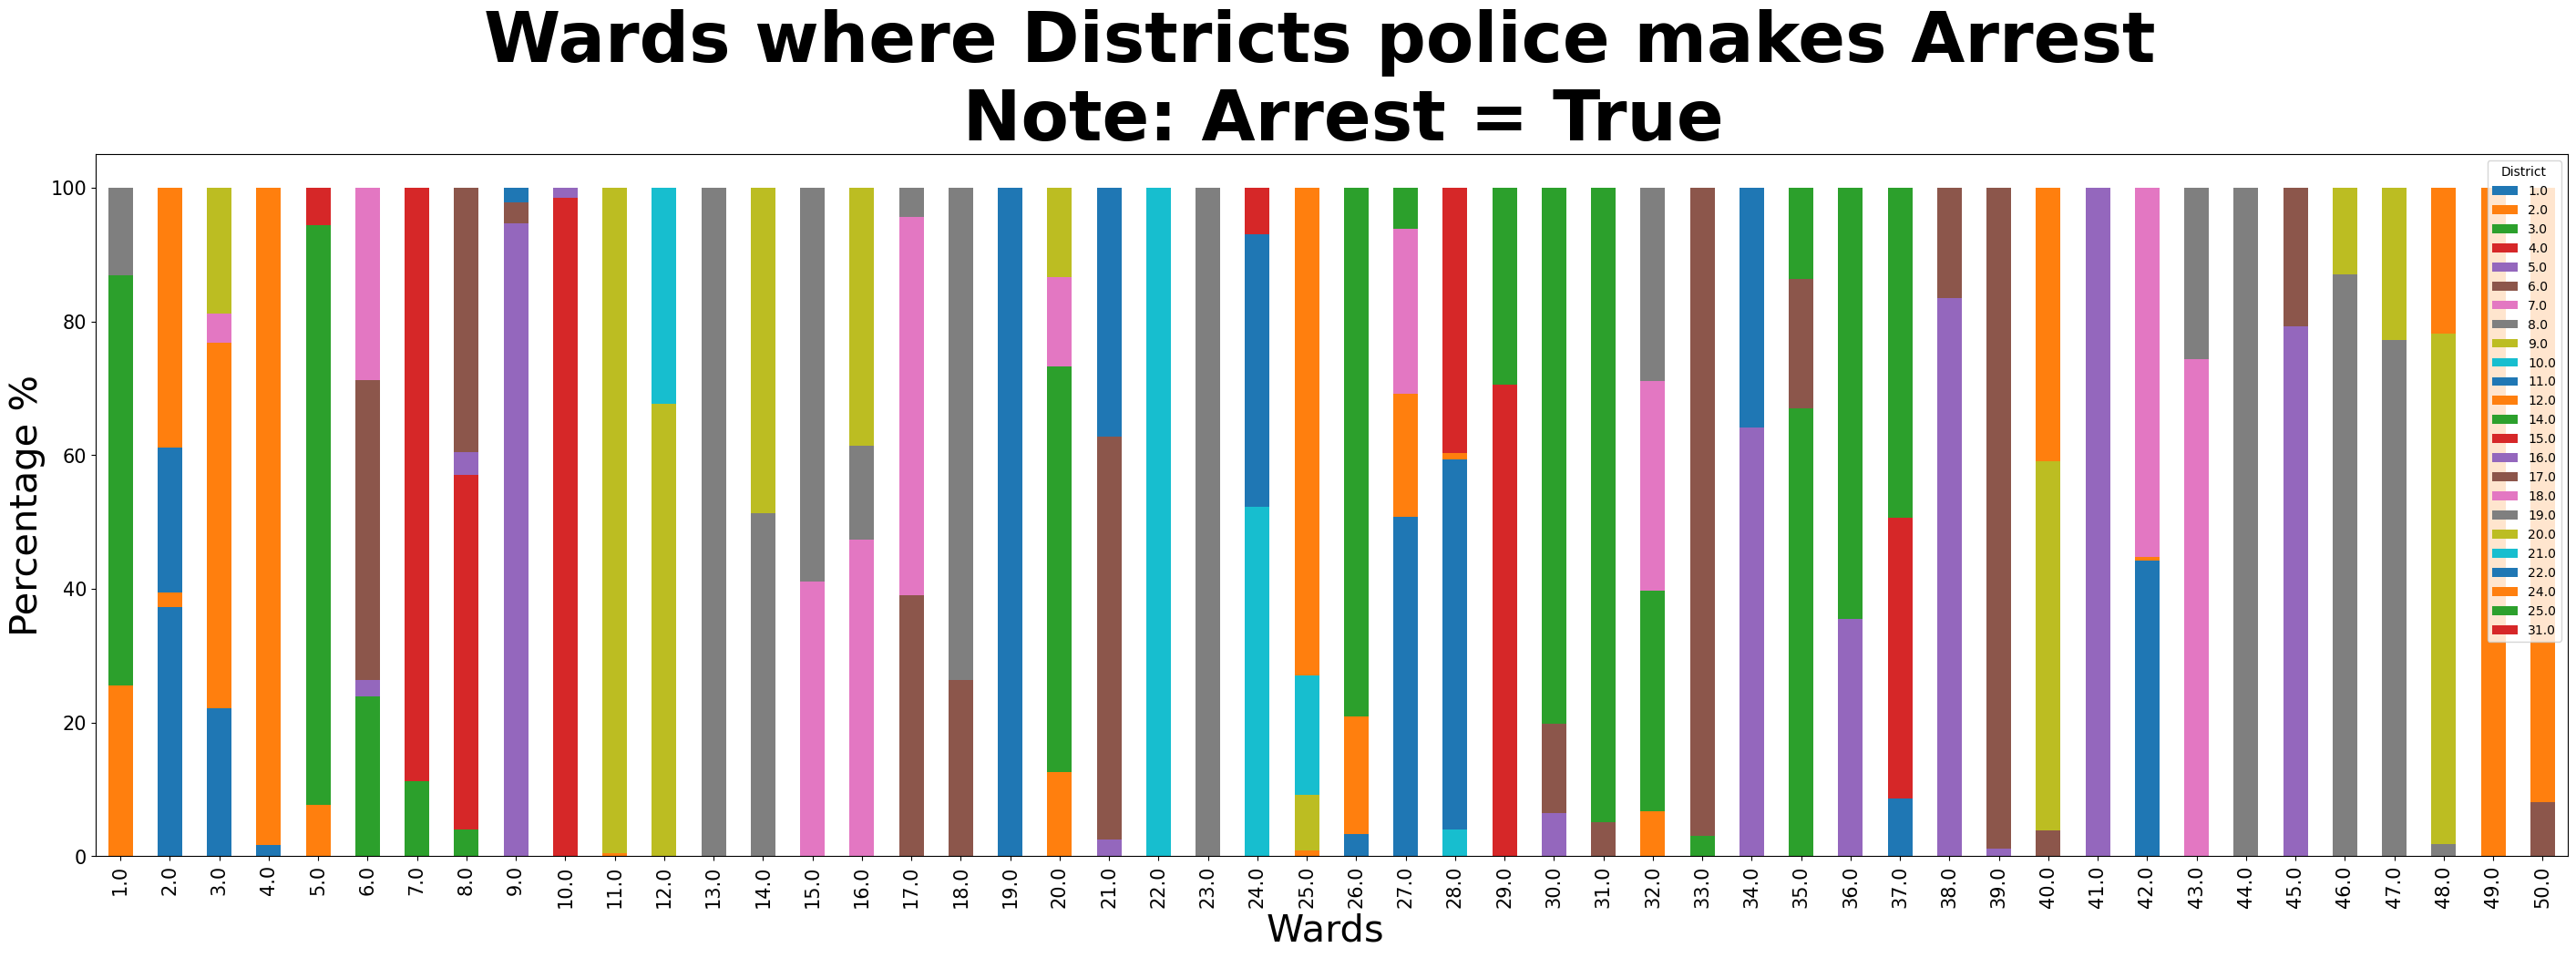

In [75]:
cross = pd.crosstab(filtered_df.Ward, filtered_df.District, normalize = "index") *100


bars = cross.plot(kind = "bar", figsize = (35, 10), stacked = True)

plt.title("Wards where Districts police makes Arrest \n Note: Arrest = True", fontsize = 55, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Wards ", fontsize = 30)
plt.xticks(fontsize=15)  # Increase x-axis tick label size
plt.yticks(fontsize=15)  ;# Increase y-axis tick label size

# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f', label_type='center', fontsize=20)

#### Analyzing the Wards where the district police do not make Arrest (Arrest == False)

In [76]:
selected_col = df1[[ 'Ward', 'District', 'Arrest']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
# filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]

filtered_df = selected_col[selected_col['Arrest'] == False]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df

Ward  District  Arrest
0         7.0       4.0   False
1        11.0       9.0   False
2        35.0      14.0   False
3        31.0      25.0   False
4        34.0      22.0   False
...       ...       ...     ...
7941272  23.0       8.0   False
7941275  21.0       6.0   False
7941276  21.0      22.0   False
7941279  15.0       8.0   False
7941280   7.0       4.0   False

[3995925 rows x 3 columns]

In [77]:
cross = pd.crosstab(filtered_df.Ward, filtered_df.District)
cross.iloc[:5]

District   1.0    2.0    3.0   4.0   5.0   6.0   7.0   8.0    9.0   10.0  ...  \
Ward                                                                      ...   
1.0           0      0      0     0     0     0     0     0      0     3  ...   
2.0       67663   3750      0     0     0     0     0     0      1     1  ...   
3.0       11807  70697      0     0     0     2  5429     0  20654     0  ...   
4.0        2417  74560      1     0     0     0     0     1      5     0  ...   
5.0           0  14965  81010  4839     0    46     2     2      0     0  ...   

District  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0  25.0  31.0  
Ward                                                                  
1.0          1     1  3389     0     0     0     0     0     0     0  
2.0          0     8     1     0     0     0     0     0     0     0  
3.0          0     0     0     0     2     0     0     0     0     0  
4.0          0     0     3     0     0     0     0     0     0     0  
5.0          0     0     0     0     0     0     0     0     0     0  

[5 rows x 26 columns]

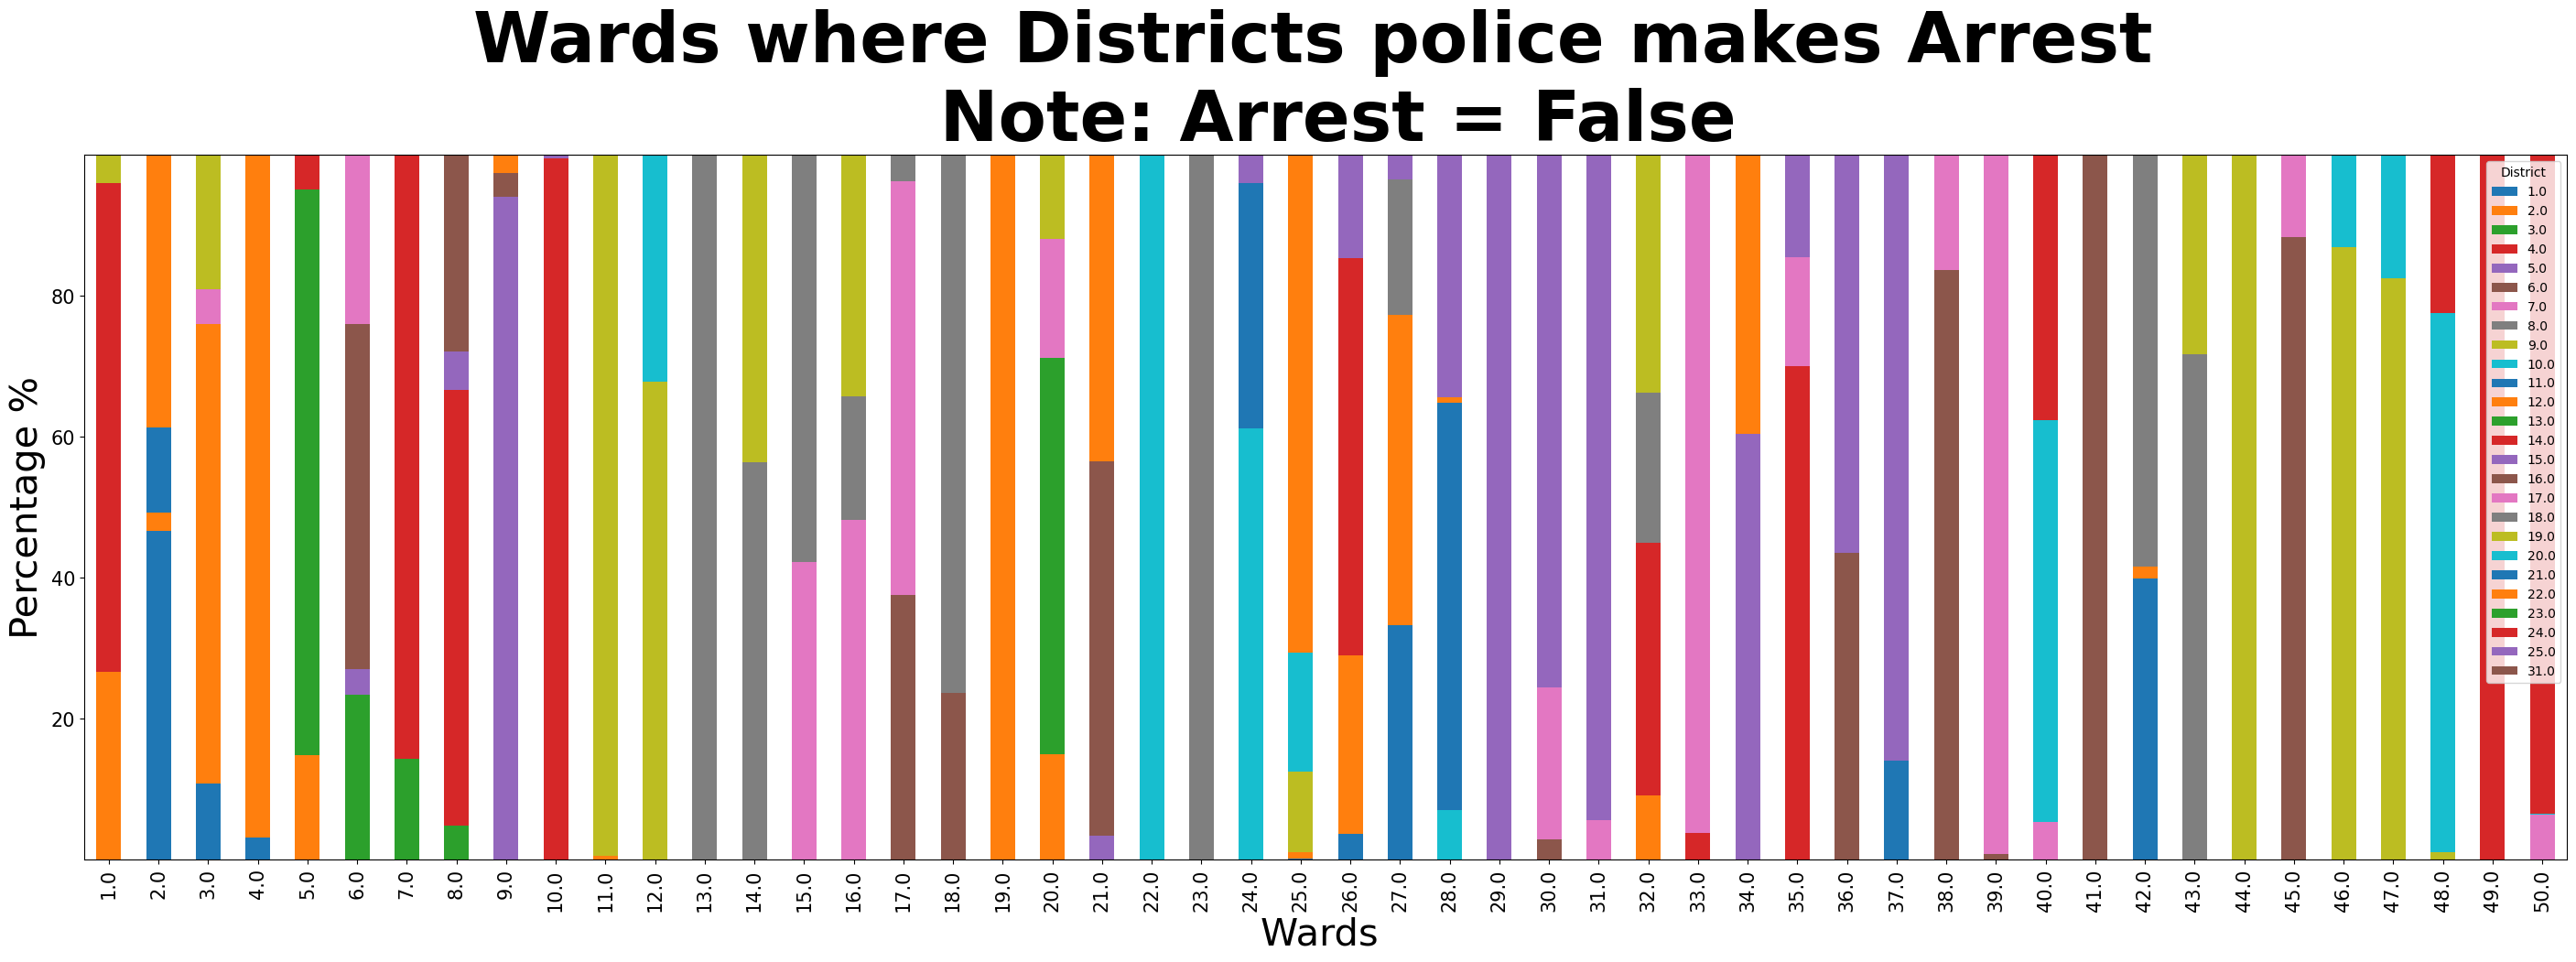

In [78]:
cross = pd.crosstab(filtered_df.Ward, filtered_df.District, normalize = "index") *100


bars = cross.plot(kind = "bar", figsize = (35, 10), stacked = True)

plt.title("Wards where Districts police makes Arrest \n Note: Arrest = False", fontsize = 55, fontweight = "bold") 
plt.ylabel("Percentage %" , fontsize = 30)
plt.xlabel("Wards ", fontsize = 30)
plt.xticks(fontsize=15)  # Increase x-axis tick label size
plt.yticks(fontsize=15)  ;# Increase y-axis tick label size

# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f', label_type='center', fontsize=20)

## Bias

Ward
2.0     3.843538
3.0     3.088258
6.0     3.226524
17.0    3.345982
19.0    0.895617
20.0    3.339574
21.0    3.013383
24.0    3.855994
27.0    3.596560
28.0    4.587210
39.0    0.935916
42.0    3.786519
48.0    0.990632
Name: proportion, dtype: float64


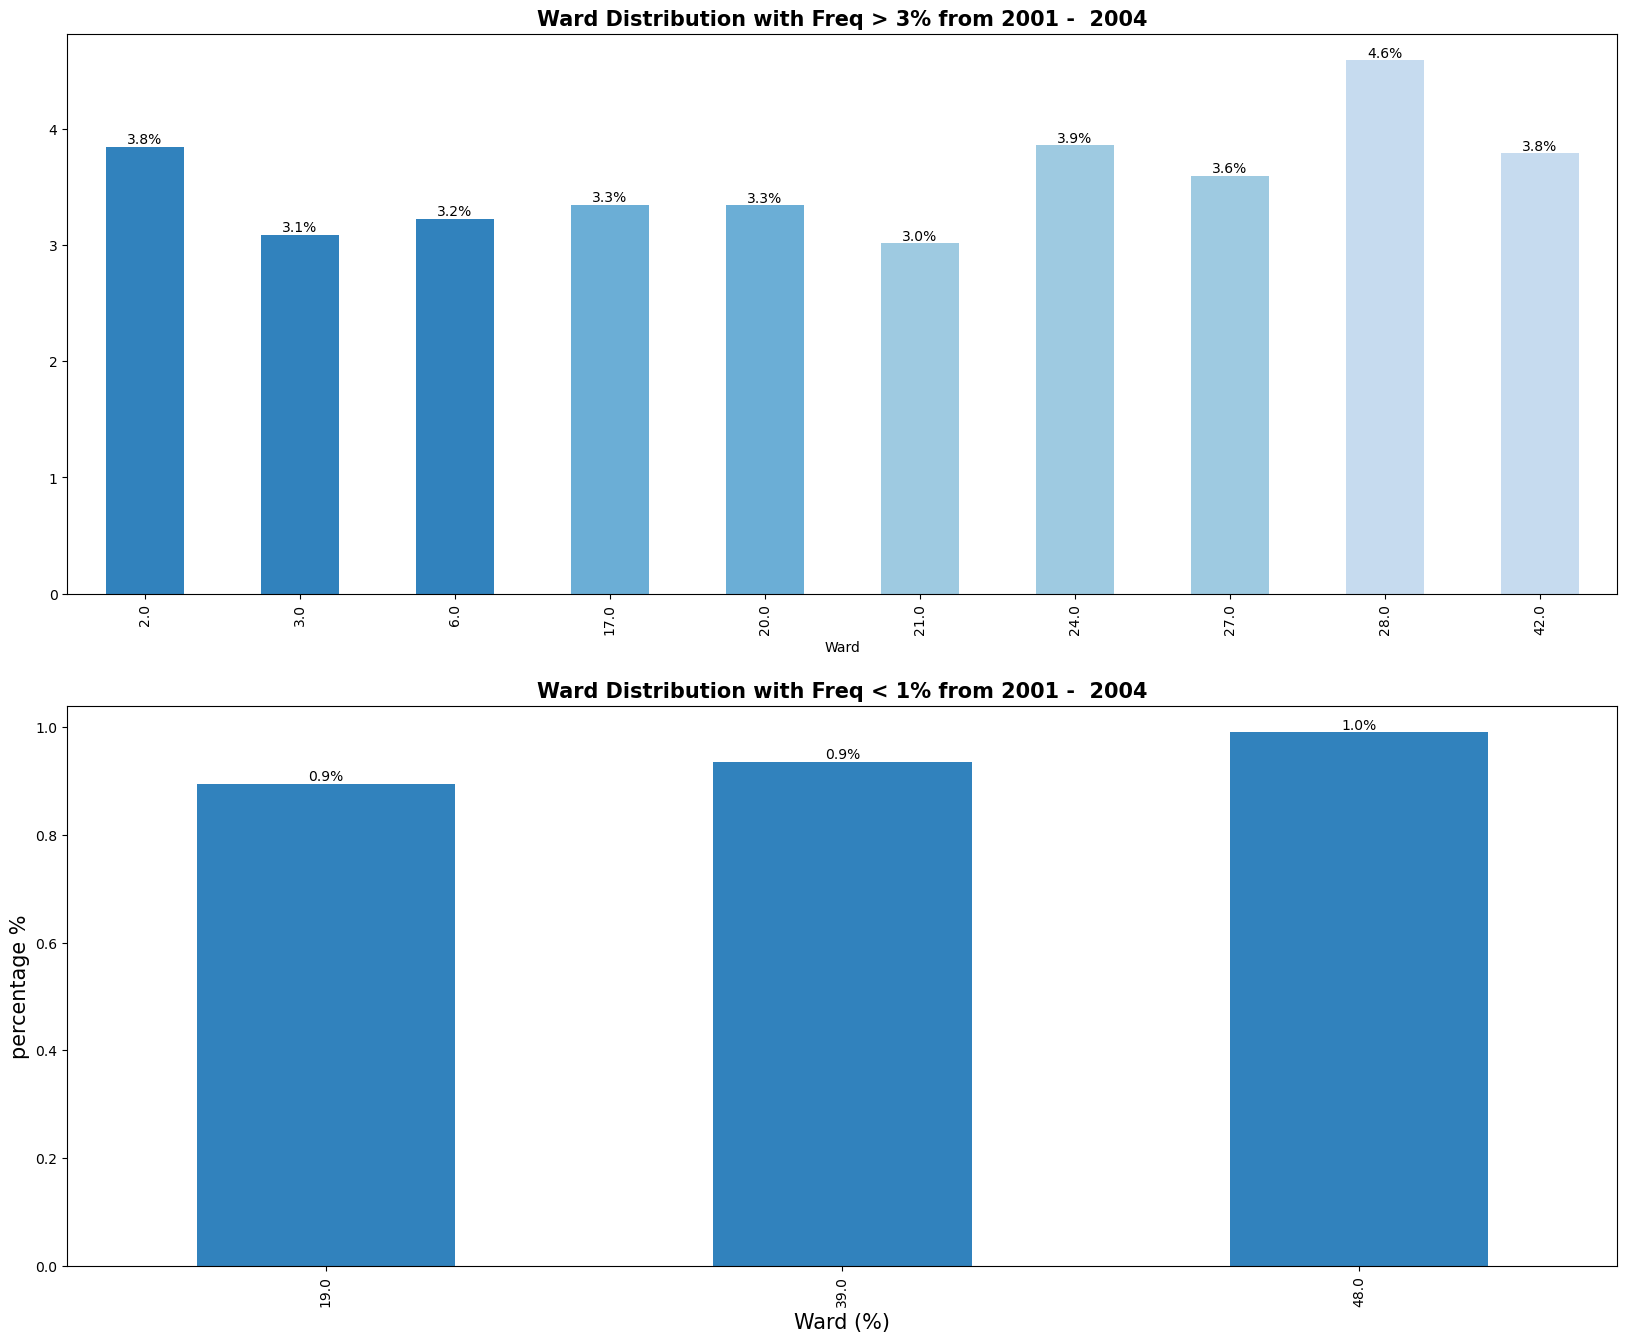

In [94]:
# from the ward distribution, we see that some wards have higher percentage of crime scenes while some have little percentage of crime scene
# Analysing wards that have frequencies from 3% upwards and 1% downwards

count = df1.Ward.value_counts(normalize=True) * 100
# Filter values greater than 1.5 and less than 1.0 using bitwise operators
count = count[(count > 3) | (count < 1)]  # Or another upper limit if you meant something else
count1 = count[(count > 3)]
count2 = count[(count < 1)]
count = count.sort_index()
count1 = count1.sort_index()
count2 = count2.sort_index()



# selecting colors for the graph respectively
cmap = plt.get_cmap('tab20c')
categories = df1.Ward.unique()
colors = cmap(np.linspace(0, 1, len(categories)))


# Create a figure and two subplots side by side
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16))

# bars = count.plot(kind = "bar", color = colors, figsize = (25, 9))
bars1 = count1.plot(kind = "bar", color = colors, ax = ax1)

bars2 = count2.plot(kind = "bar", color = colors, ax = ax2)

# plt.legend(bars.containers[0],["2003", "2004", "2002", "2001"]) 
for container in bars1.containers:
    bars1.bar_label(container, fmt='%.1f%%', label_type='edge')

for container in bars2.containers:
    bars2.bar_label(container, fmt='%.1f%%', label_type='edge')

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')

ax2.set_title("Ward Distribution with Freq < 1% from 2001 -  2004", fontweight = "bold", fontsize = 15)
ax1.set_title("Ward Distribution with Freq > 3% from 2001 -  2004", fontweight = "bold", fontsize = 15)

plt.xlabel("Ward (%)", fontsize = 15)
plt.ylabel("percentage %", fontsize = 15);



# Show the filtered value counts
print(count)


In [81]:
count = df1.Ward.value_counts(normalize=True) * 100
# Filter values greater than 1.5 and less than 1.0 using bitwise operators
count = count[(count > 3) | (count < 1)]  # Or another upper limit if you meant something else
count = count.sort_index()

count1 = count[(count > 3)]
count2 = count[(count < 1)]
count1 = count1.sort_index()
count2 = count2.sort_index()

print(count)

# putting the wards into a list so that the analysis will be filtered using the listed wards
filt_wards = count.index
filt_wards1 = count1.index
filt_wards2 = count2.index


print (filt_wards)

print ("higher frequency",filt_wards1)
print ("lower freq", filt_wards2)



Ward
2.0     3.843538
3.0     3.088258
6.0     3.226524
17.0    3.345982
19.0    0.895617
20.0    3.339574
21.0    3.013383
24.0    3.855994
27.0    3.596560
28.0    4.587210
39.0    0.935916
42.0    3.786519
48.0    0.990632
Name: proportion, dtype: float64
Index([2.0, 3.0, 6.0, 17.0, 19.0, 20.0, 21.0, 24.0, 27.0, 28.0, 39.0, 42.0,
       48.0],
      dtype='float64', name='Ward')
higher frequency Index([2.0, 3.0, 6.0, 17.0, 20.0, 21.0, 24.0, 27.0, 28.0, 42.0], dtype='float64', name='Ward')
lower freq Index([19.0, 39.0, 48.0], dtype='float64', name='Ward')


In [82]:
selected_col = df1[[ 'Ward', 'Location Description', 'District', 'Arrest', 'Year', 'Primary Type']]

# filtered_df = selected_col[selected_col['Location Description'] == ["OTHER", "ALLEY"]]
filtered_df = selected_col[selected_col['Location Description'].isin(des_index)]
filtered_df = selected_col[selected_col['Ward'].isin(filt_wards)]


filtered_df1 = selected_col[selected_col['Location Description'].isin(des_index)]
filtered_df1 = selected_col[selected_col['Ward'].isin(filt_wards1)]

filtered_df2 = selected_col[selected_col['Location Description'].isin(des_index)]
filtered_df2 = selected_col[selected_col['Ward'].isin(filt_wards2)]
# filtered_df = selected_col[selected_col['is_recid'] == 1]


# s = filtered_df[filtered_df["decile_score"] == 1
filtered_df.iloc[:5]

Ward     Location Description  District  Arrest    Year   Primary Type
5   24.0                APARTMENT      10.0   False  2004.0          THEFT
7   21.0  RESIDENCE PORCH/HALLWAY      22.0   False  2003.0  OTHER OFFENSE
8   42.0                RESIDENCE      18.0   False  2004.0          THEFT
9   24.0                RESIDENCE      11.0   False  2003.0          THEFT
10  21.0                RESIDENCE      22.0   False  2003.0          THEFT

In [83]:
filtered_df1.iloc[:2]

Ward     Location Description  District  Arrest    Year   Primary Type
5  24.0                APARTMENT      10.0   False  2004.0          THEFT
7  21.0  RESIDENCE PORCH/HALLWAY      22.0   False  2003.0  OTHER OFFENSE

In [84]:
filtered_df2.iloc[:2]

Ward Location Description  District  Arrest    Year        Primary Type
11  48.0            RESIDENCE      20.0   False  2004.0               THEFT
62  48.0                 BANK      19.0   False  2003.0  DECEPTIVE PRACTICE

In [85]:
# crosstabing the filtered wards with the districts 
pd.crosstab(filtered_df.Ward, filtered_df.District).iloc[:5]

District   1.0     2.0    3.0   4.0   5.0    6.0     7.0   8.0    9.0   10.0  \
Ward                                                                           
2.0       93287    5240      0     0     0      0       0     0      1     2   
3.0       25757  105095      0     0     0      2    8195     0  32526     0   
6.0           0       3  42253     3  5911  85863   45220     0      0     0   
17.0          0       0     10     2     0  70590  108131  7164      0     0   
19.0          0       0      0     6     0      0       0     0      0     0   

District  ...  16.0  17.0  18.0  19.0  20.0  21.0   22.0  24.0  25.0  31.0  
Ward      ...                                                               
2.0       ...     0     0    17     2     0     0      0     0     0     0  
3.0       ...     0     0     0     0     0     4      0     0     0     0  
6.0       ...     0     0     0     0     0     0      1     0     0     6  
17.0      ...     0     0     0     0     0     0      0     0     0     1  
19.0      ...     0     0     0     0     0     0  49733     0     1    20  

[5 rows x 24 columns]

Text(0, 0.5, 'Percentage %')

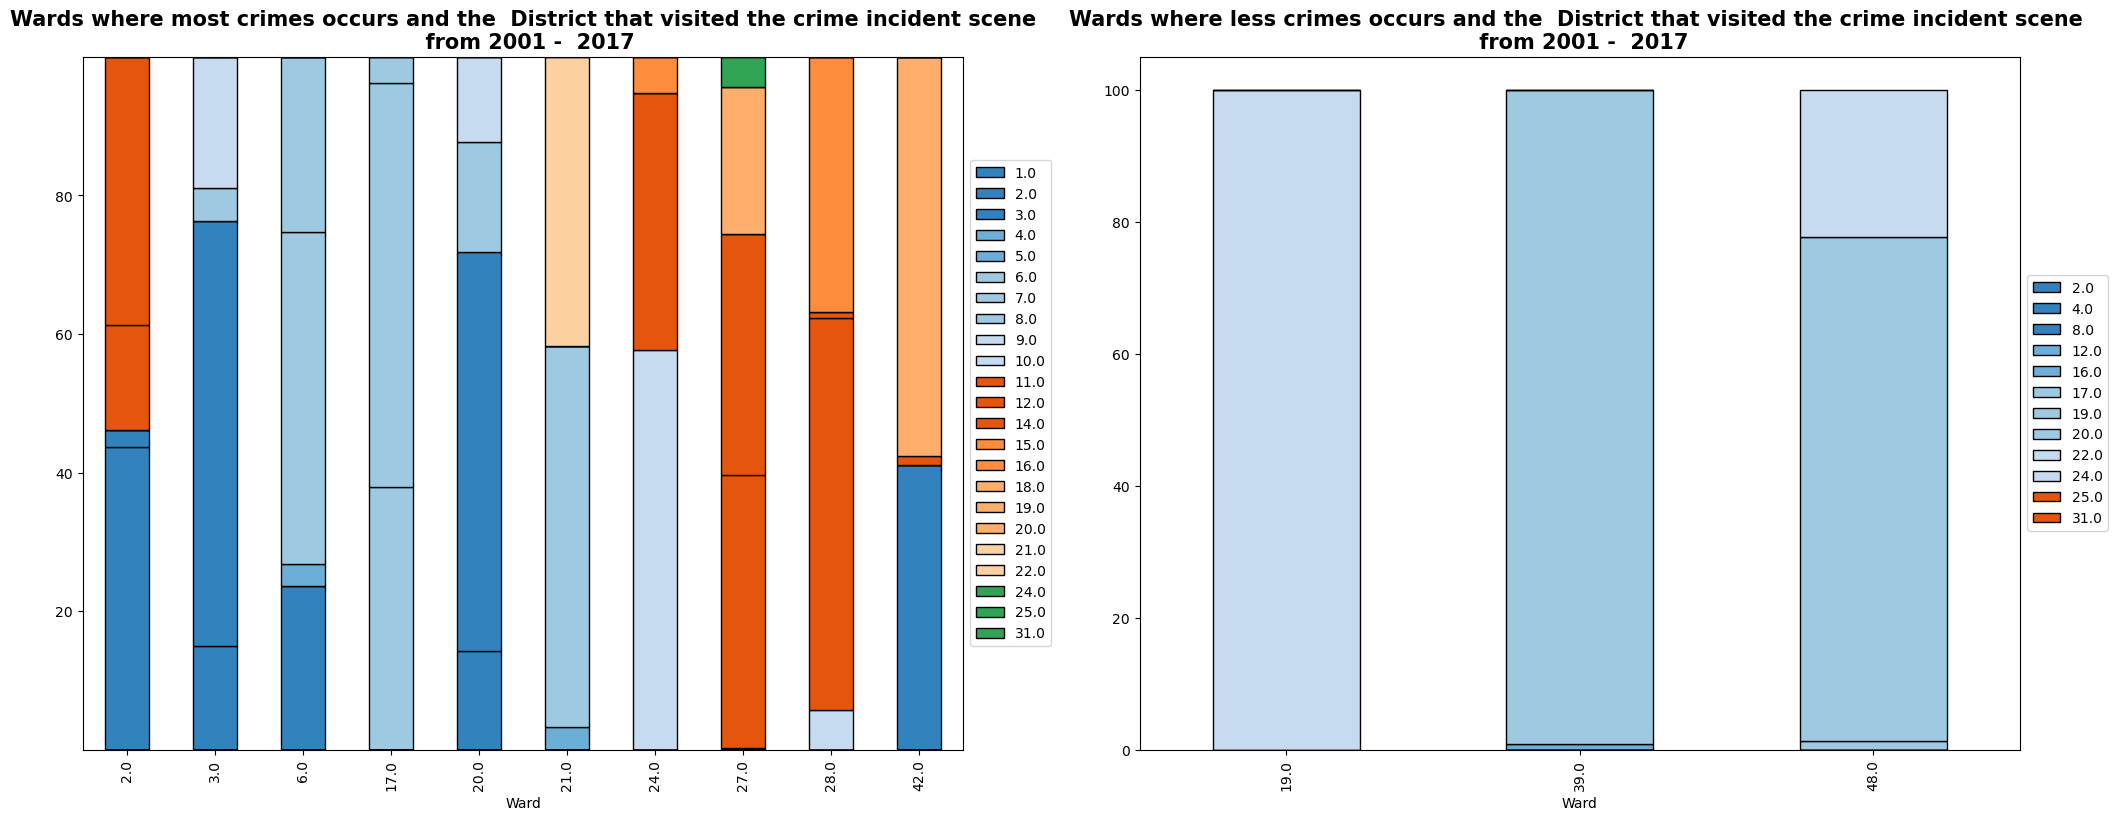

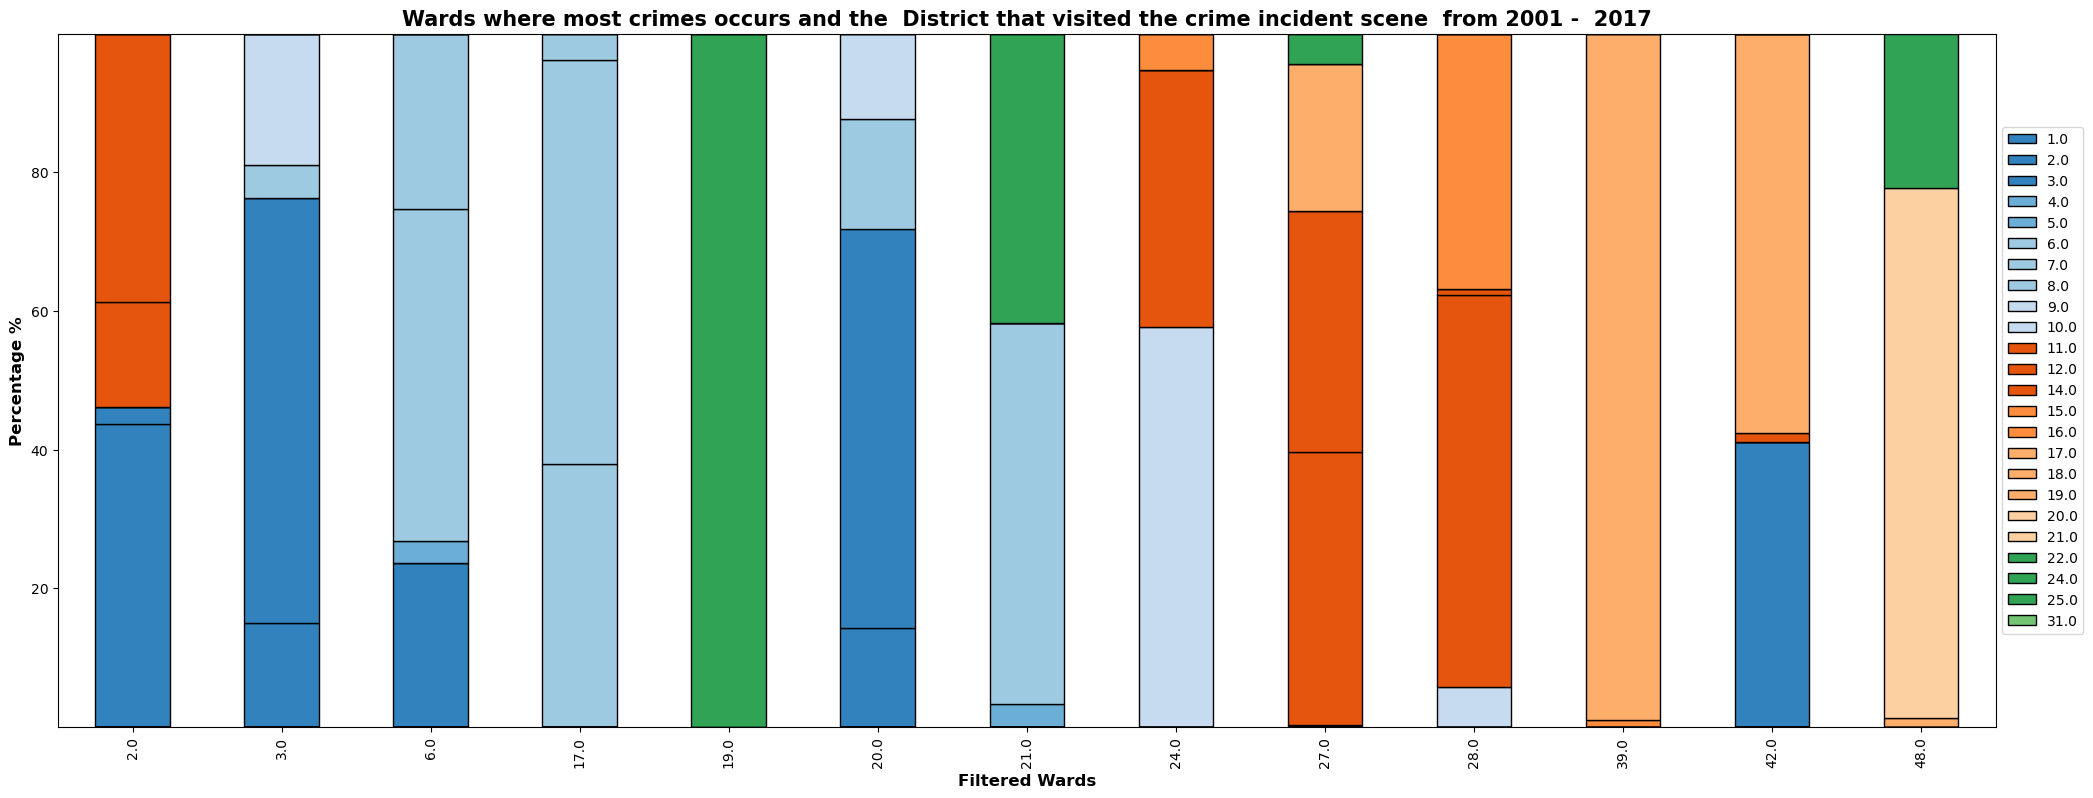

In [104]:
cross = pd.crosstab(filtered_df.Ward, filtered_df.District, normalize = "index") * 100
cross1 = pd.crosstab(filtered_df1.Ward, filtered_df1.District, normalize = "index") * 100
cross2 = pd.crosstab(filtered_df2.Ward, filtered_df2.District, normalize = "index") * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 9))

bars = cross.plot(kind = "bar", color = colors, figsize = (25, 9) , stacked = True, edgecolor = "black")
bars1 = cross1.plot(kind = "bar", color = colors, figsize = (25, 9) , stacked = True, ax = ax1, edgecolor = "black")
bars2 = cross2.plot(kind = "bar", color = colors, figsize = (25, 9) , stacked = True, ax = ax2, edgecolor = "black")

# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f%%', label_type='center')

# for container in bars1.containers:
#     bars1.bar_label(container, fmt='%.1f%%', label_type='center')

# for container in bars2.containers:
#     bars2.bar_label(container, fmt='%.1f%%', label_type='center')

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    
plt.title("Wards where most crimes occurs and the  District that visited the crime incident scene  from 2001 -  2017", fontweight = "bold", fontsize = 15)
ax1.set_title("Wards where most crimes occurs and the  District that visited the crime incident scene\n  from 2001 -  2017", fontweight = "bold", fontsize = 15)
ax2.set_title("Wards where less crimes occurs and the  District that visited the crime incident scene \n from 2001 -  2017", fontweight = "bold", fontsize = 15)

plt.xlabel("Filtered Wards", fontsize = 12, fontweight = "bold")
plt.ylabel("Percentage %", fontsize = 12, fontweight = "bold")


In [102]:
np.isinf(cross2).sum()

Arrest
False    0
True     0
dtype: int64

#### Analysing those filtered wards with the Arrest made in those wards

Arrest      False      True 
Ward                        
2.0     67.861575  32.138425
3.0     63.289856  36.710144
6.0     73.595368  26.404632
17.0    71.948510  28.051490
19.0    84.230305  15.769695


Text(0, 0.5, 'Percentage %')

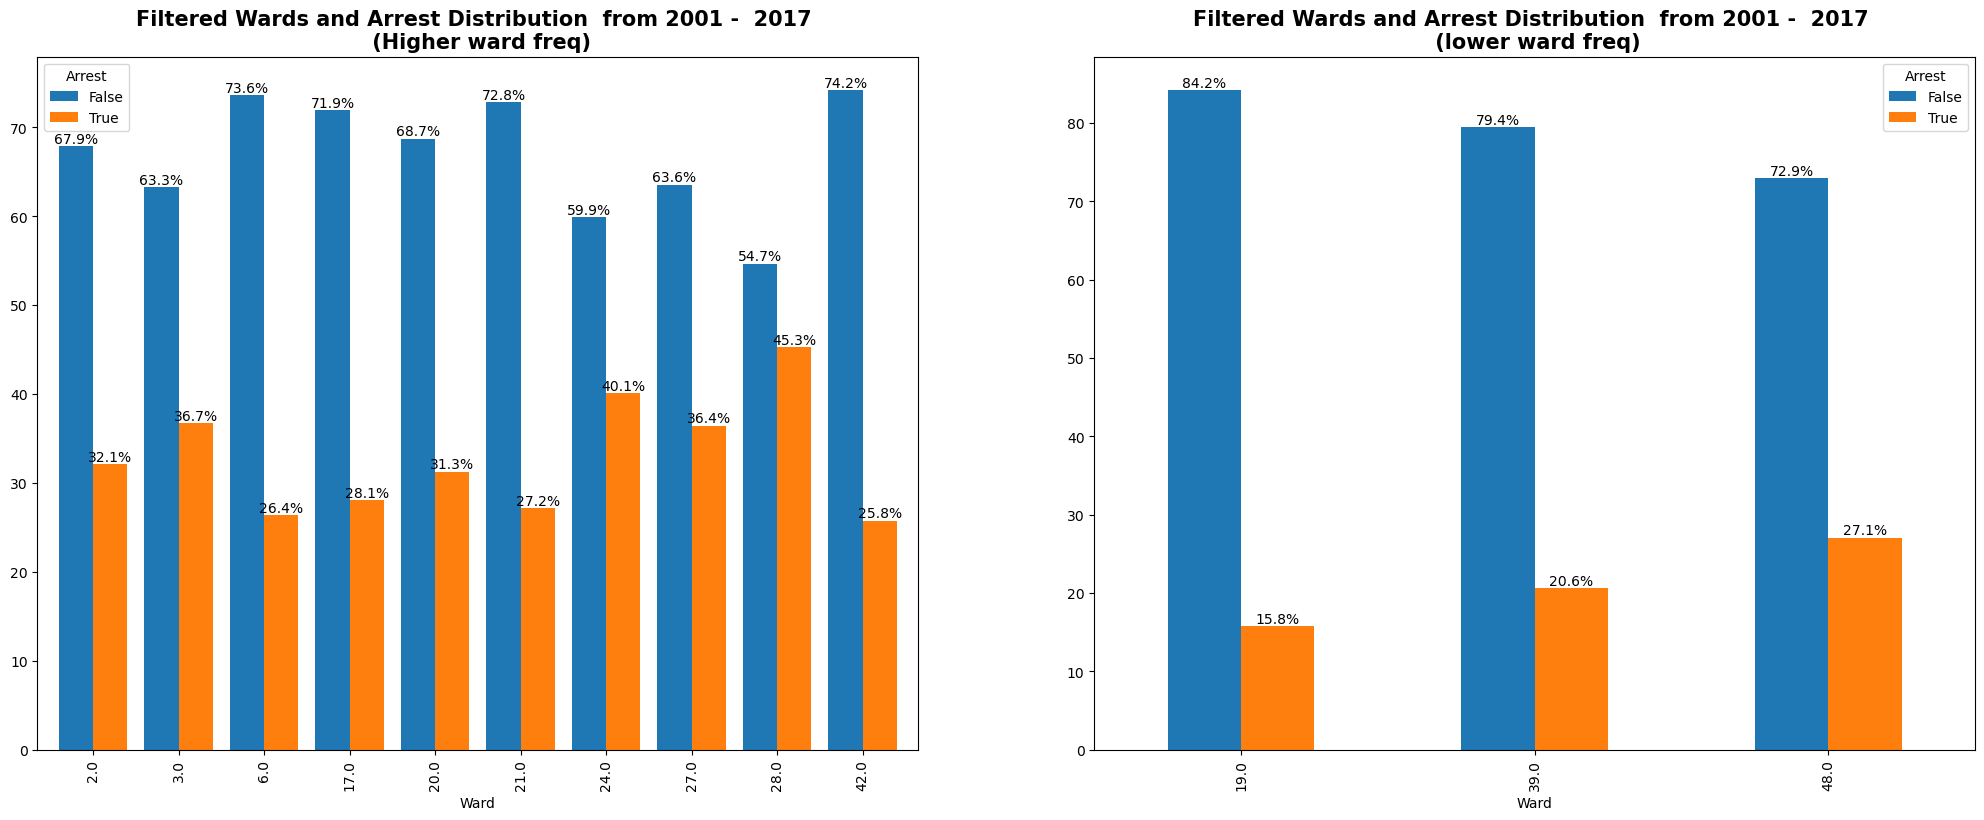

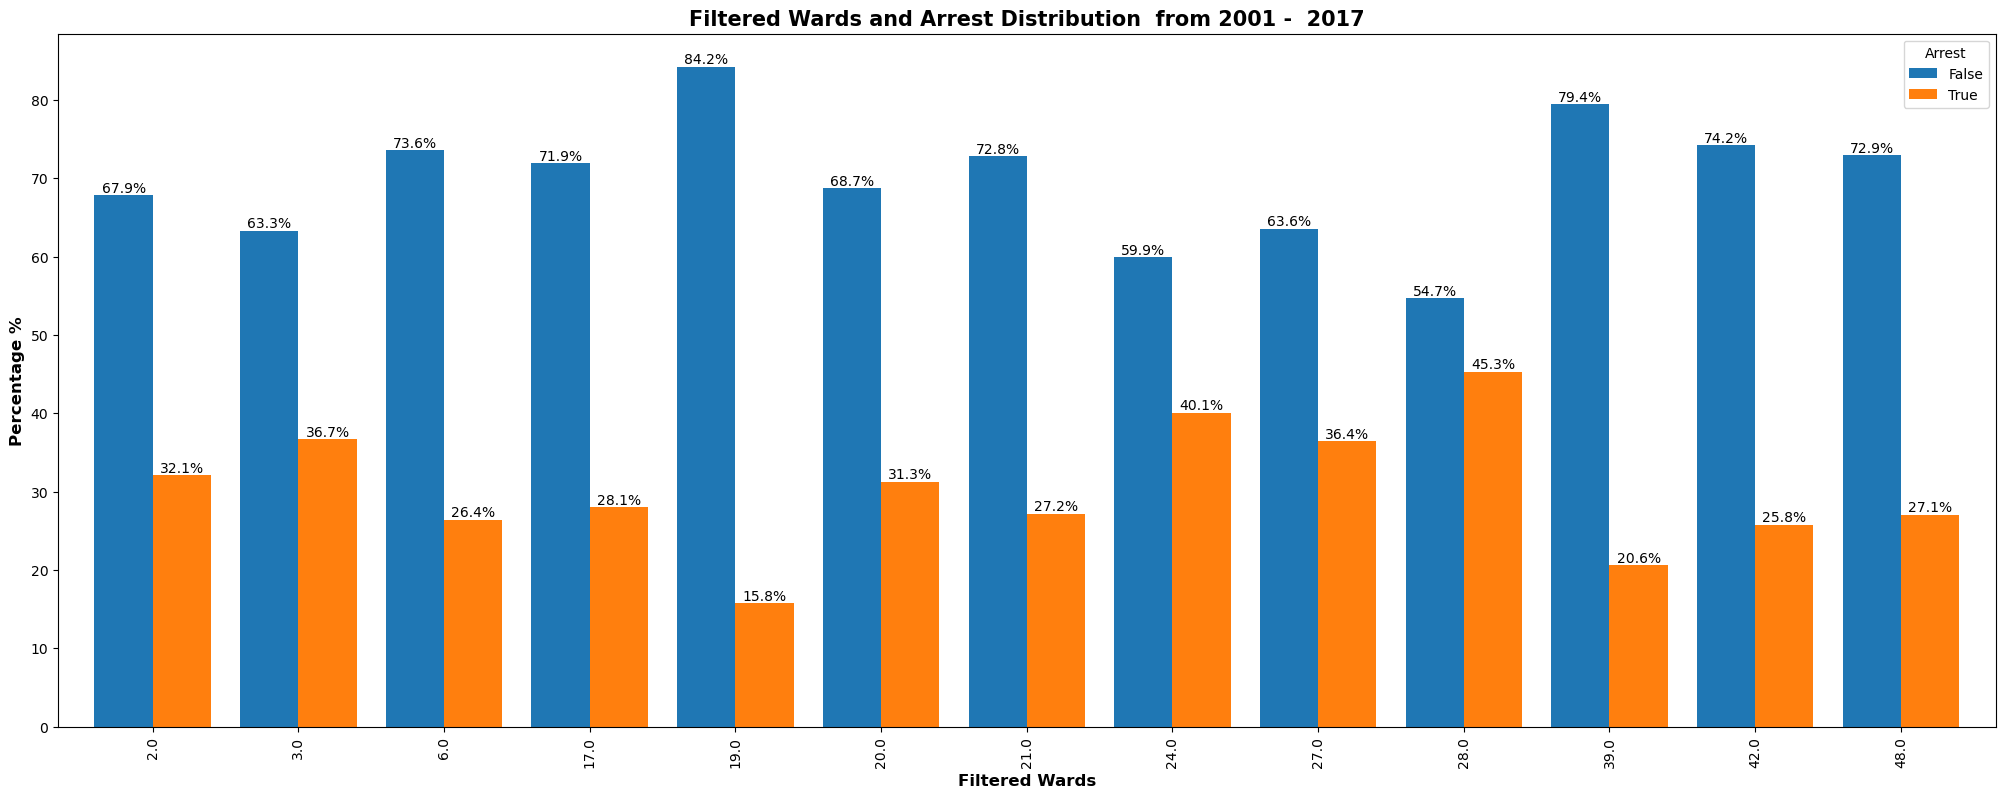

In [92]:
cross = pd.crosstab(filtered_df.Ward, filtered_df.Arrest, normalize = "index")* 100
print(cross.iloc[:5])

cross1 = pd.crosstab(filtered_df1.Ward, filtered_df1.Arrest, normalize = "index") * 100
cross2 = pd.crosstab(filtered_df2.Ward, filtered_df2.Arrest, normalize = "index") * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 9))
bars1 = cross1.plot(kind = "bar",  figsize = (25, 9) ,width = 0.8, ax = ax1)
bars2 = cross2.plot(kind = "bar",  figsize = (25, 9) , ax = ax2)
bars = cross.plot(kind = "bar",  figsize = (25, 9), width = 0.8)



for container in bars1.containers:
    bars1.bar_label(container, fmt='%.1f%%', label_type='edge')

for container in bars2.containers:
    bars2.bar_label(container, fmt='%.1f%%', label_type='edge')

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')
plt.title("Filtered Wards and Arrest Distribution  from 2001 -  2017", fontweight = "bold", fontsize = 15)
ax1.set_title("Filtered Wards and Arrest Distribution  from 2001 -  2017 \n (Higher ward freq)", fontweight = "bold", fontsize = 15)
ax2.set_title("Filtered Wards and Arrest Distribution  from 2001 -  2017 \n (lower ward freq)", fontweight = "bold", fontsize = 15)

plt.xlabel("Filtered Wards", fontsize = 12, fontweight = "bold")
plt.ylabel("Percentage %", fontsize = 12, fontweight = "bold")


### Analysisng the selected Wards and the years to see how frequent the police visited there over the years 2001 - 2004

Year    2001.0    2002.0     2003.0    2004.0    2005.0    2006.0    2007.0  \
Ward                                                                          
2.0   0.061345  6.696013   9.393805  7.394694  8.285373  7.917769  7.611042   
3.0   0.065275  7.985686  10.775023  8.032311  9.426980  9.024257  7.492045   
6.0   0.058015  5.559956   7.790744  6.778271  8.081377  7.994913  8.134372   
17.0  0.071543  5.825143   7.833739  6.627183  8.044066  7.880001  8.311413   
19.0  0.076367  7.043810   8.752010  6.927251  8.428457  7.682878  7.729100   

Year    2008.0    2009.0    2010.0    2011.0    2012.0    2013.0    2014.0  \
Ward                                                                         
2.0   7.398909  6.388349  6.264253  5.934112  5.774895  5.334239  5.078555   
3.0   7.690201  6.316513  5.600821  5.425394  5.014512  4.849576  4.228882   
6.0   8.042329  7.184934  6.877566  6.458631  6.389459  5.836085  4.882743   
17.0  8.111307  7.234496  6.868172  6.577695  6.129069  

Text(0, 0.5, 'Percentage %')

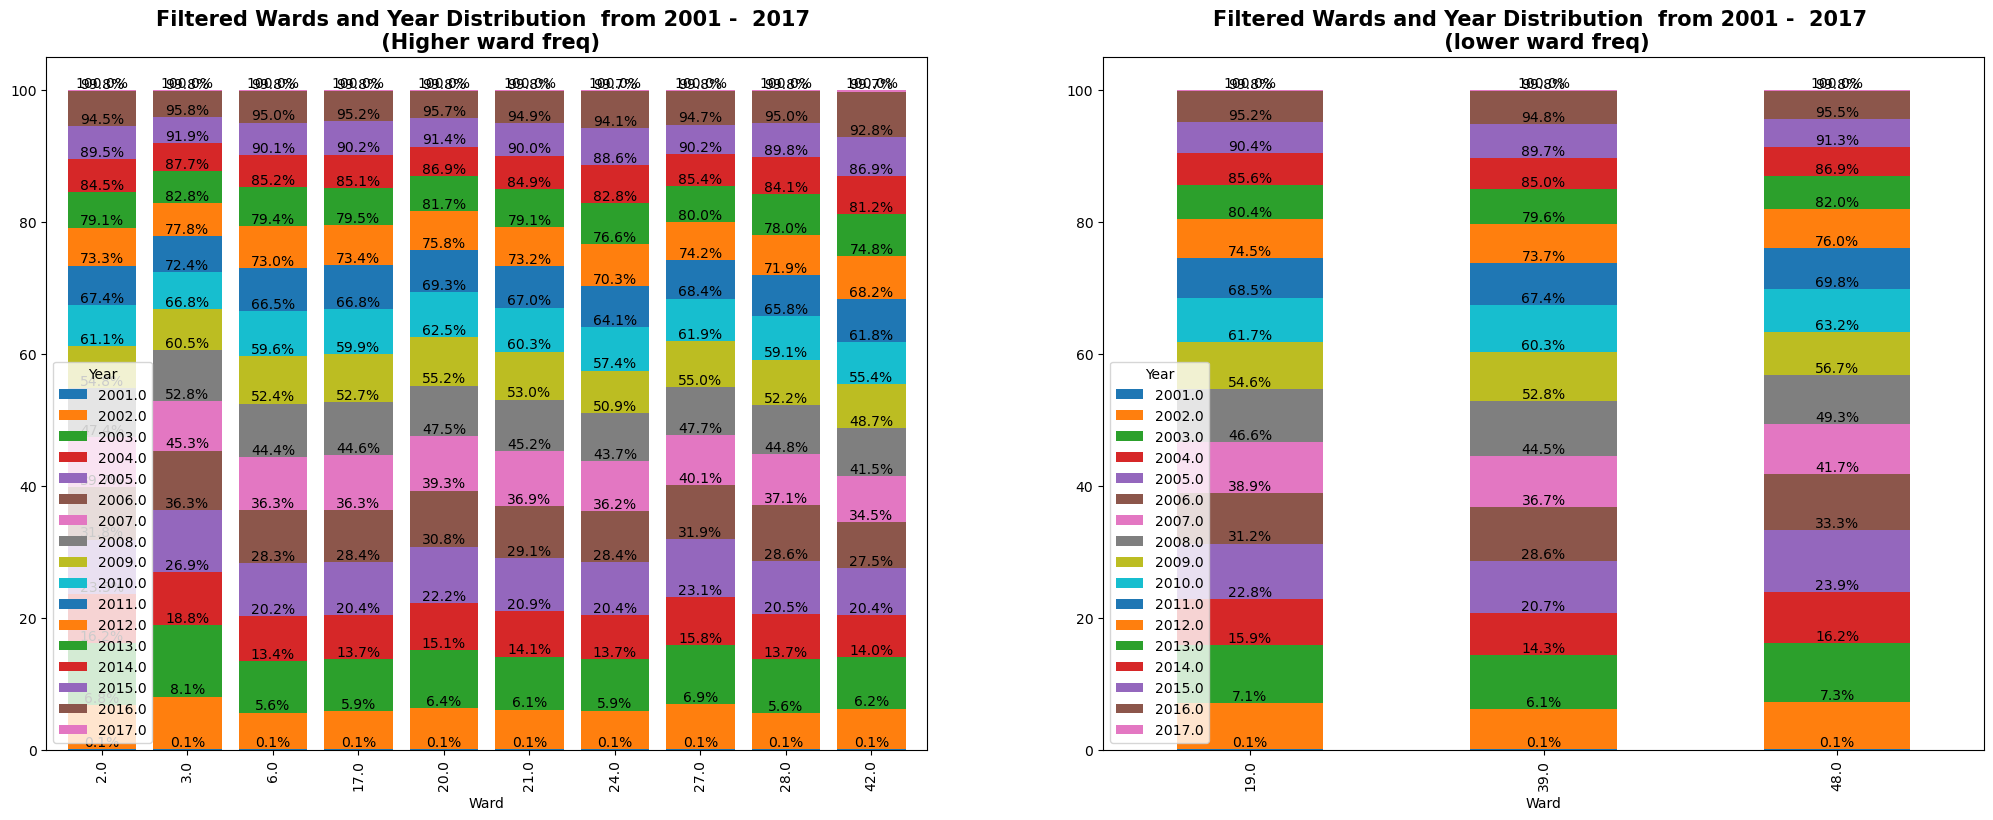

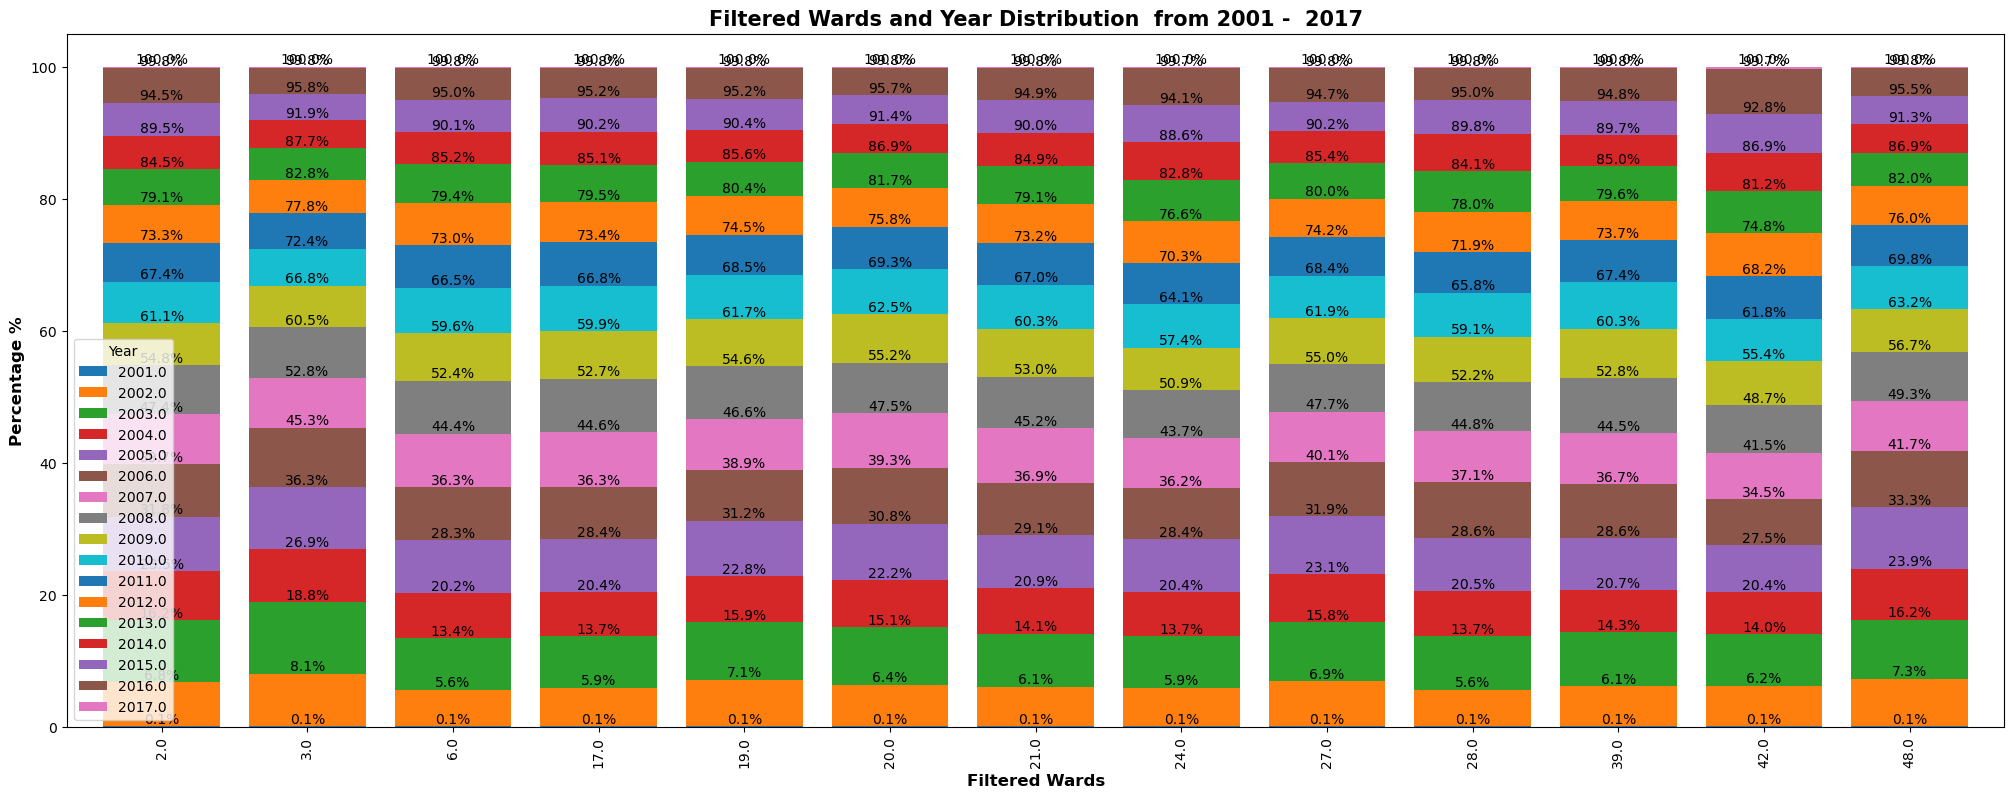

In [105]:
cross = pd.crosstab(filtered_df.Ward, filtered_df.Year, normalize = "index")* 100
print(cross.iloc[:5])

cross1 = pd.crosstab(filtered_df1.Ward, filtered_df1.Year, normalize = "index") * 100
cross2 = pd.crosstab(filtered_df2.Ward, filtered_df2.Year, normalize = "index") * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 9))
bars1 = cross1.plot(kind = "bar", stacked = True,  figsize = (25, 9) ,width = 0.8, ax = ax1)
bars2 = cross2.plot(kind = "bar", stacked = True,  figsize = (25, 9) , ax = ax2)
bars = cross.plot(kind = "bar", stacked = True, figsize = (25, 9), width = 0.8)



for container in bars1.containers:
    bars1.bar_label(container, fmt='%.1f%%', label_type='edge')

for container in bars2.containers:
    bars2.bar_label(container, fmt='%.1f%%', label_type='edge')

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')
plt.title("Filtered Wards and Year Distribution  from 2001 -  2017", fontweight = "bold", fontsize = 15)
ax1.set_title("Filtered Wards and Year Distribution  from 2001 -  2017 \n (Higher ward freq)", fontweight = "bold", fontsize = 15)
ax2.set_title("Filtered Wards and Year Distribution  from 2001 -  2017 \n (lower ward freq)", fontweight = "bold", fontsize = 15)

plt.xlabel("Filtered Wards", fontsize = 12, fontweight = "bold")
plt.ylabel("Percentage %", fontsize = 12, fontweight = "bold")


### Analysis the filtered wards and primary crime type

### Since we have dataframe that contains the wards with higher and lower freq crime scene, Analysing the crime primary type and Arrest

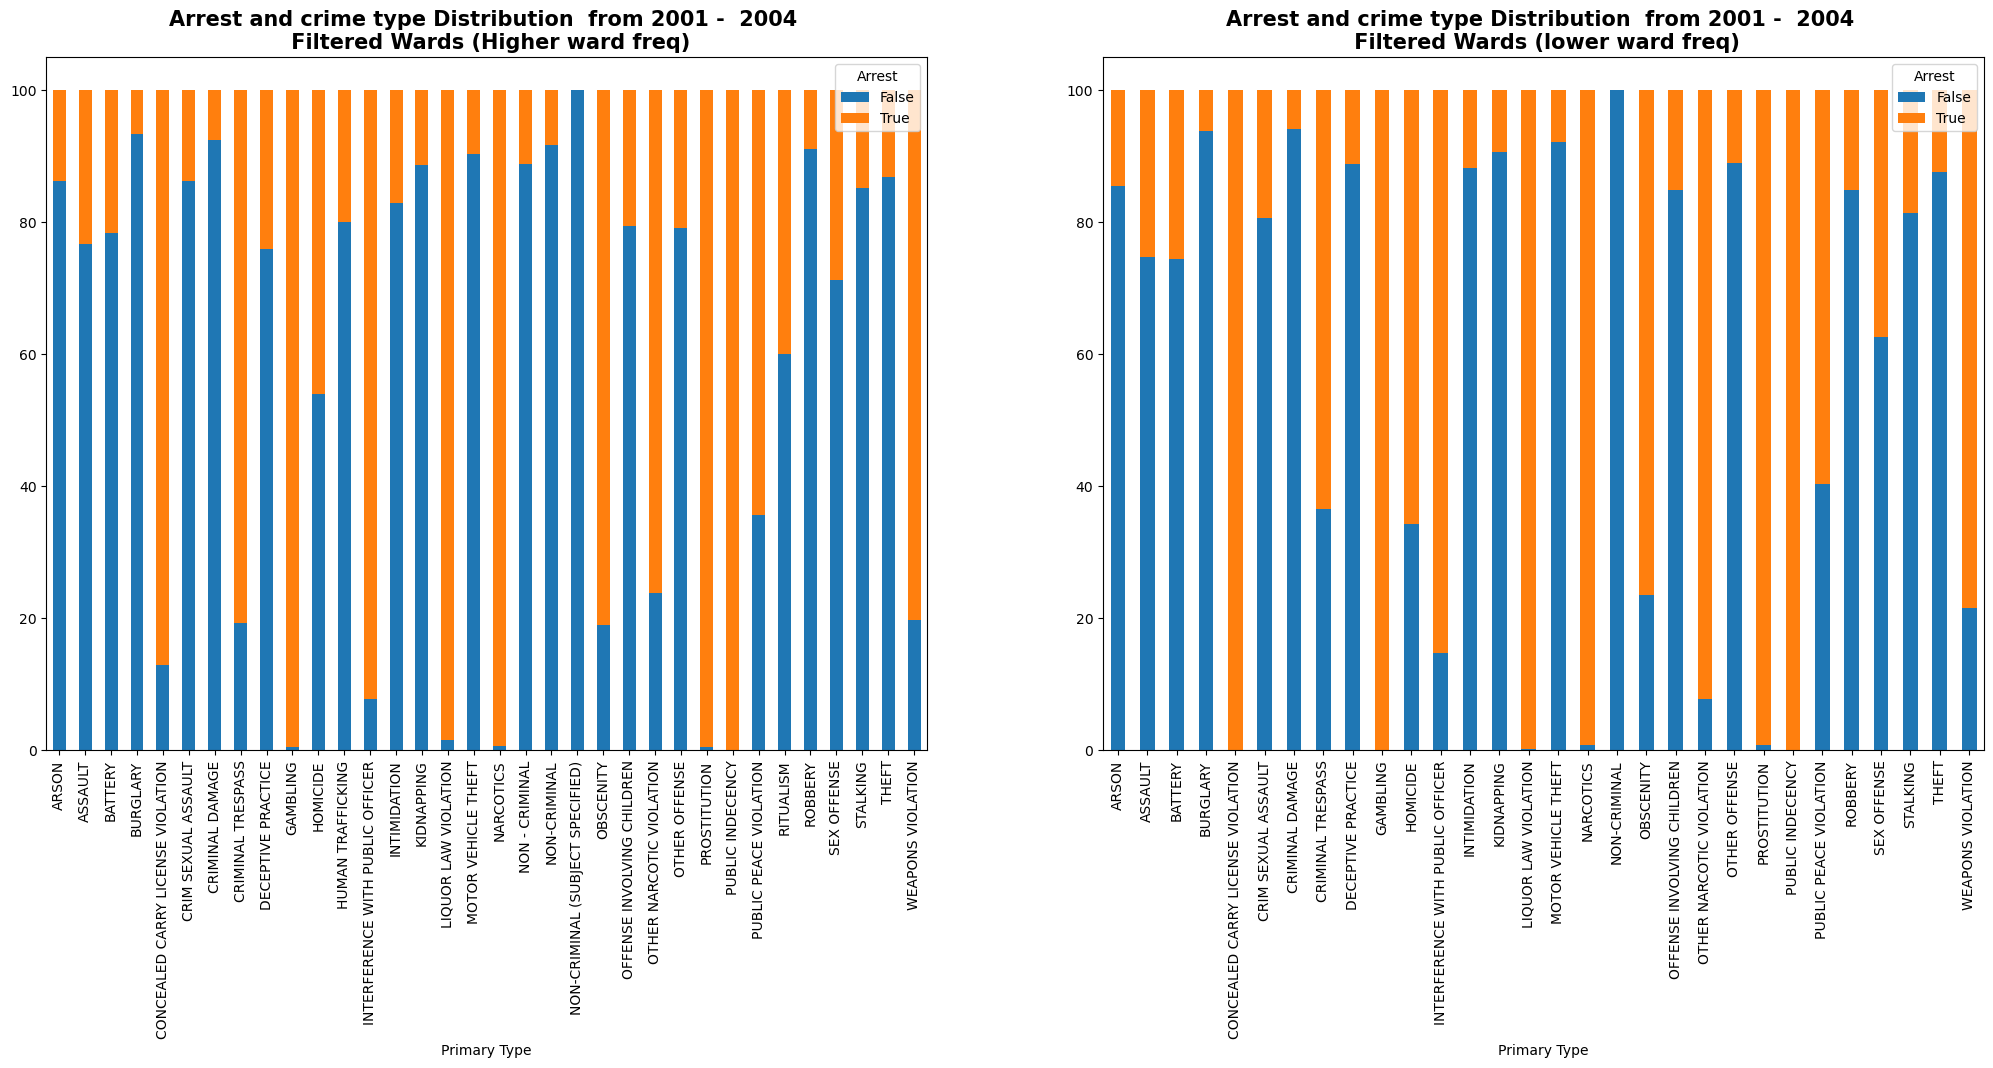

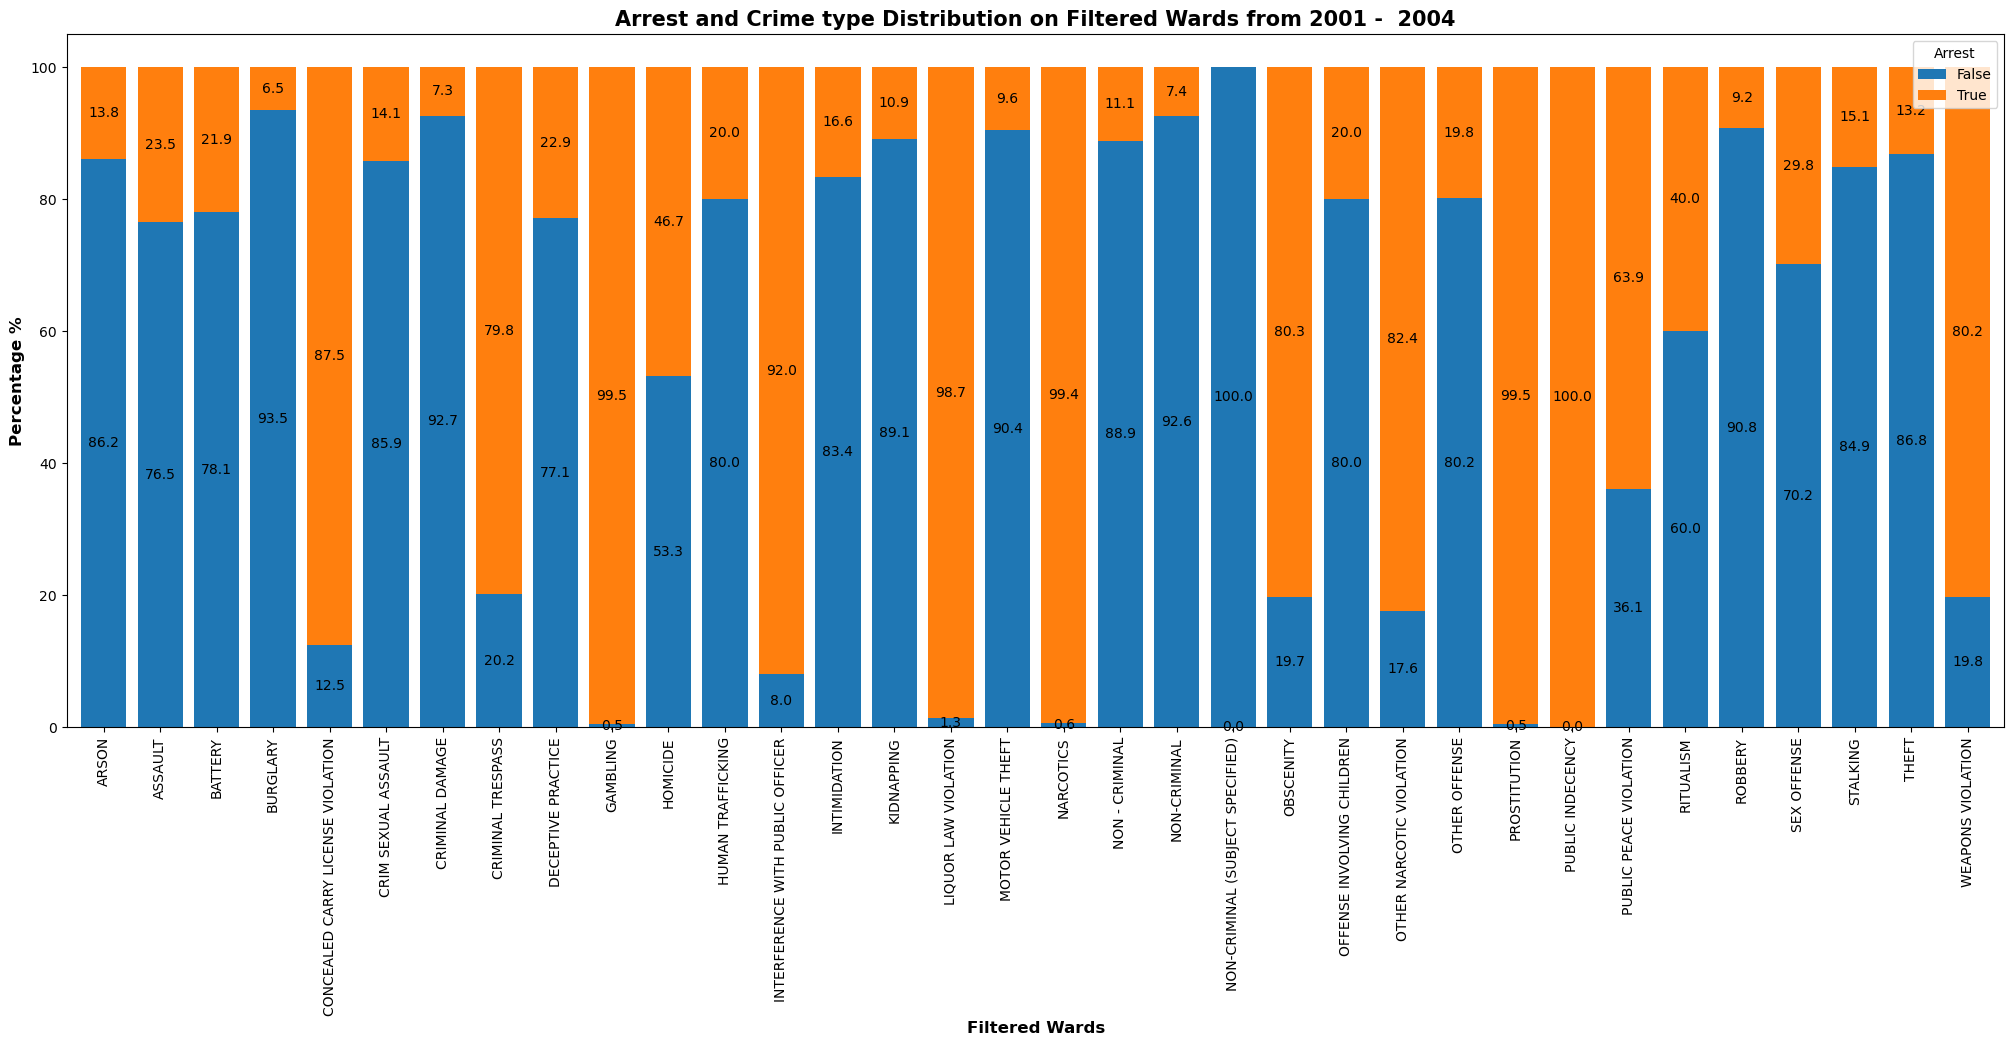

In [106]:
cross = pd.crosstab( filtered_df["Primary Type"], filtered_df.Arrest, normalize = "index")* 100
# print(cross.iloc[:5])

cross1 = pd.crosstab( filtered_df1["Primary Type"], filtered_df1.Arrest,  normalize = "index") * 100
cross2 = pd.crosstab( filtered_df2["Primary Type"], filtered_df2.Arrest,  normalize = "index") * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 9))
bars1 = cross1.plot(kind = "bar",  figsize = (25, 9) , stacked = True, ax = ax1)
bars2 = cross2.plot(kind = "bar",  figsize = (25, 9) , stacked = True, ax = ax2)
bars = cross.plot(kind = "bar",  figsize = (25, 9), stacked = True, width = 0.8)



# for container in bars1.containers:
#     bars1.bar_label(container, fmt='%.1f', label_type='center')

# for container in bars2.containers:
#     bars2.bar_label(container, fmt='%.1f', label_type='center')

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f', label_type='center')
plt.title("Arrest and Crime type Distribution on Filtered Wards from 2001 -  2004", fontweight = "bold", fontsize = 15)
ax1.set_title("Arrest and crime type Distribution  from 2001 -  2004 \n Filtered Wards (Higher ward freq)", fontweight = "bold", fontsize = 15)
ax2.set_title("Arrest and crime type Distribution  from 2001 -  2004 \n Filtered Wards (lower ward freq)", fontweight = "bold", fontsize = 15)

plt.xlabel("Filtered Wards", fontsize = 12, fontweight = "bold")
plt.ylabel("Percentage %", fontsize = 12, fontweight = "bold");
